### Imports

In [55]:
#import all needed modules
from scipy.io import arff
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 1. Reading data

In [56]:
#Importing and reading data
data = arff.loadarff('dataset/Training Dataset.arff')
df = pd.DataFrame(data[0])
columns = df.columns.values
for col in columns:
    df[col] = pd.to_numeric(df[col])
df.head()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,-1,1,1,1,-1,-1,-1,-1,-1,1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,1,1,1,1,1,-1,0,1,-1,1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,1,0,1,1,1,-1,-1,-1,-1,1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,1,0,1,1,1,-1,-1,-1,1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,1,0,-1,1,1,-1,1,1,-1,1,...,-1,1,-1,-1,0,-1,1,1,1,1


### 2. Basic data information

In [57]:
df.shape

(11055, 31)

As seen from the output above our data has 11055 examples and 31 features

In [58]:
df.columns.values

array(['having_IP_Address', 'URL_Length', 'Shortining_Service',
       'having_At_Symbol', 'double_slash_redirecting', 'Prefix_Suffix',
       'having_Sub_Domain', 'SSLfinal_State',
       'Domain_registeration_length', 'Favicon', 'port', 'HTTPS_token',
       'Request_URL', 'URL_of_Anchor', 'Links_in_tags', 'SFH',
       'Submitting_to_email', 'Abnormal_URL', 'Redirect', 'on_mouseover',
       'RightClick', 'popUpWidnow', 'Iframe', 'age_of_domain',
       'DNSRecord', 'web_traffic', 'Page_Rank', 'Google_Index',
       'Links_pointing_to_page', 'Statistical_report', 'Result'],
      dtype=object)

List of all features

Feature interpretation:
 - having_IP_Address - IP address is used as an alternative of the domain name in the URL
 - URL_Length - If the length of the URL is greater than or equal 54 characters then the URL classified as phishing
 - Shortining_Service - URL shortening is a method in which a URL may be made considerably smaller in length and still lead to the required webpage.
 - having_At_Symbol - Using “@” symbol in the URL
 - double_slash_redirecting - The existence of “//” within the URL path means that the user will be redirected to another website. 
 - Prefix_Suffix - The dash symbol is rarely used in legitimate URLs. 
 - having_Sub_Domain - A domain name might include the country-code top-level domains (ccTLD)
 - SSLfinal_State - The existence of HTTPS is very important in giving the impression of website legitimacy
 - Domain_registeration_length - Phishing website lives for a short period of time, trustworthy domains are regularly paid for several years in advance 
 - Favicon - If the favicon is loaded from a domain other than that shown in the address bar, then the webpage is likely to be considered a Phishing attempt
 - port - If all ports are open, phishers can run almost any service they want and as a result, user information is threatened.
 - HTTPS_token - The phishers may add the “HTTPS” token to the domain part of a URL in order to trick users
 - Request_URL - Request URL examines whether the external objects contained within a webpage such as images, videos or sounds are loaded from another domain.
 - URL_of_Anchor - An anchor is an element defined by the anchor tag. This feature is treated exactly as “Request URL”. 
 - Links_in_tags - Links in Meta, Script and Link tags. It is expected that these tags are linked to the same domain of the webpage
 - SFH - SFHs that contain an empty string or “about:blank” are considered doubtful because an action should be taken upon the submitted information
 - Submitting_to_email - A phisher might redirect the user’s information to his personal email
 - Abnormal_URL - For a legitimate website, identity is typically part of its URL.
 - Redirect - that legitimate websites have been redirected one time max. On the other hand, phishing websites containing this feature have been redirected at least 4 times.
 - on_mouseover - Phishers may use JavaScript to show a fake URL in the status bar to users. 
 - RightClick - Phishers use JavaScript to disable the right-click function, so that users cannot view and save the webpage source code
 - popUpWindow - It is unusual to find a legitimate website asking users to submit their personal information through a pop-up window
 - Iframe - Phishers can make use of the “iframe” tag and make it invisible i.e. without frame borders
 - age_of_domain - Most phishing websites live for a short period of time. 
 - DNSRecord - If the DNS record is empty or not found then the website is classified as “Phishing”, otherwise it is classified as “Legitimate”. 
 - web_traffic - This feature measures the popularity of the website by determining the number of visitors and the number of pages they visit
 - Page_Rank - PageRank aims to measure how important a webpage is on the Internet. 
 - Google_Index - This feature examines whether a website is in Google’s index or not. 
 - Links_pointing_to_page - The number of links pointing to the webpage indicates its legitimacy level
 - Statistical_report - Several parties such as PhishTank , and StopBadware  formulate numerous statistical reports on phishing websites at every given period of time
 - Result - target class -> -1 if website is not a phising website, 1 if otherwise

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11055 entries, 0 to 11054
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   having_IP_Address            11055 non-null  int64
 1   URL_Length                   11055 non-null  int64
 2   Shortining_Service           11055 non-null  int64
 3   having_At_Symbol             11055 non-null  int64
 4   double_slash_redirecting     11055 non-null  int64
 5   Prefix_Suffix                11055 non-null  int64
 6   having_Sub_Domain            11055 non-null  int64
 7   SSLfinal_State               11055 non-null  int64
 8   Domain_registeration_length  11055 non-null  int64
 9   Favicon                      11055 non-null  int64
 10  port                         11055 non-null  int64
 11  HTTPS_token                  11055 non-null  int64
 12  Request_URL                  11055 non-null  int64
 13  URL_of_Anchor                11055 non-null  i

All of our data is of type integer and there is no null data present for each feature

#### Missing data

Our dataset does not have missing data

In [60]:
df.isna().sum()

having_IP_Address              0
URL_Length                     0
Shortining_Service             0
having_At_Symbol               0
double_slash_redirecting       0
Prefix_Suffix                  0
having_Sub_Domain              0
SSLfinal_State                 0
Domain_registeration_length    0
Favicon                        0
port                           0
HTTPS_token                    0
Request_URL                    0
URL_of_Anchor                  0
Links_in_tags                  0
SFH                            0
Submitting_to_email            0
Abnormal_URL                   0
Redirect                       0
on_mouseover                   0
RightClick                     0
popUpWidnow                    0
Iframe                         0
age_of_domain                  0
DNSRecord                      0
web_traffic                    0
Page_Rank                      0
Google_Index                   0
Links_pointing_to_page         0
Statistical_report             0
Result    

#### Monotone attributes

Our dataset doesnt have monotone attributes as shown below

In [71]:
df.nunique()

having_IP_Address              2
URL_Length                     3
Shortining_Service             2
having_At_Symbol               2
double_slash_redirecting       2
Prefix_Suffix                  2
having_Sub_Domain              3
SSLfinal_State                 3
Domain_registeration_length    2
Favicon                        2
port                           2
HTTPS_token                    2
Request_URL                    2
URL_of_Anchor                  3
Links_in_tags                  3
SFH                            3
Submitting_to_email            2
Abnormal_URL                   2
Redirect                       2
on_mouseover                   2
RightClick                     2
popUpWidnow                    2
Iframe                         2
age_of_domain                  2
DNSRecord                      2
web_traffic                    3
Page_Rank                      2
Google_Index                   2
Links_pointing_to_page         3
Statistical_report             2
Result    

In [61]:
df.describe()

,having_IP_Address,URL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,Favicon,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
count,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,...,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000,11055.000000
mean,0.313795,-0.633198,0.738761,0.700588,0.741474,-0.734962,0.063953,0.250927,-0.336771,0.628584,...,0.613388,0.816915,0.061239,0.377114,0.287291,-0.483673,0.721574,0.344007,0.719584,0.113885
std,0.949534,0.766095,0.673998,0.713598,0.671011,0.678139,0.817518,0.911892,0.941629,0.777777,...,0.789818,0.576784,0.998168,0.926209,0.827733,0.875289,0.692369,0.569944,0.694437,0.993539
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000,...,1.000000,1.000000,-1.000000,-1.000000,0.000000,-1.000000,1.000000,0.000000,1.000000,-1.000000
50%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,0.000000,1.000000,-1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,-1.000000,1.000000,1.000000,1.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### 3. Data visualization

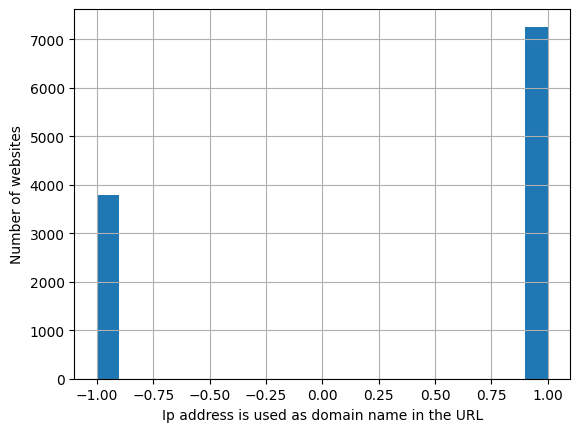

In [72]:
plt.hist(df.having_IP_Address,bins=20)
plt.grid()
plt.xlabel("Ip address is used as domain name in the URL")
plt.ylabel("Number of websites")
plt.show()

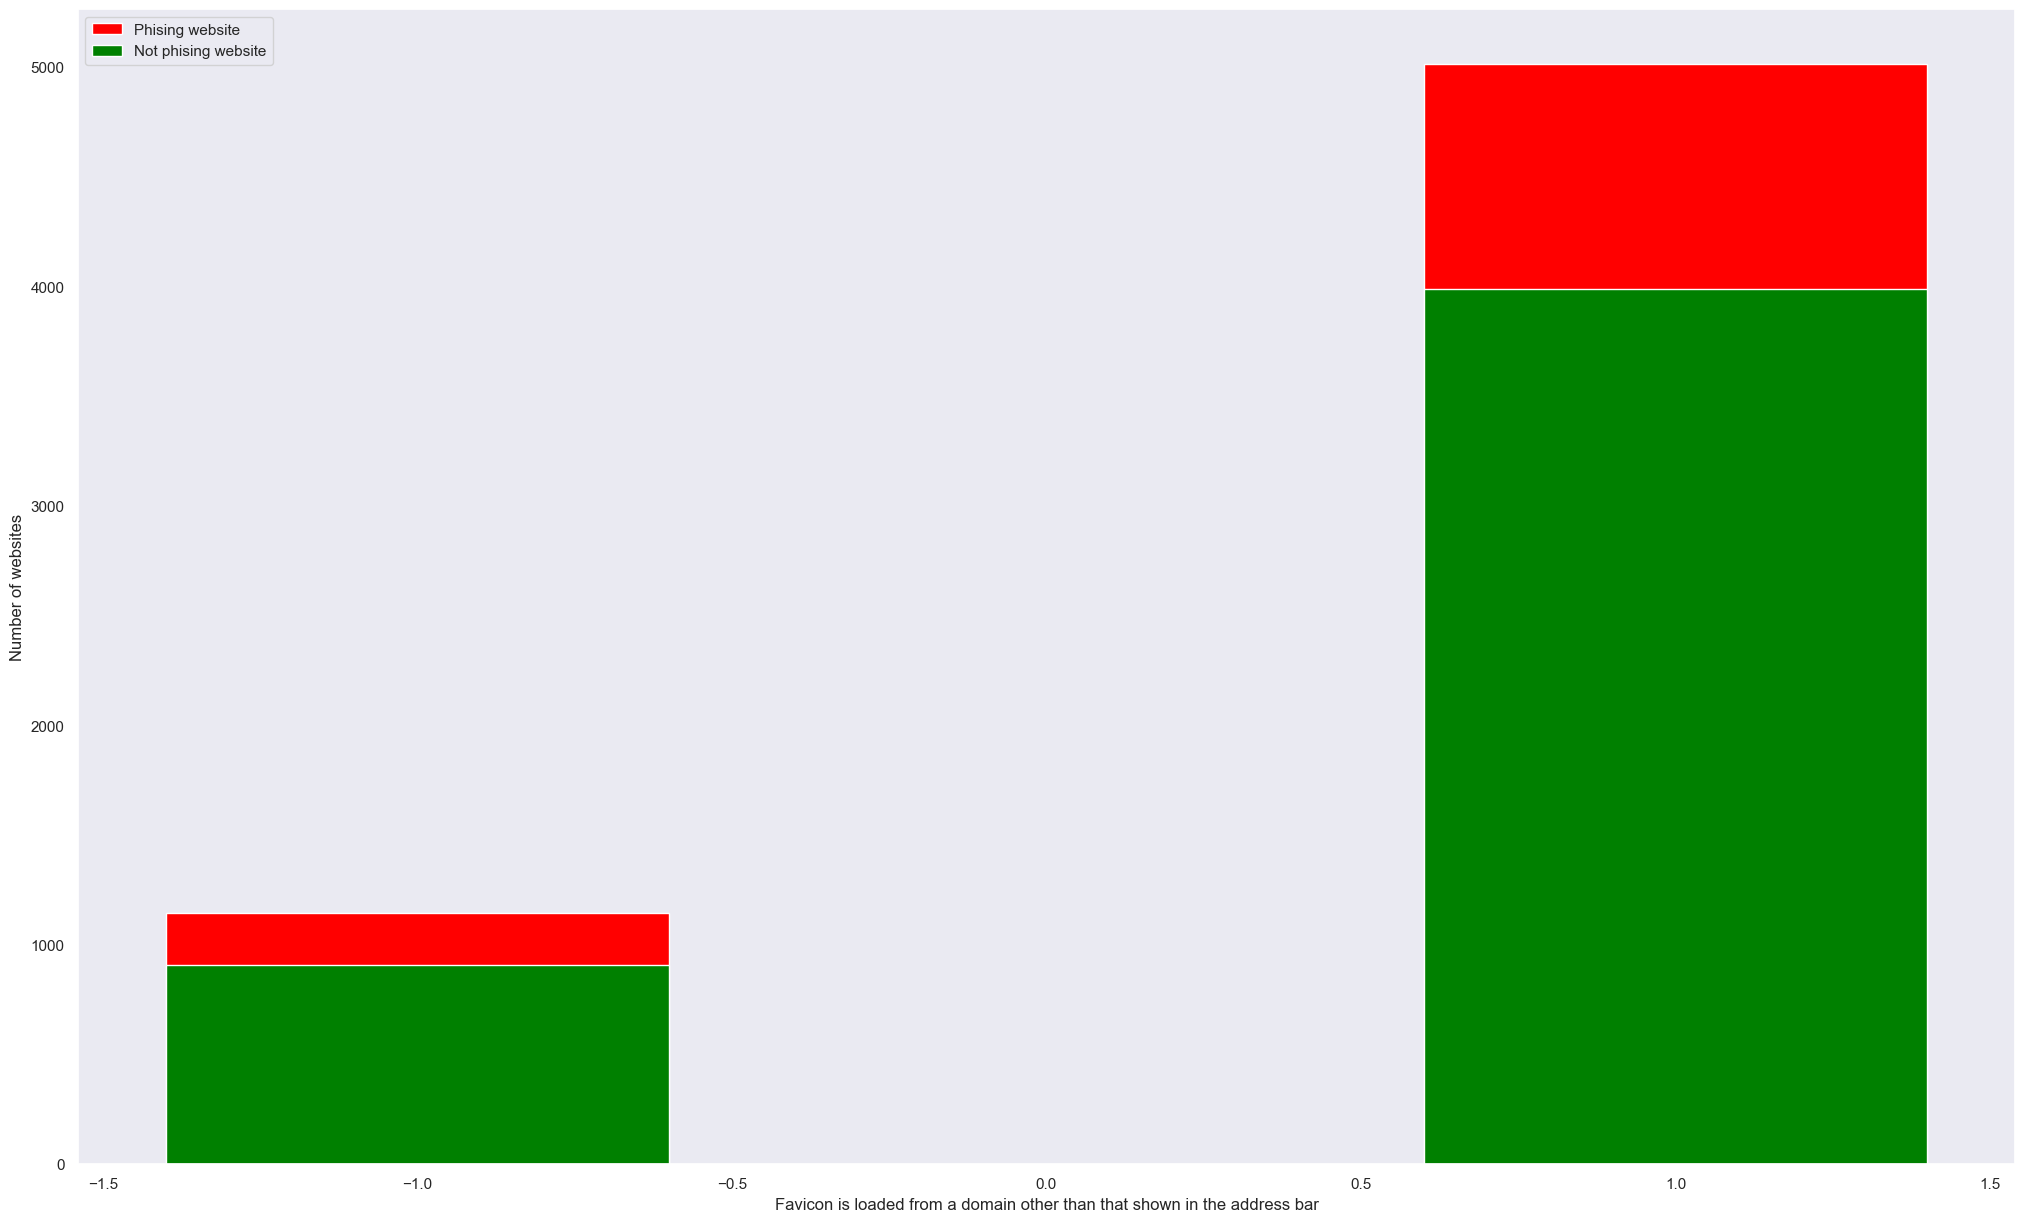

In [82]:

count_per_Favicon_isPhising = df.loc[df.Result == 1,:].groupby('Favicon').count().loc[:,'having_IP_Address'].values
count_per_Favicon_isNotPhising = df.loc[df.Result == -1,:].groupby('Favicon').count().loc[:,'having_IP_Address'].values
title_name = df.groupby('Favicon').count().index.values
# plot
plt.bar(title_name, count_per_Favicon_isPhising, color='red', label='Phising website')
plt.bar(title_name, count_per_Favicon_isNotPhising, color='green', label='Not phising website')
plt.legend(loc='best')
plt.grid()
plt.xlabel("Favicon is loaded from a domain other than that shown in the address bar")
plt.ylabel("Number of websites")
plt.show()


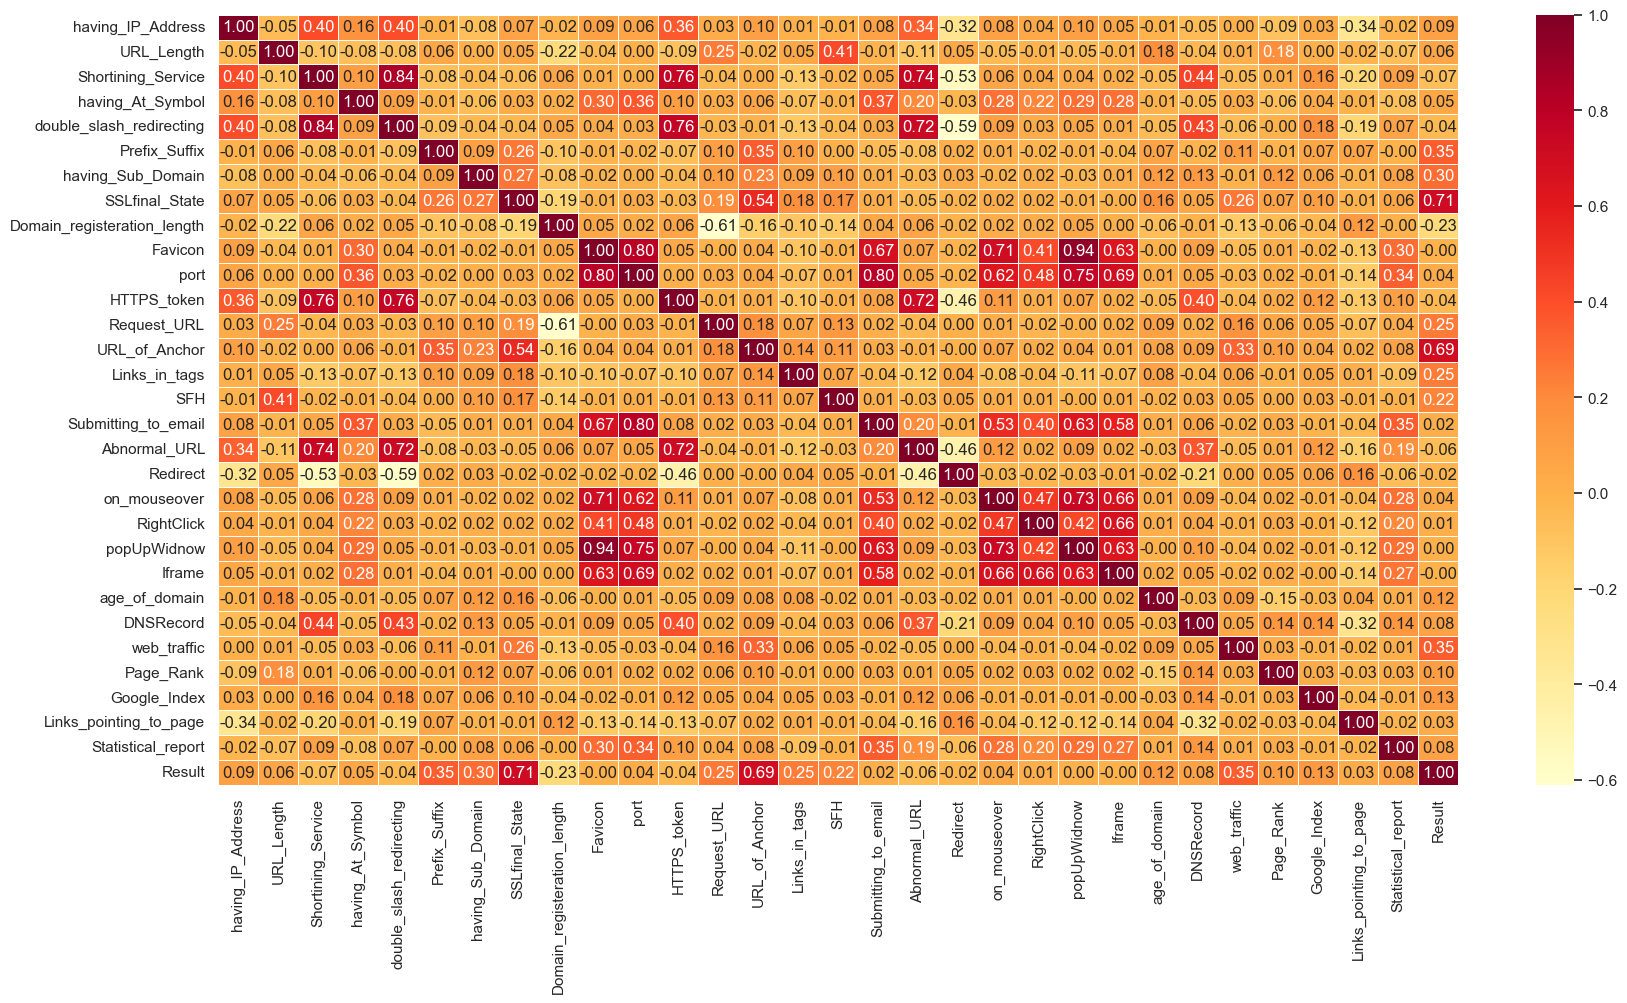

In [76]:
sns.set(rc={'figure.figsize':(20,10)})
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="YlOrRd", linewidths=.5)
plt.show()

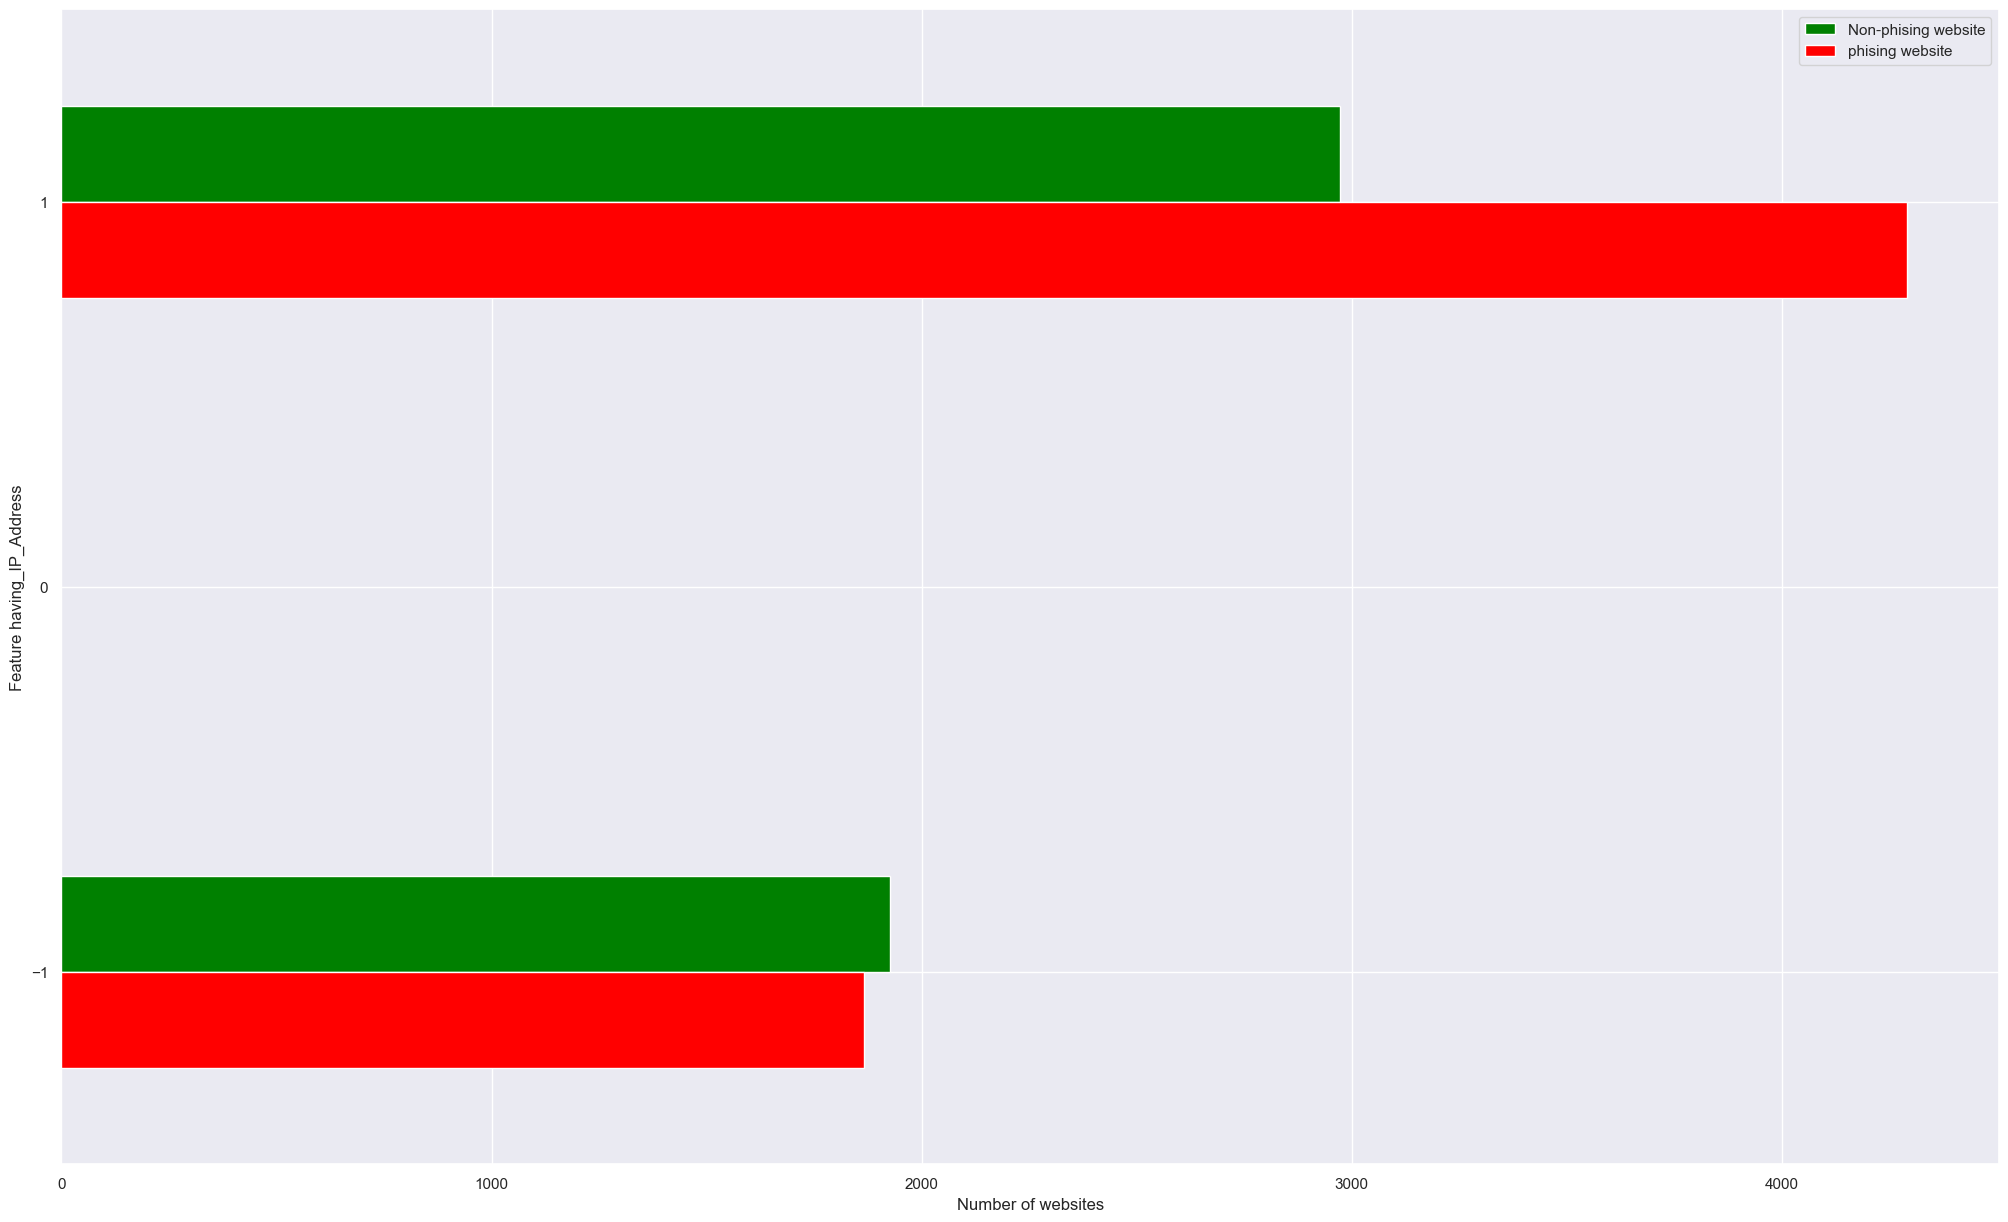

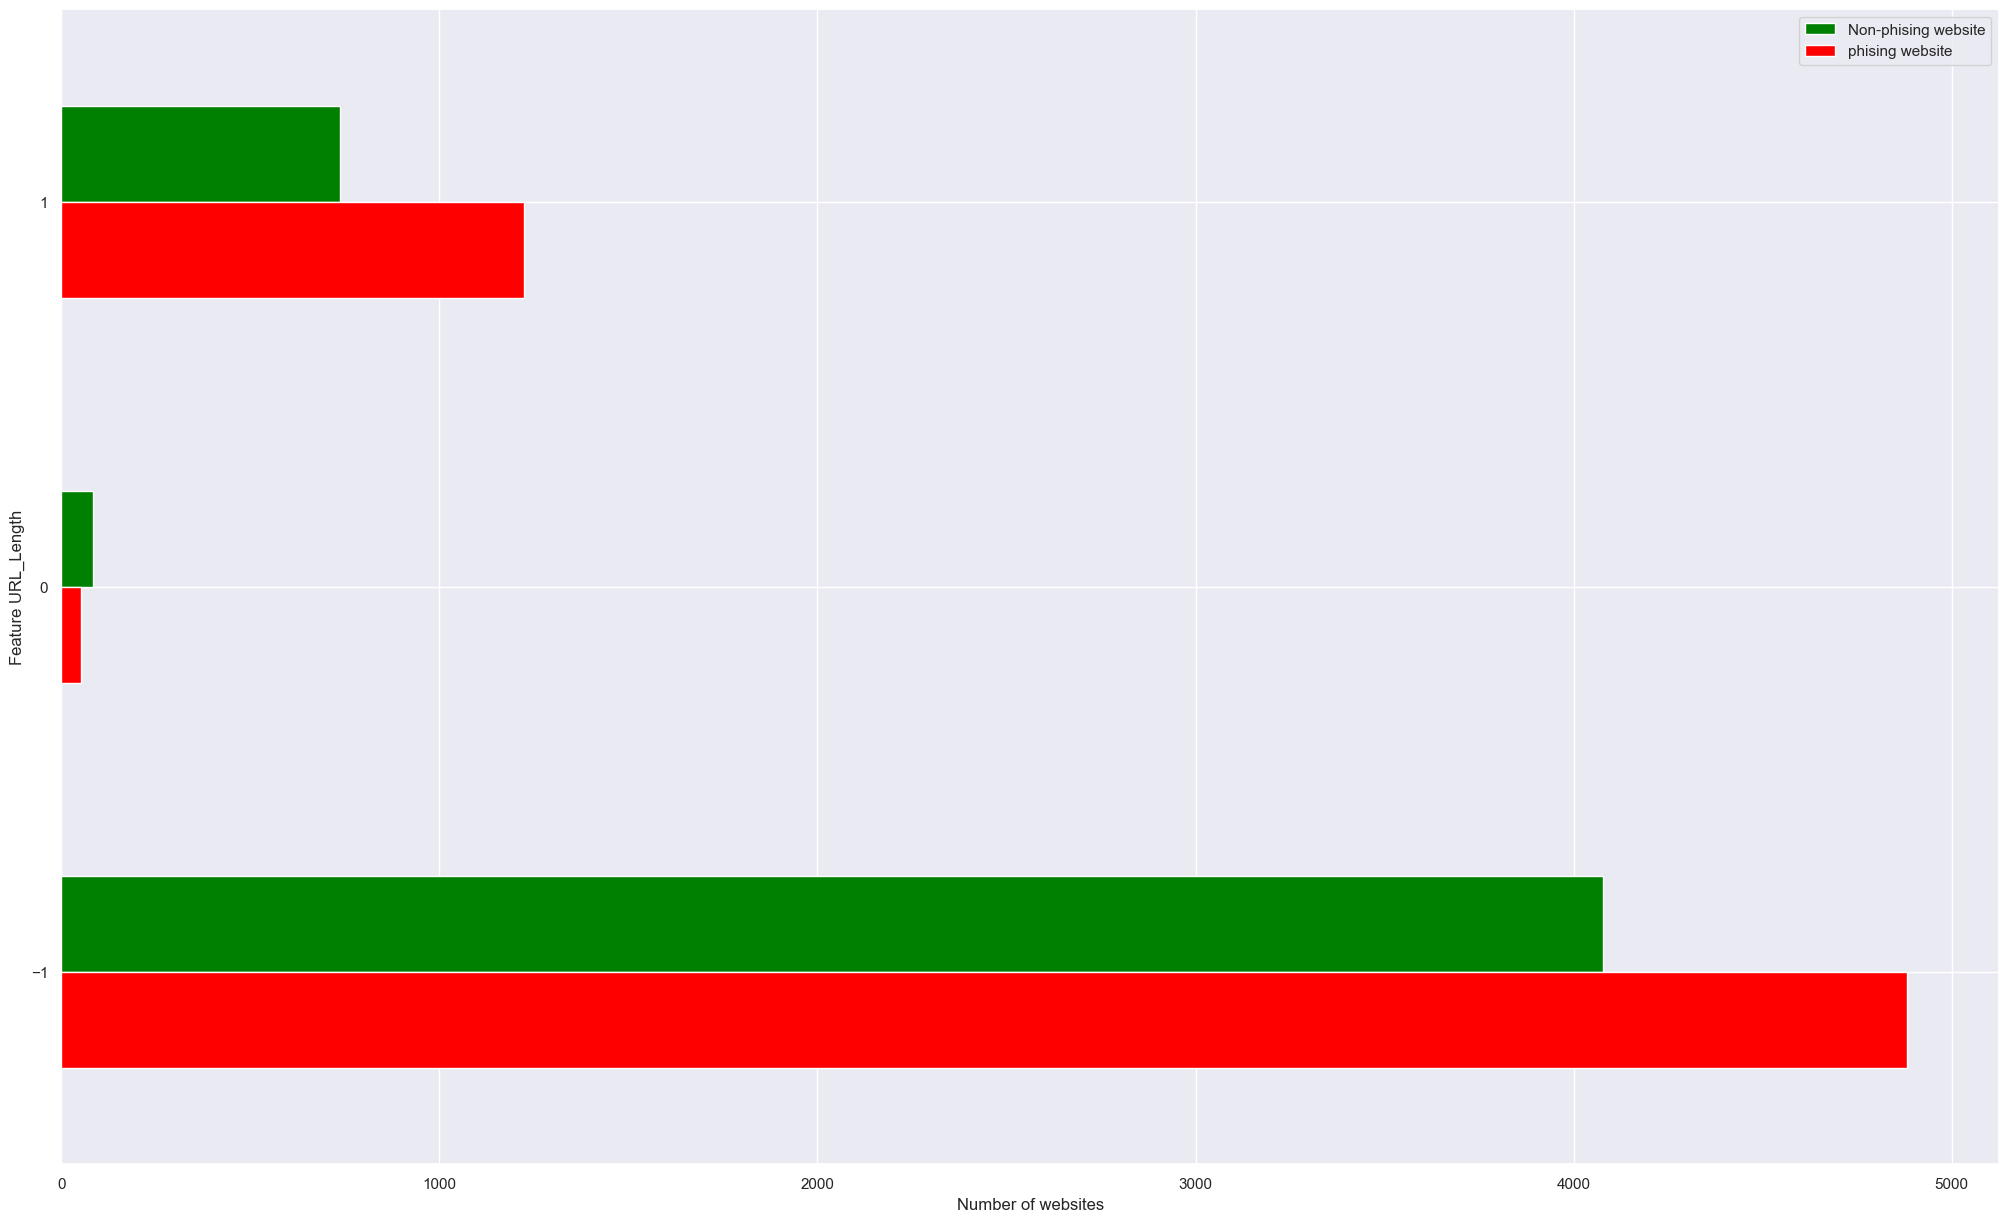

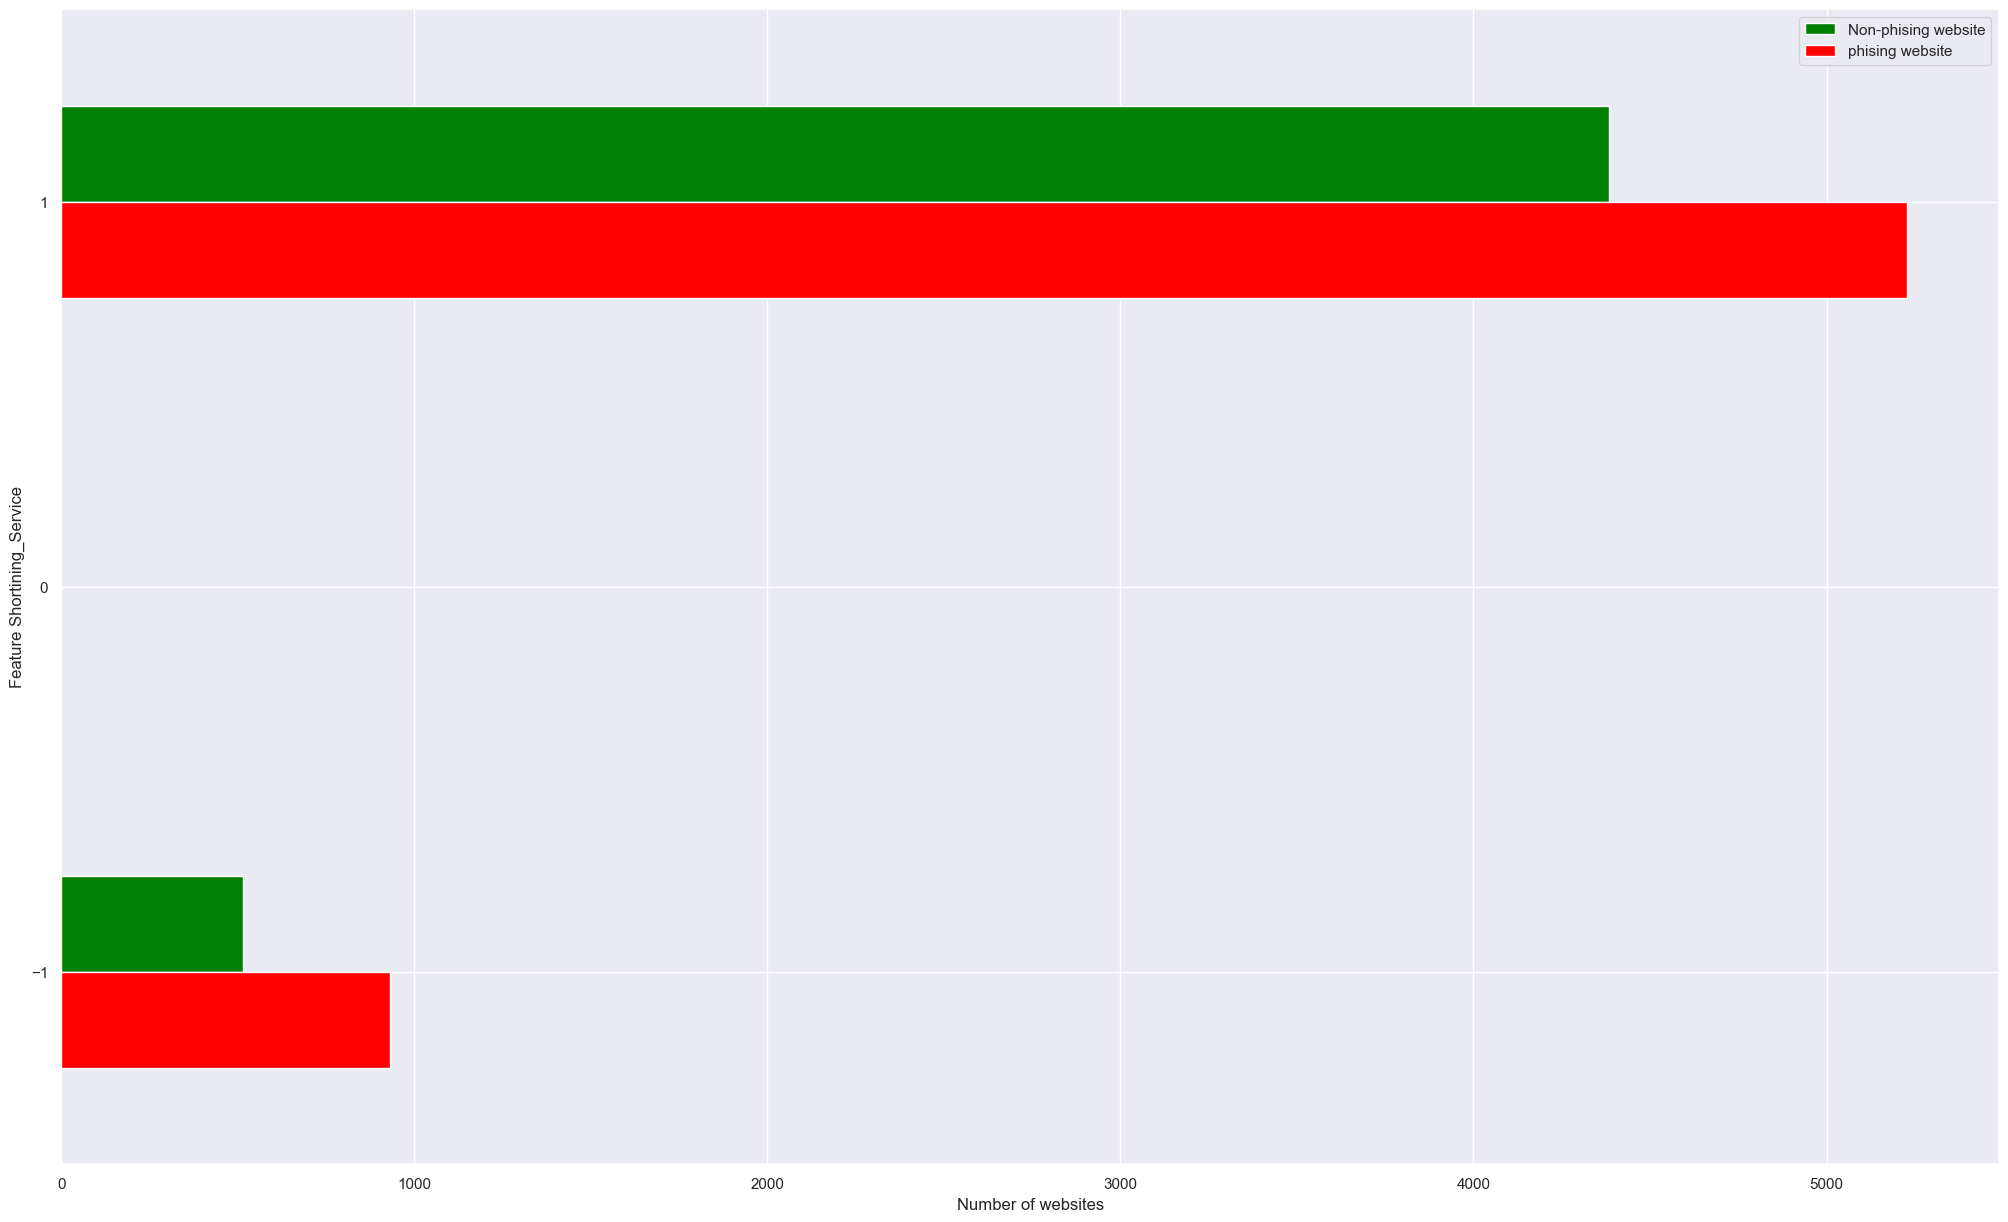

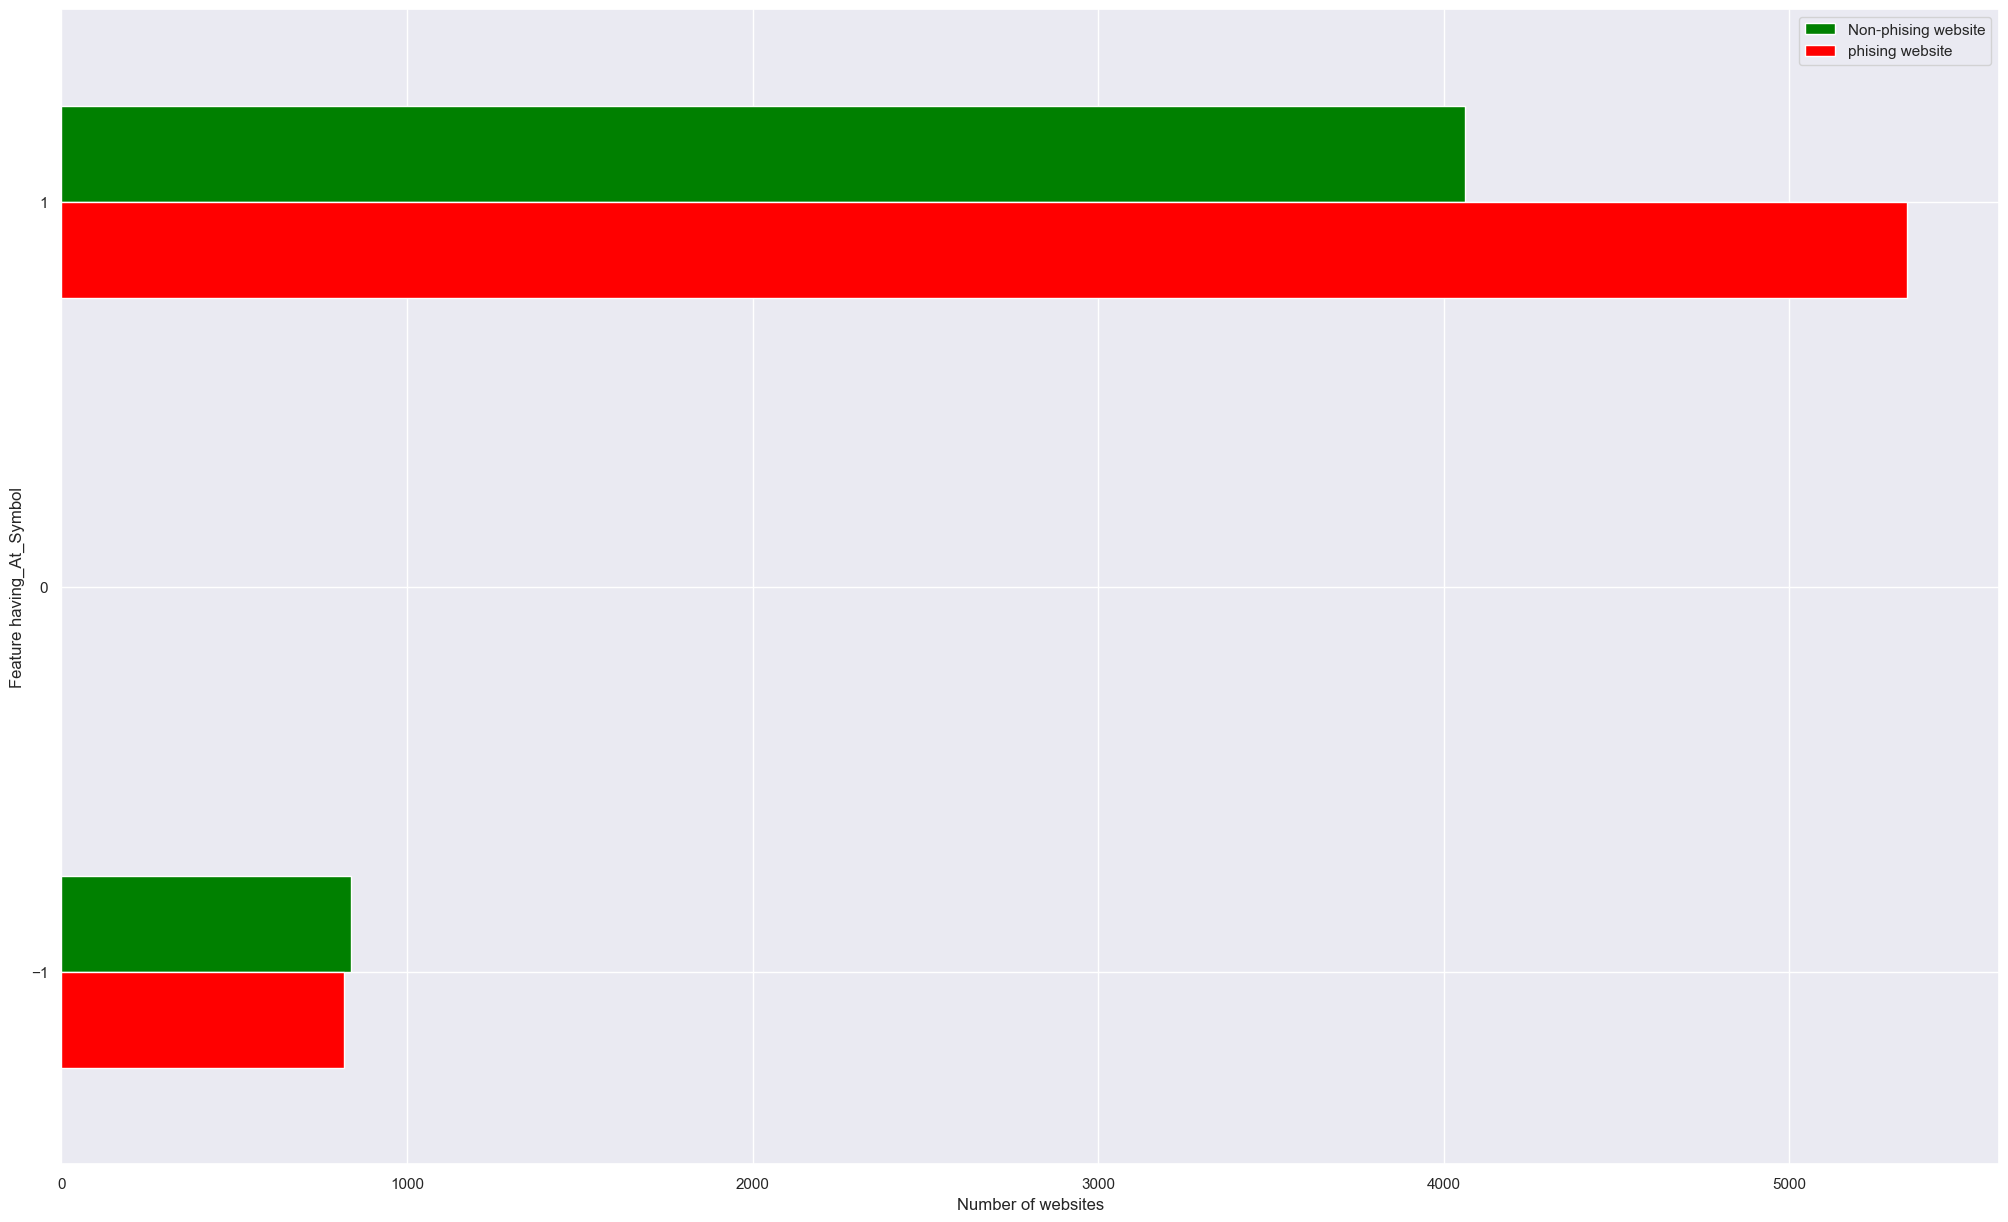

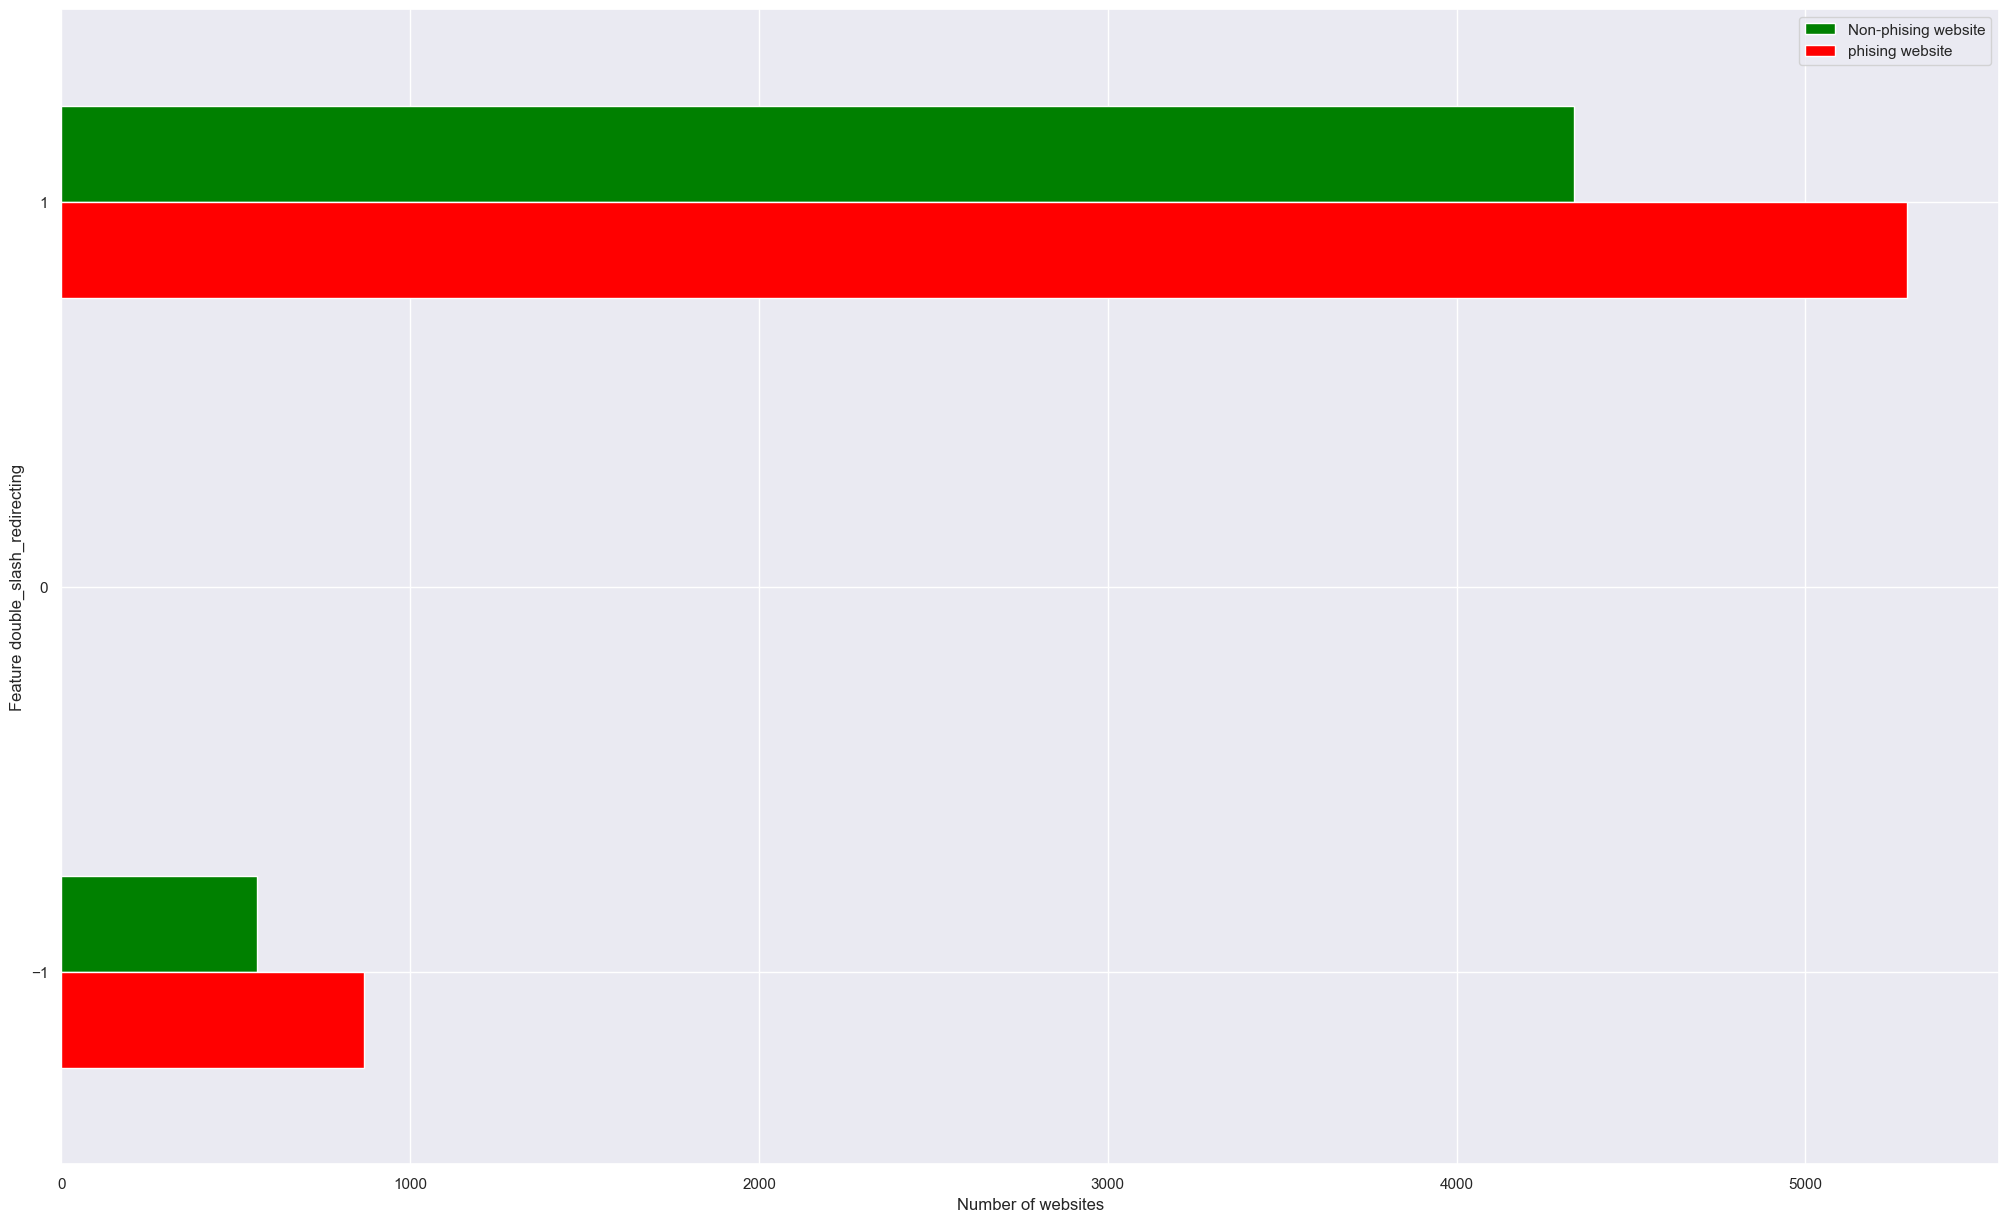

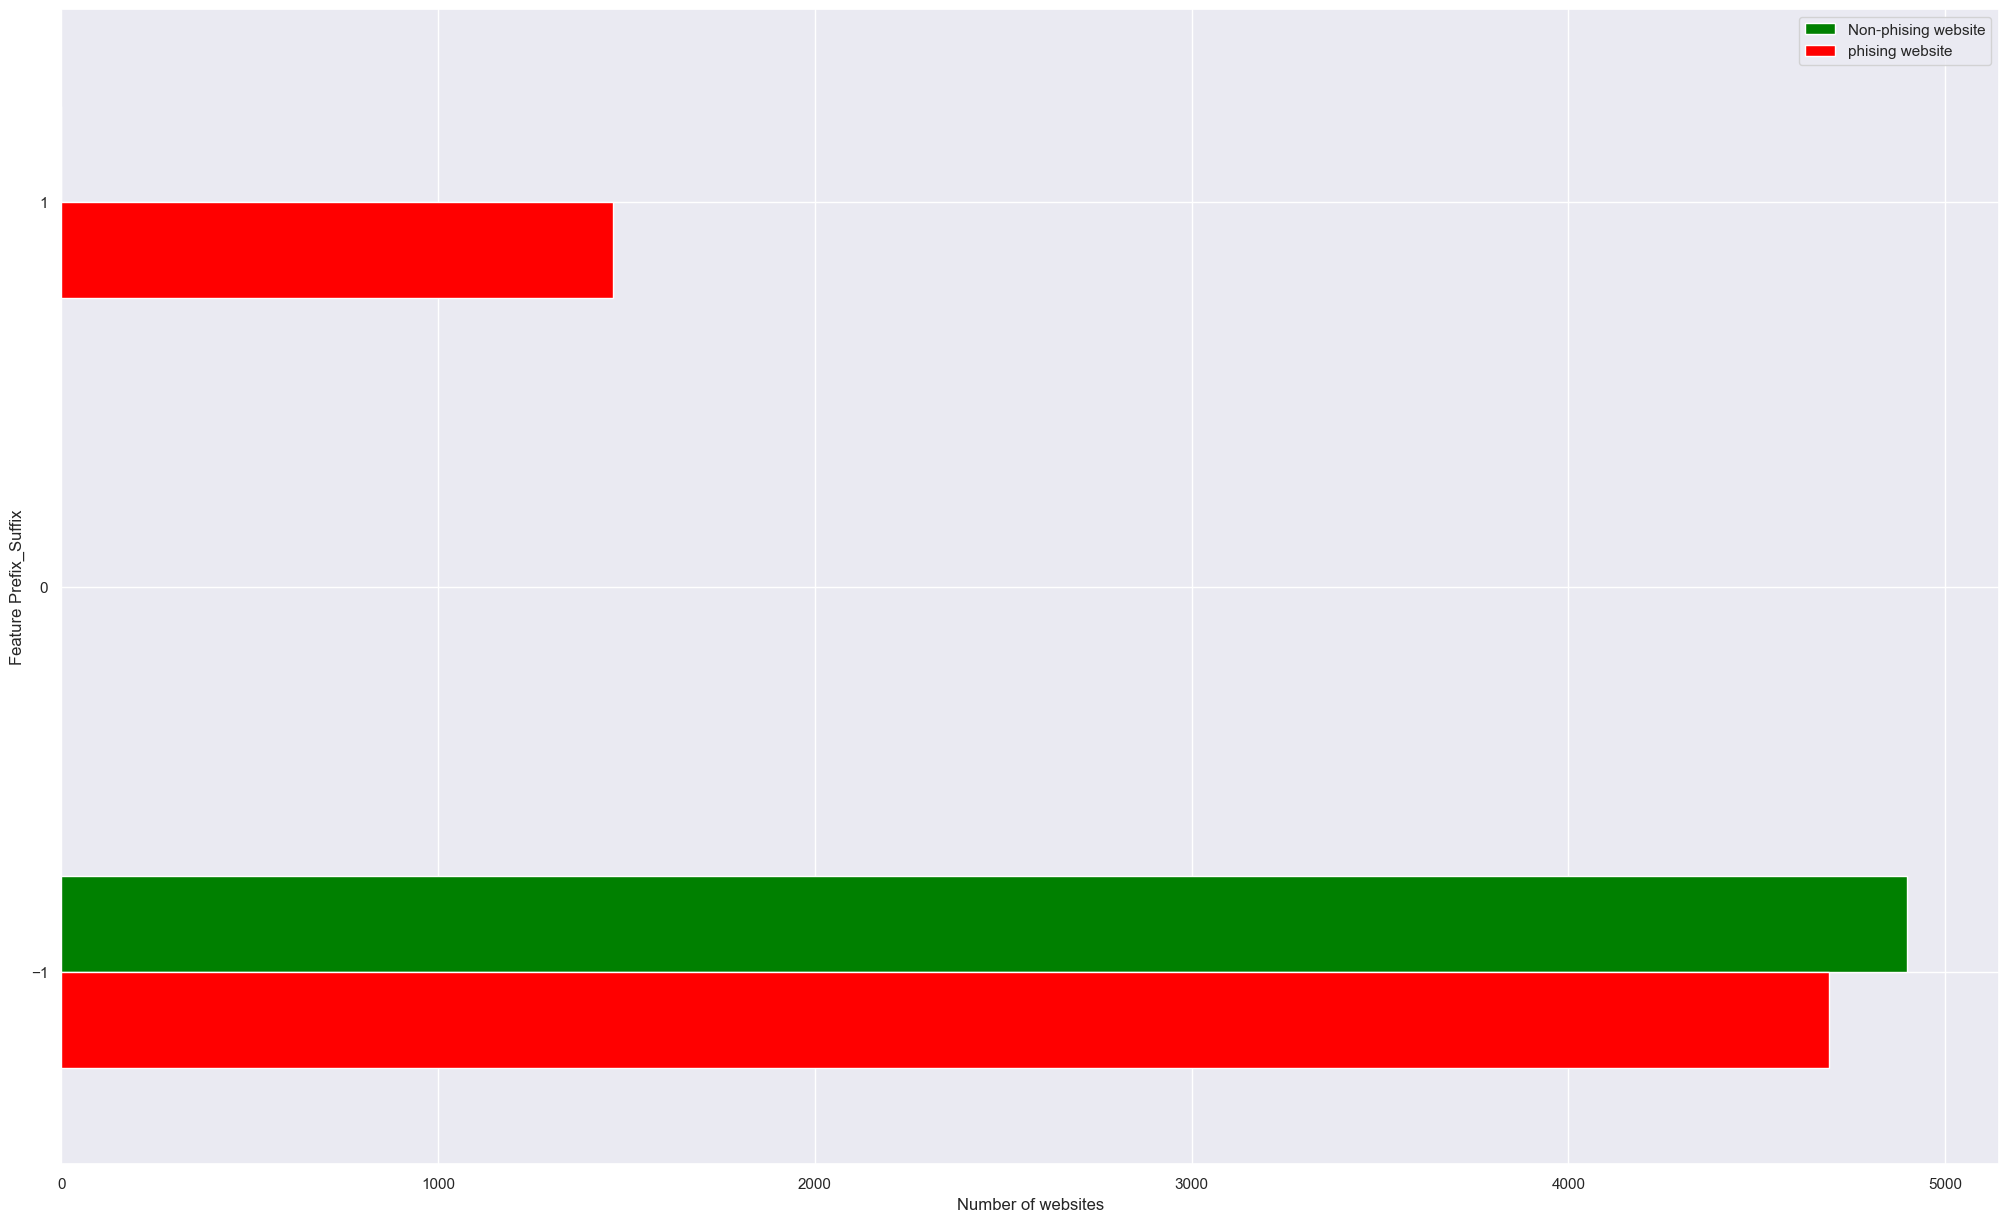

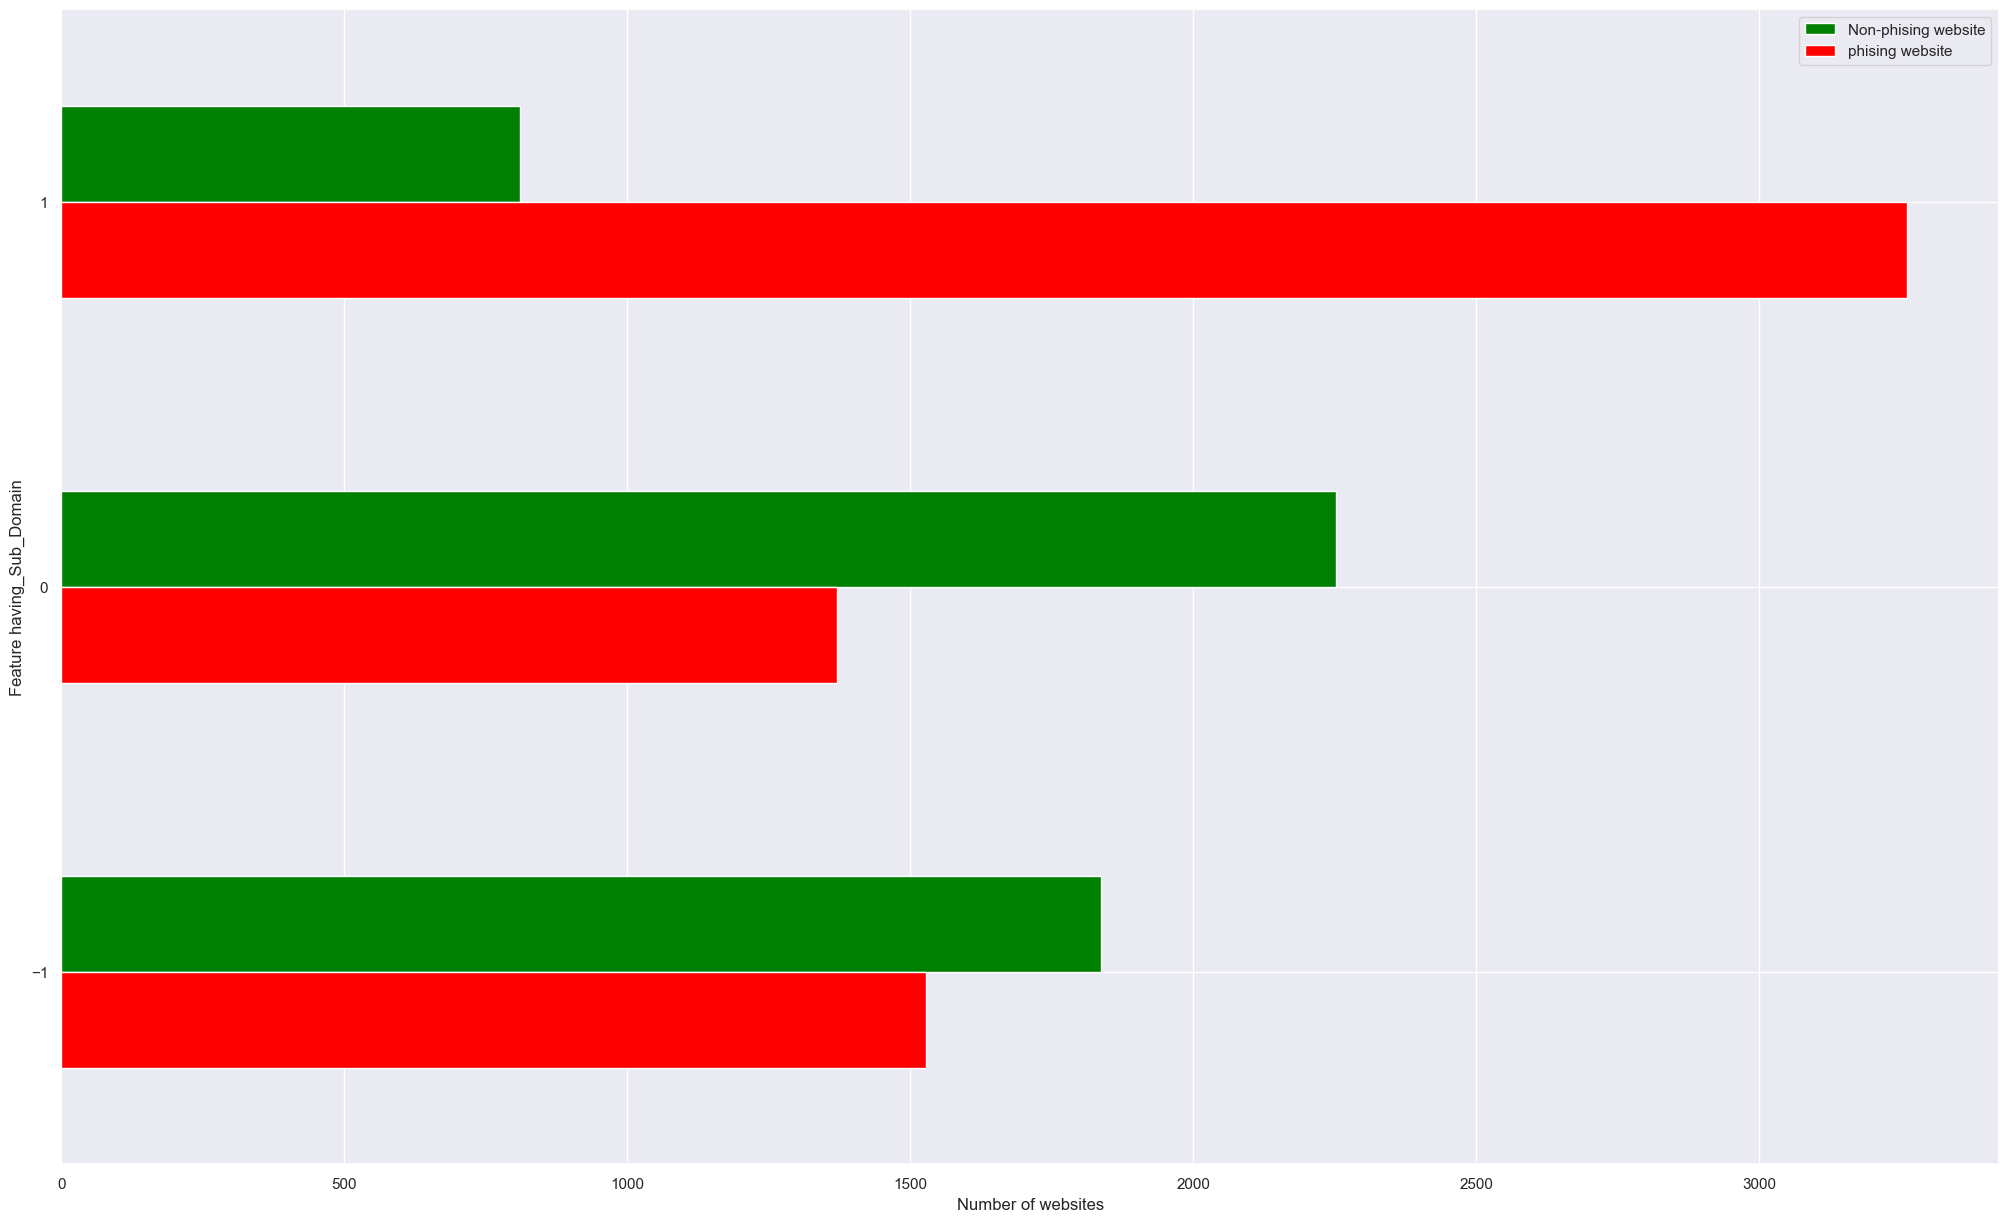

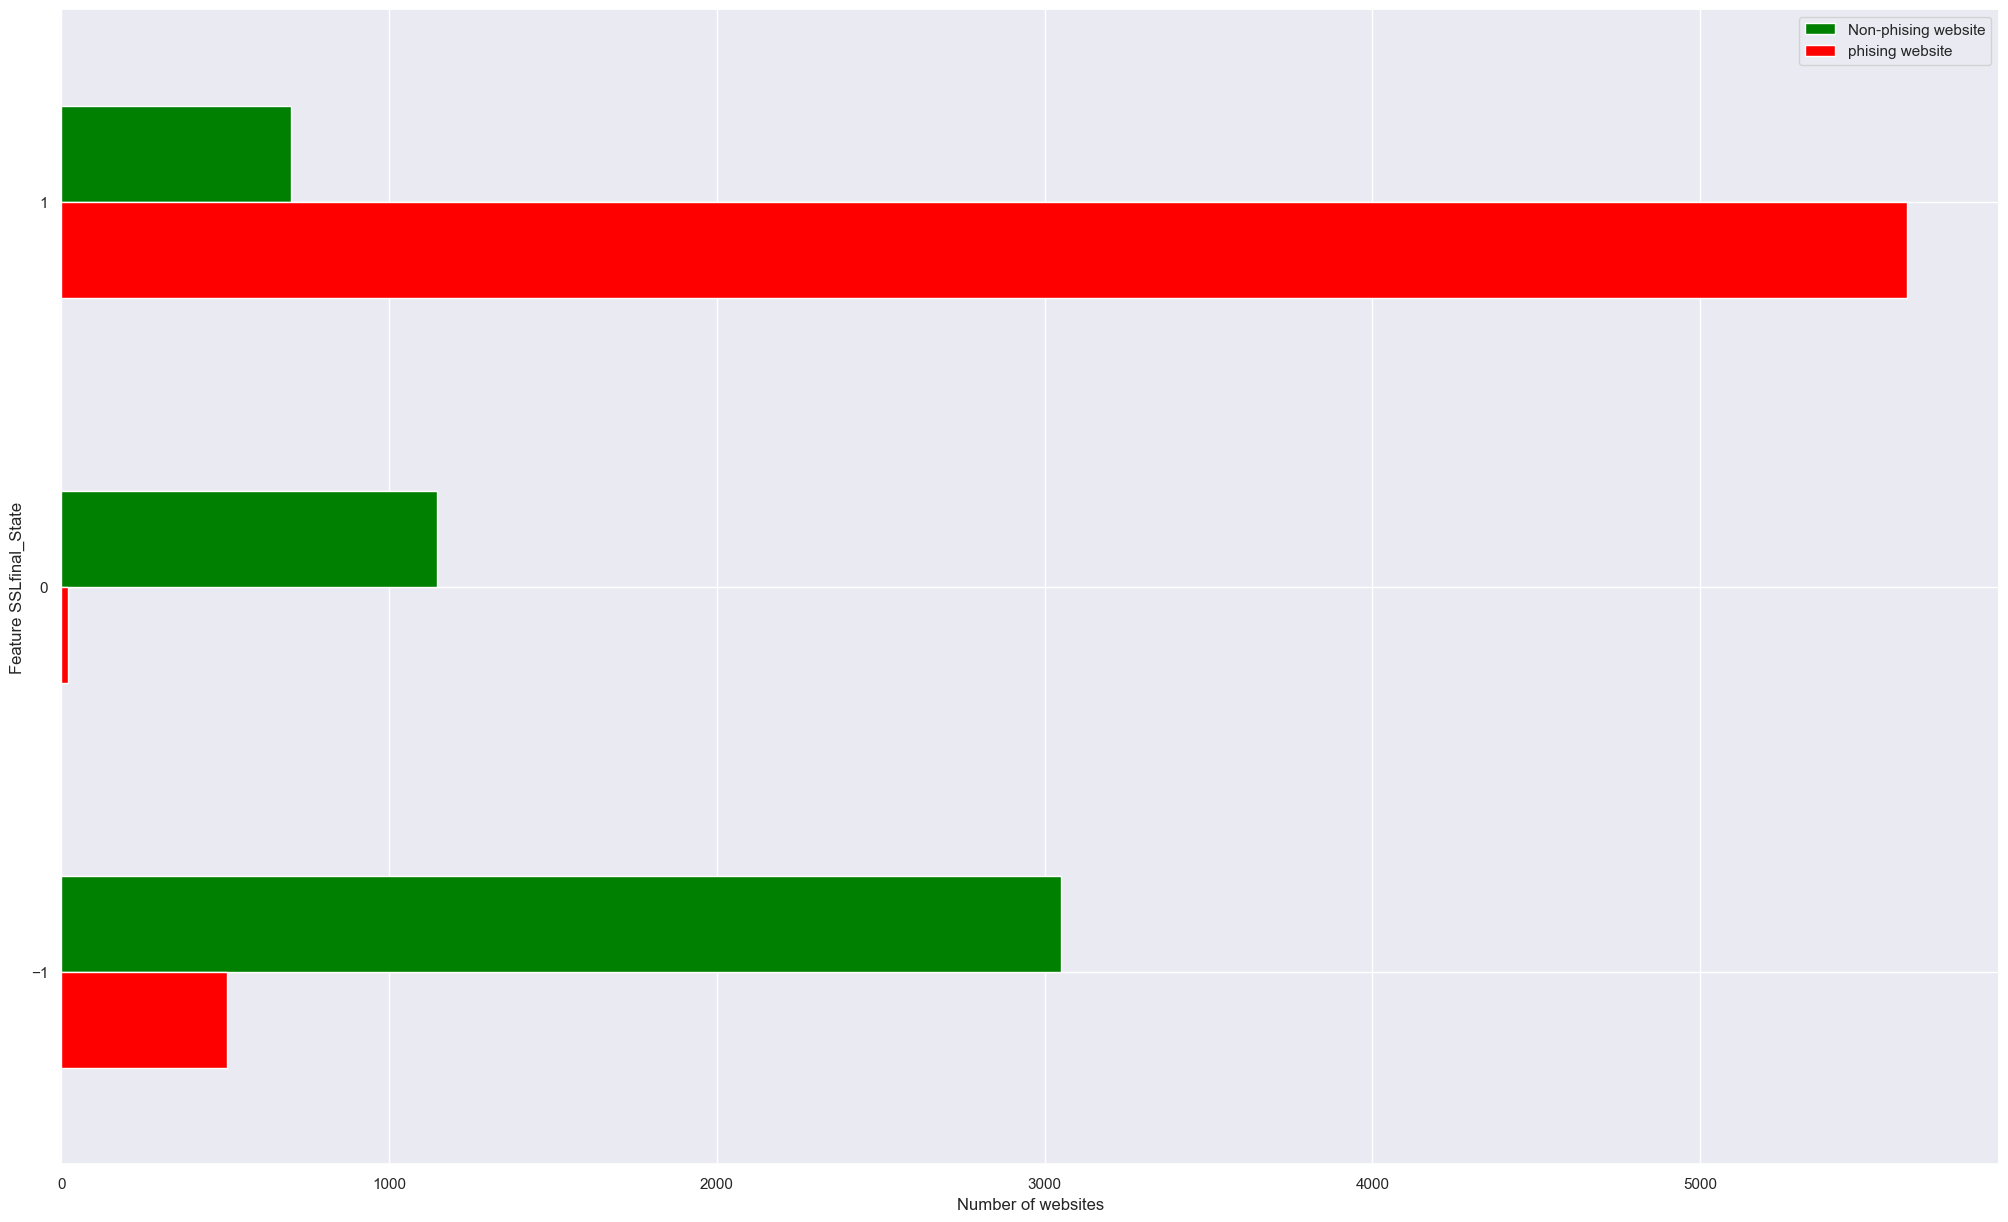

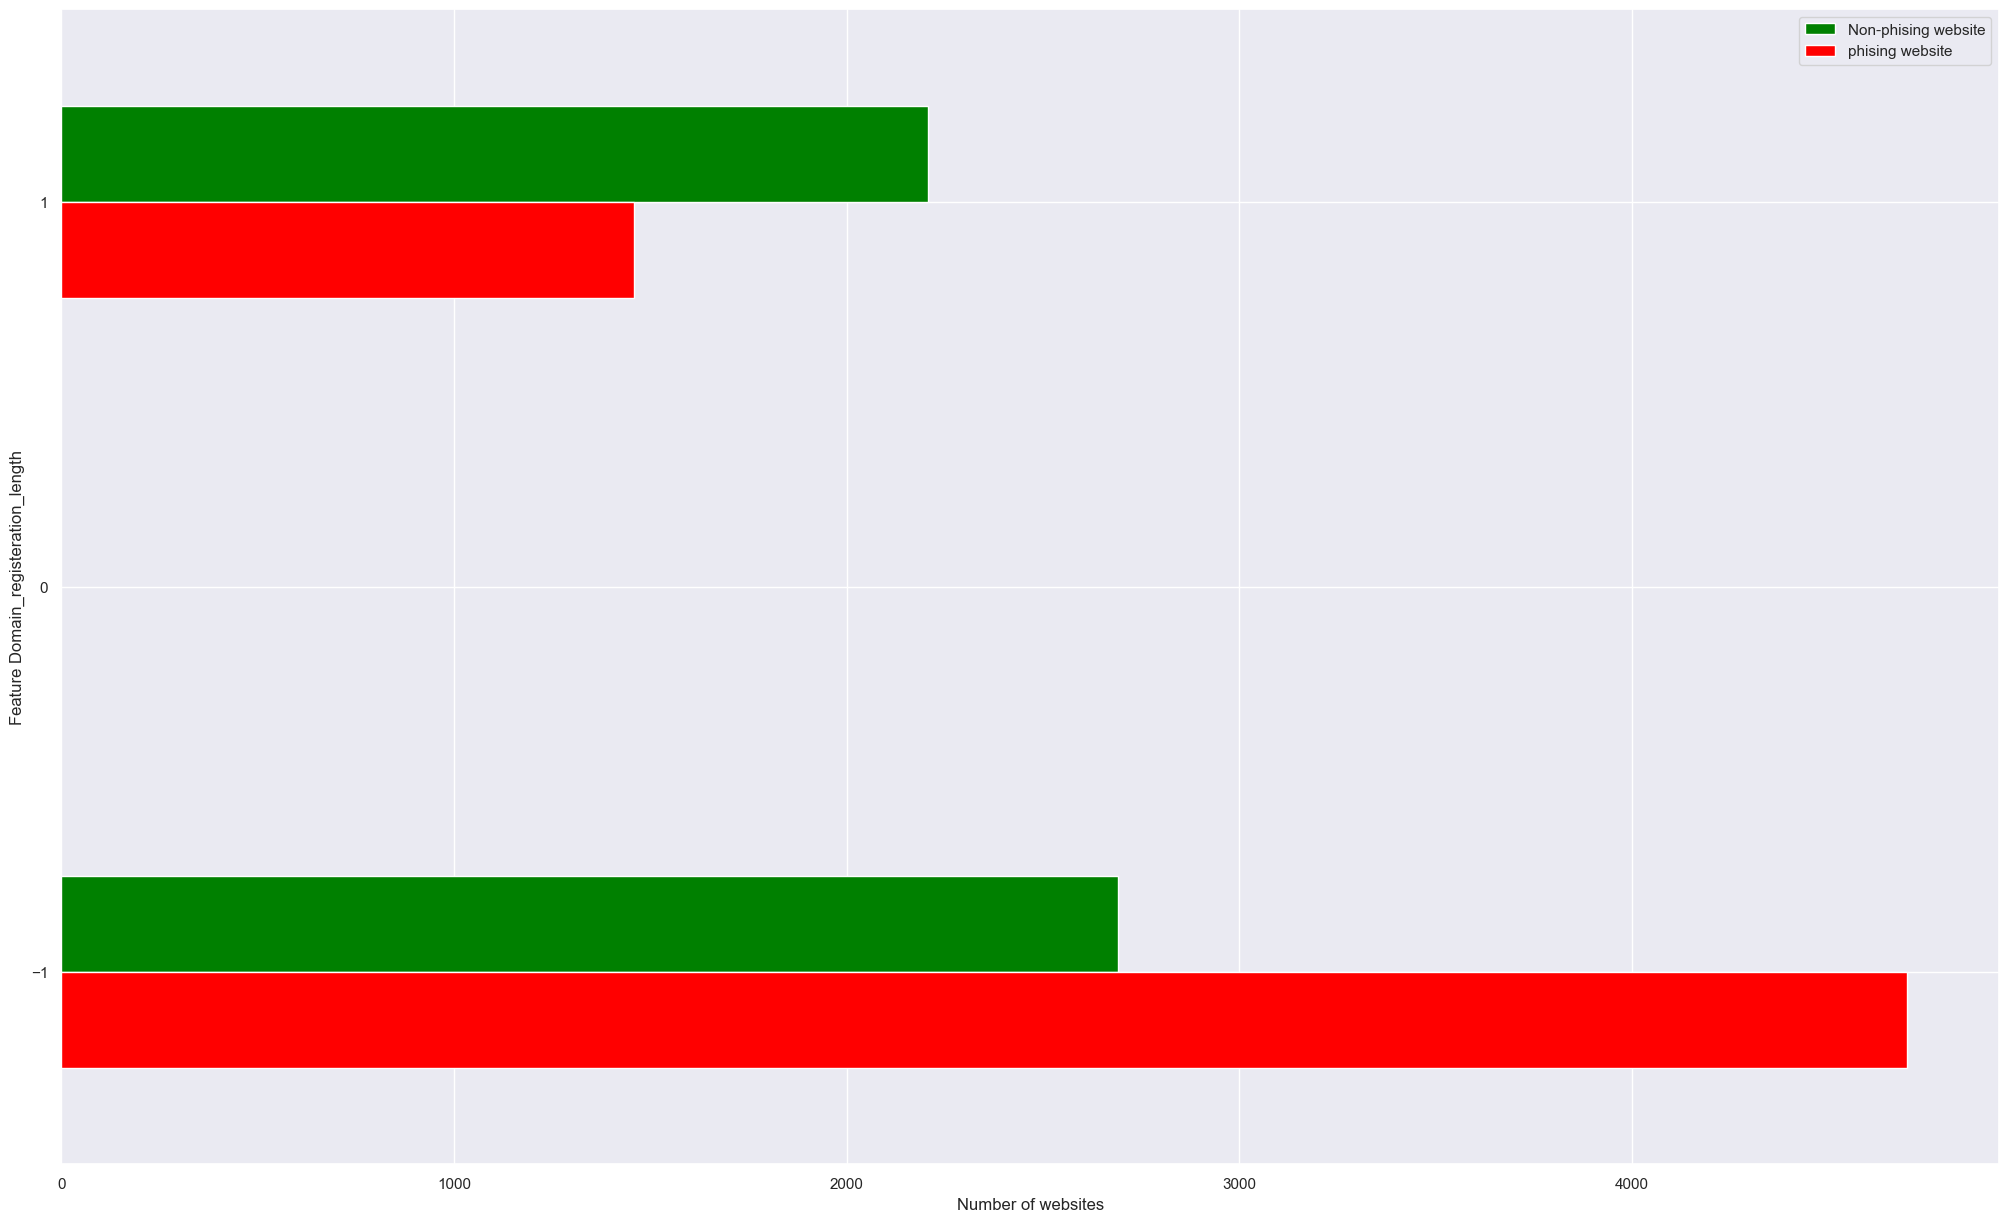

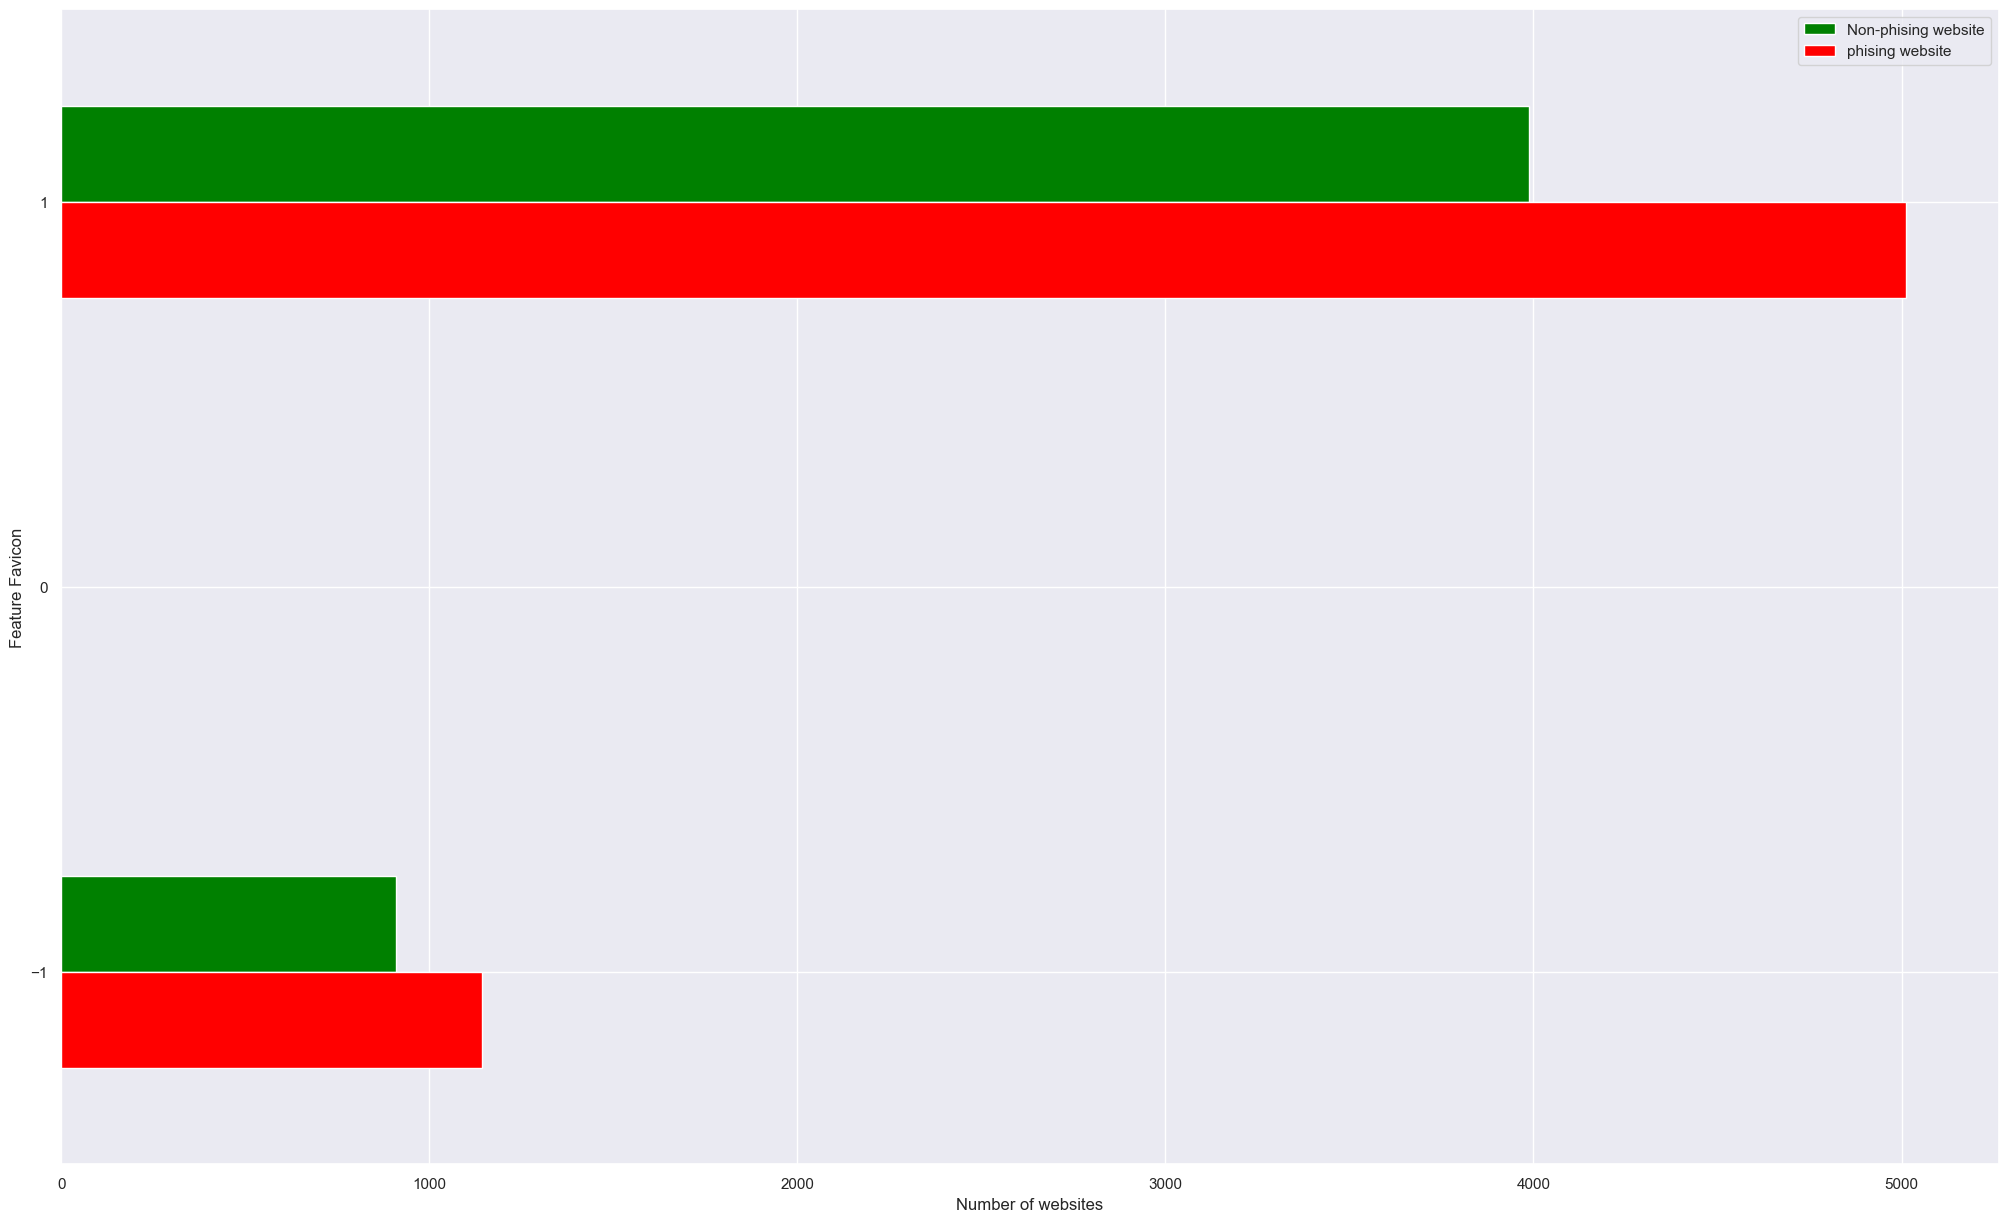

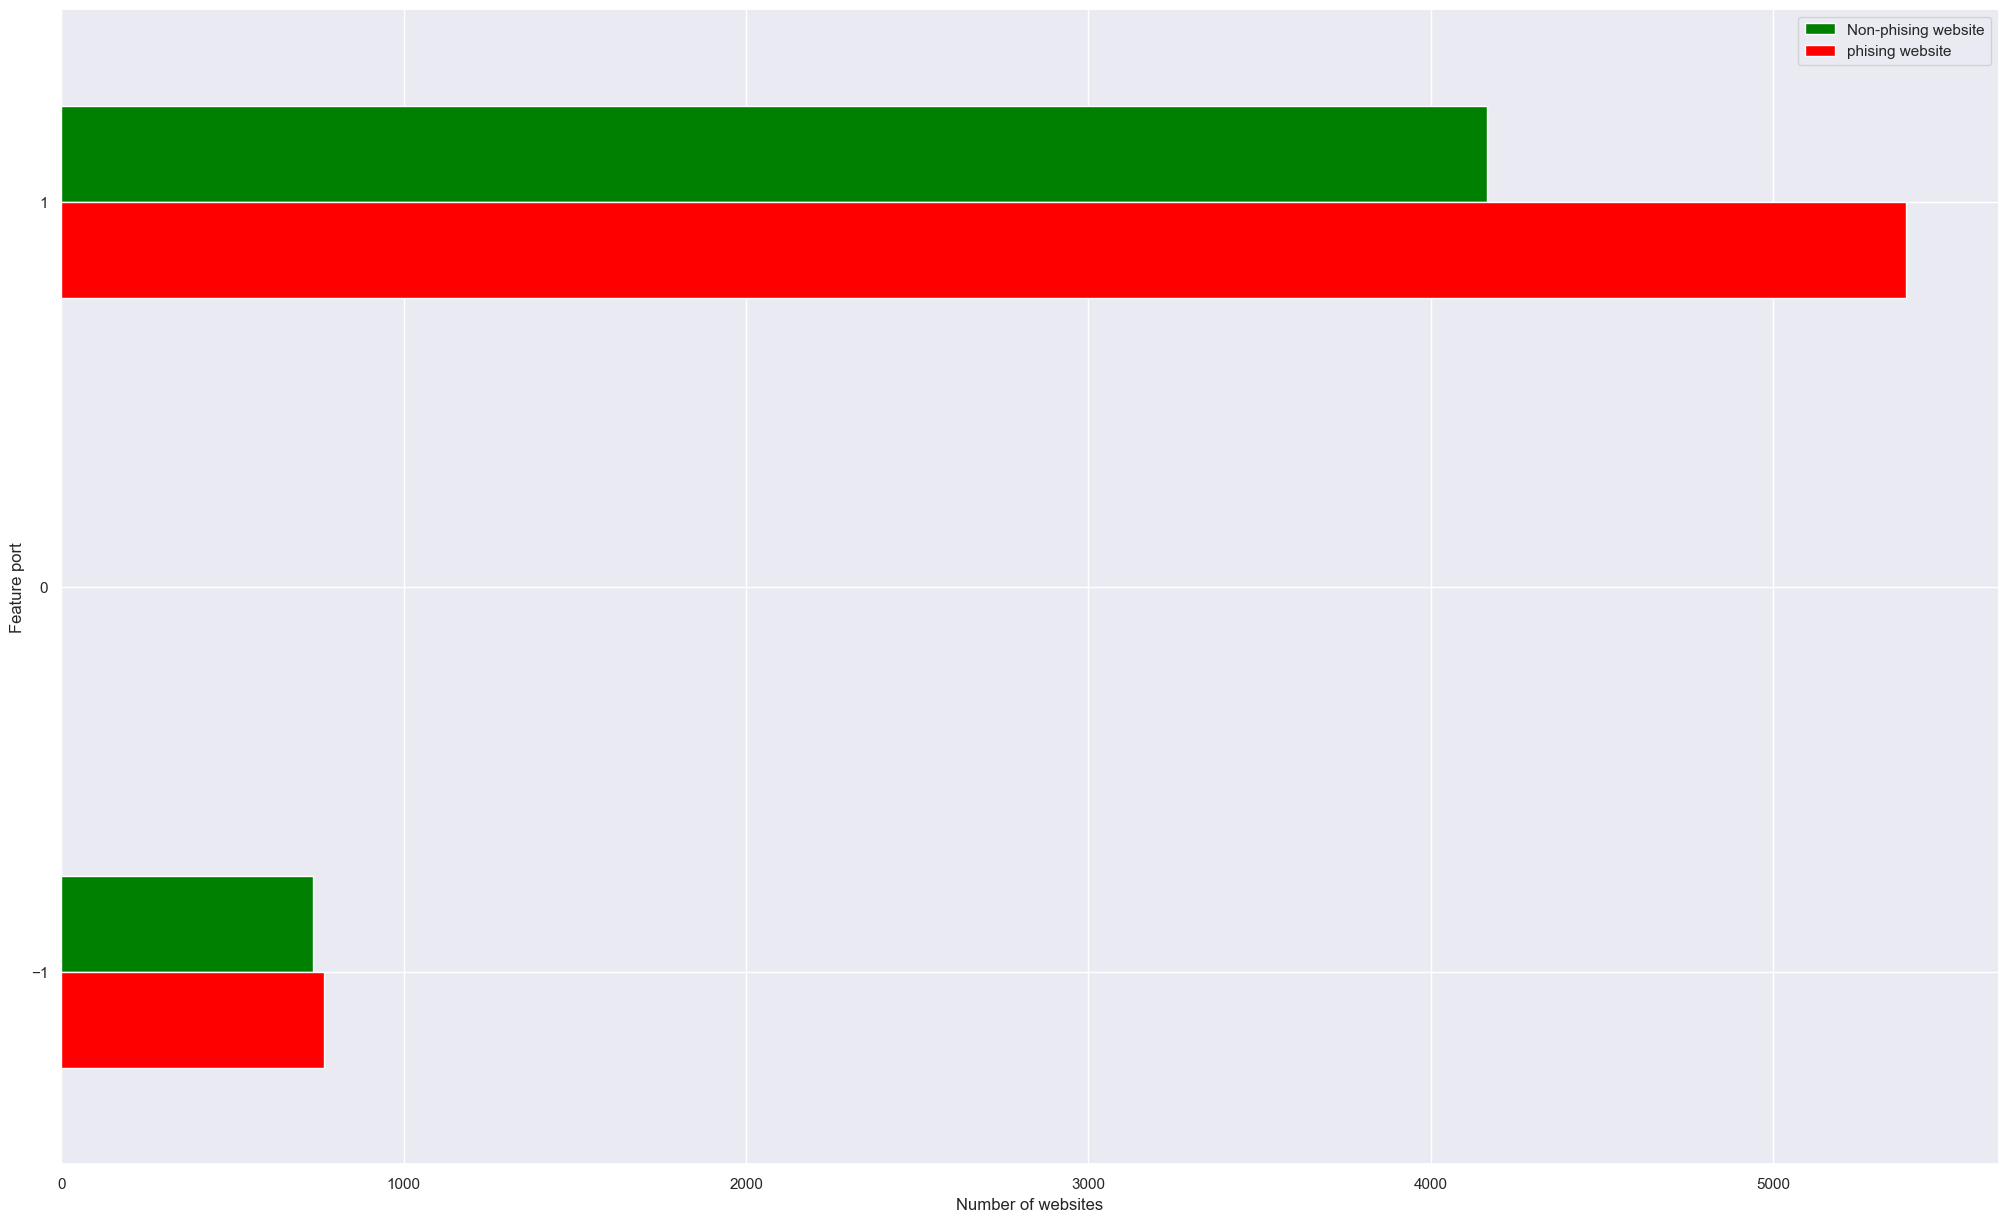

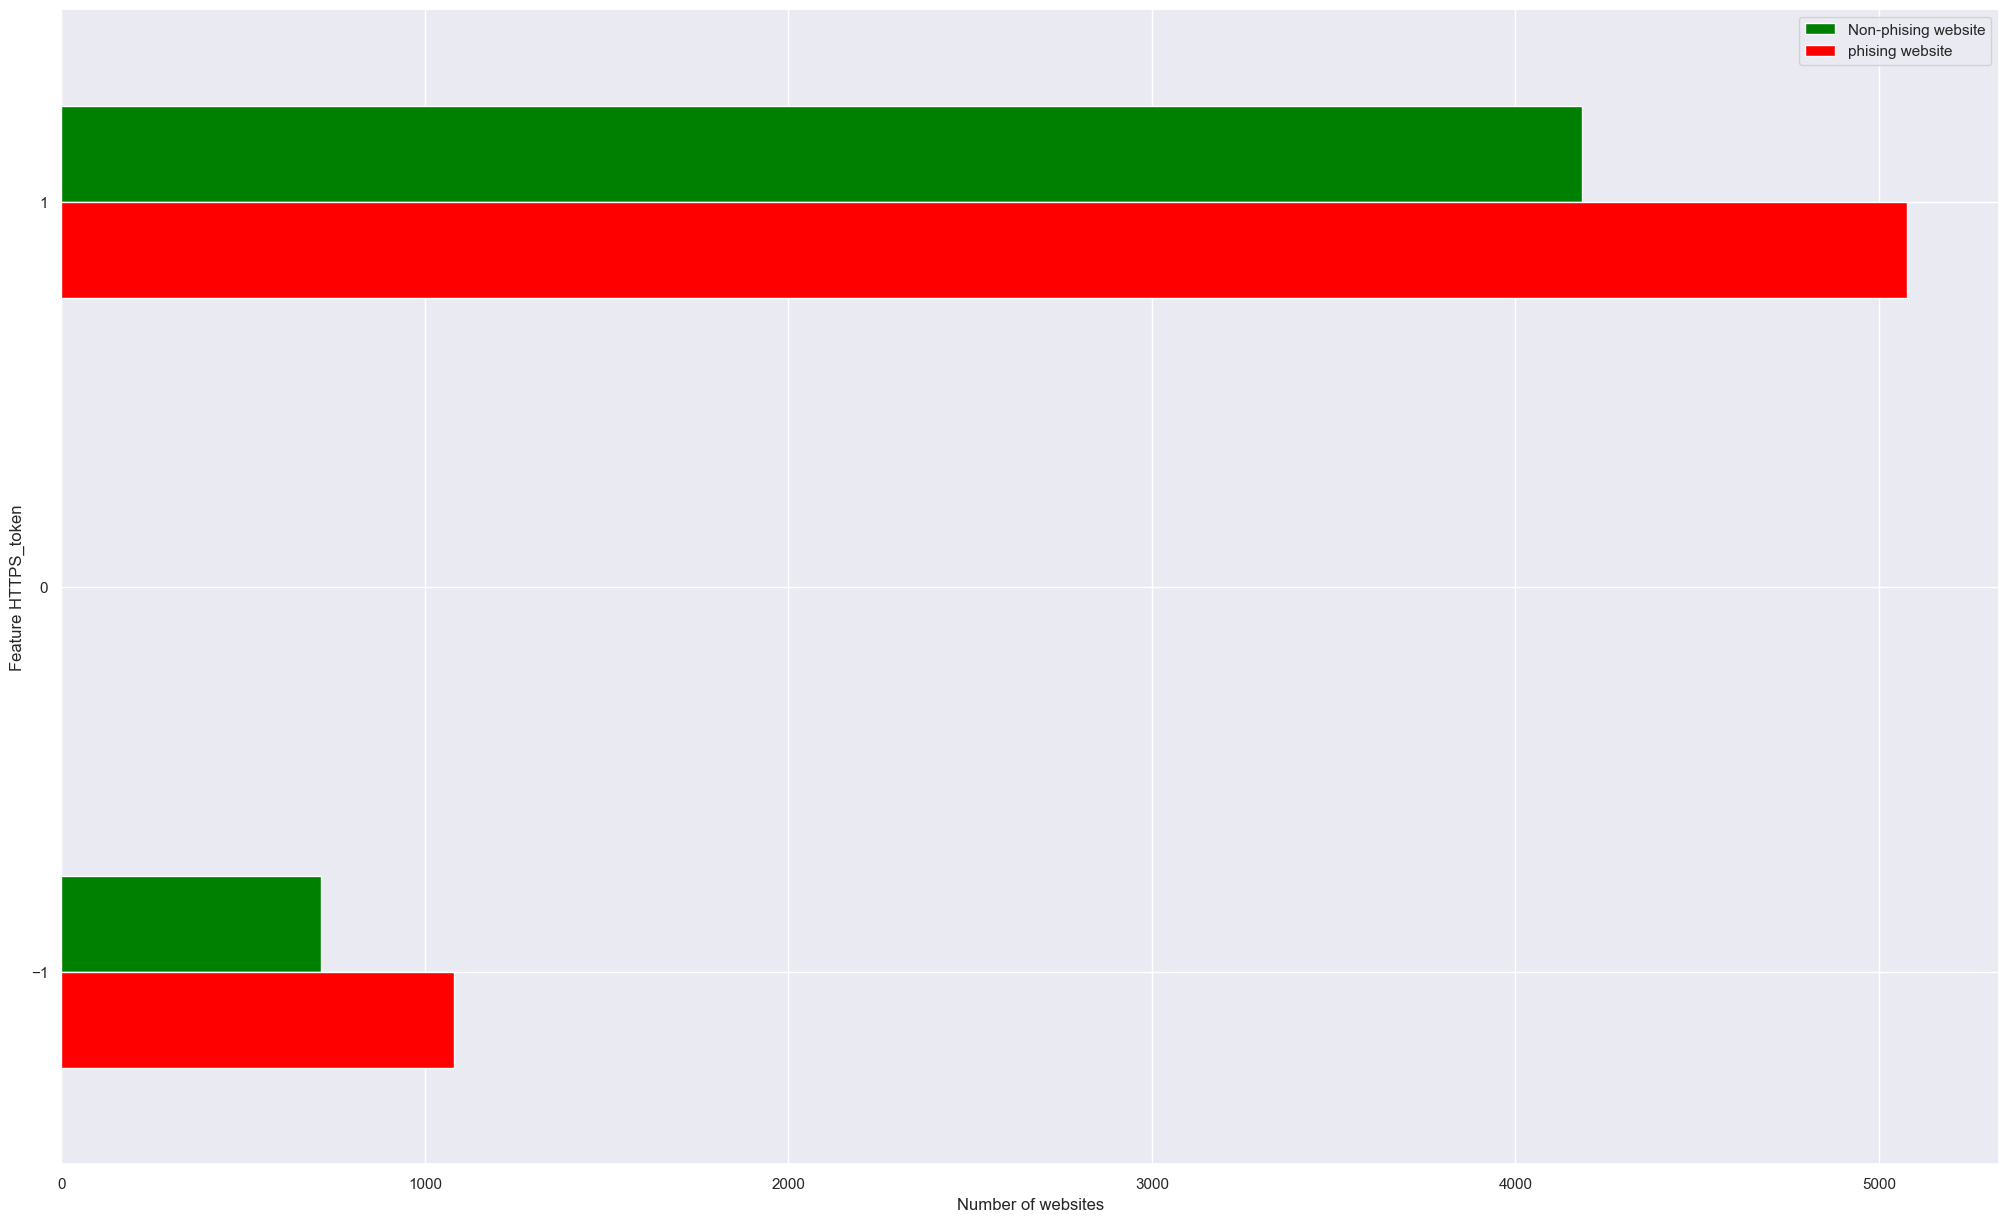

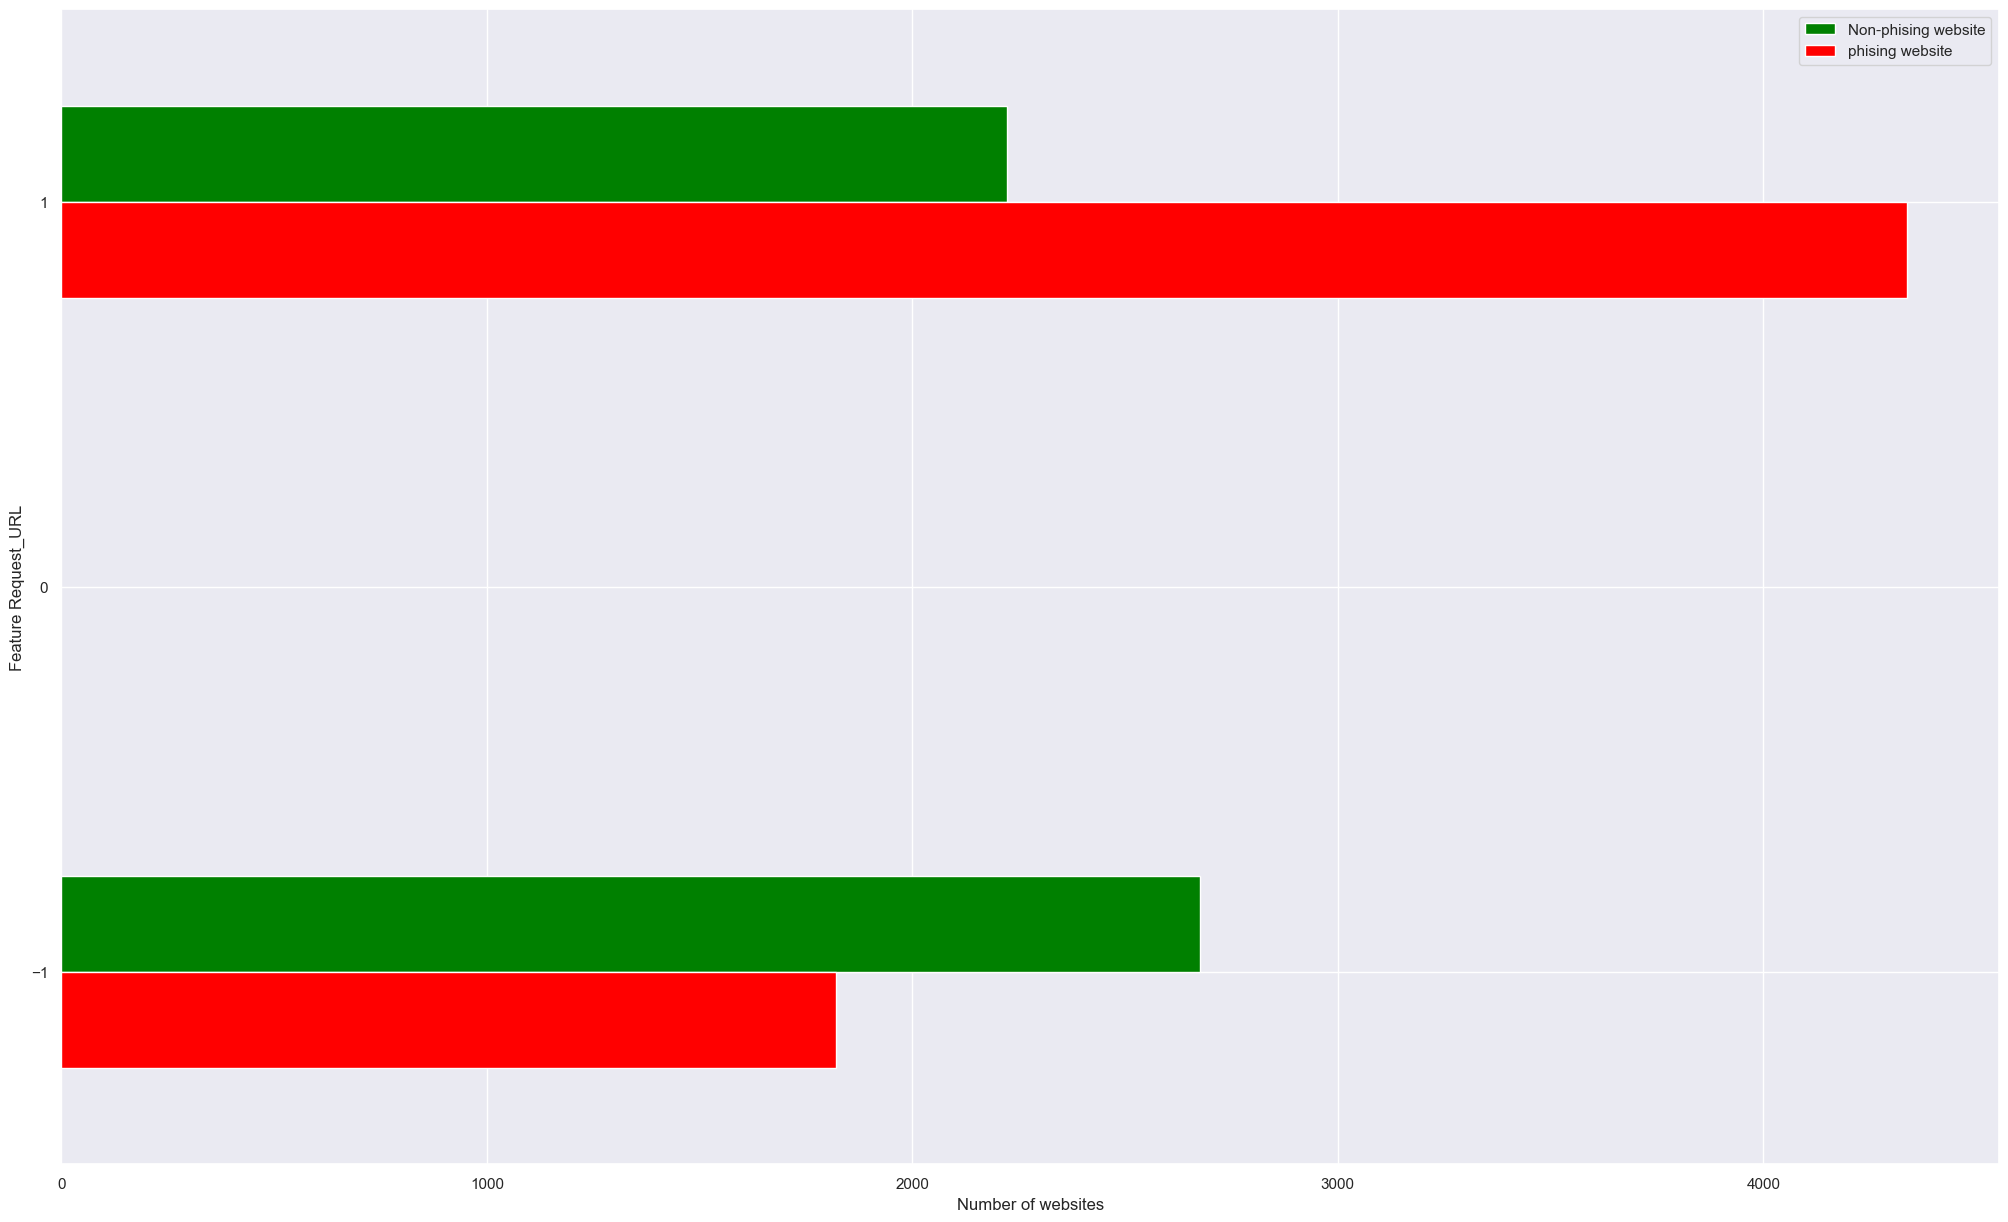

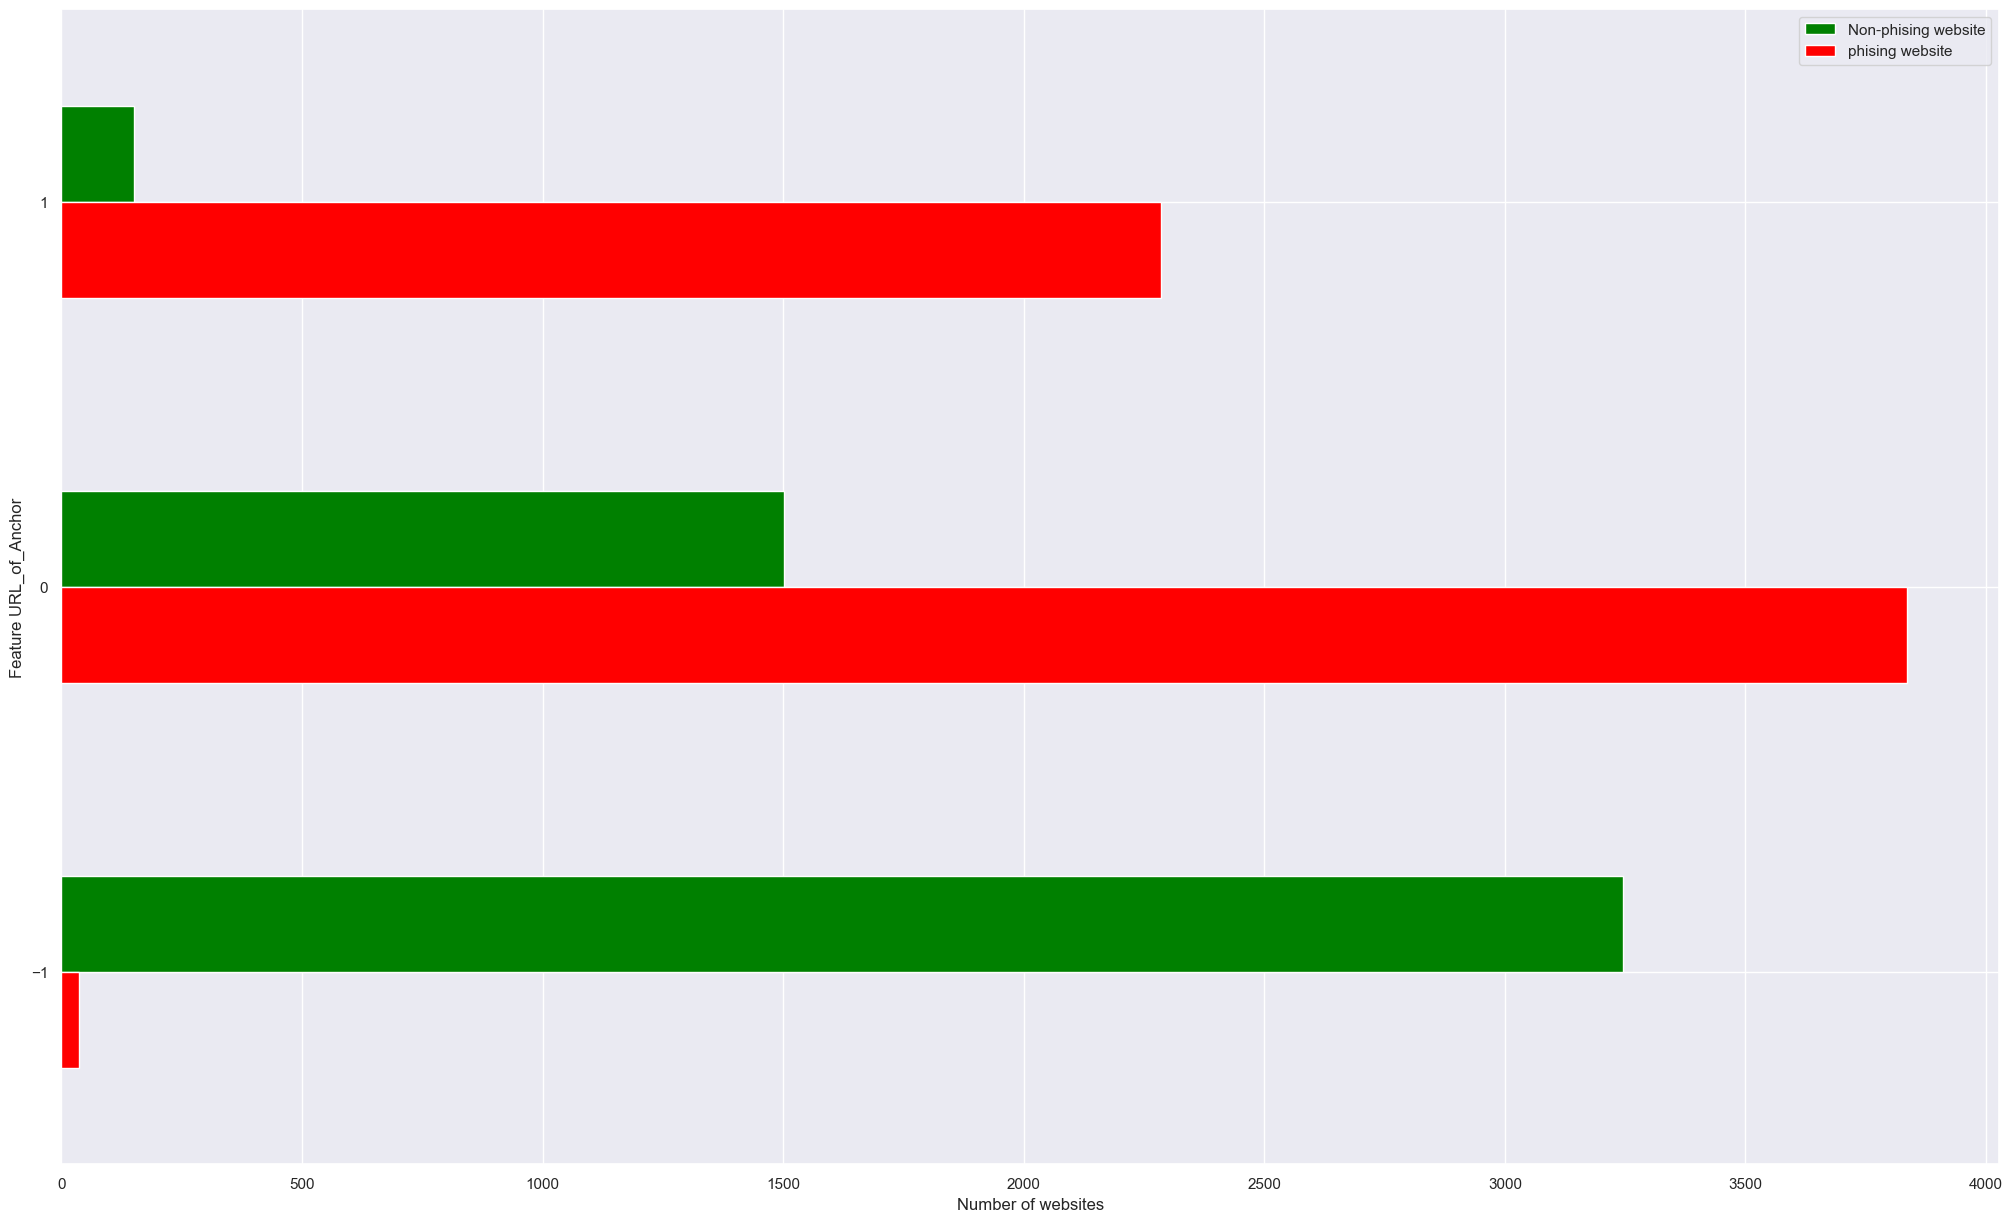

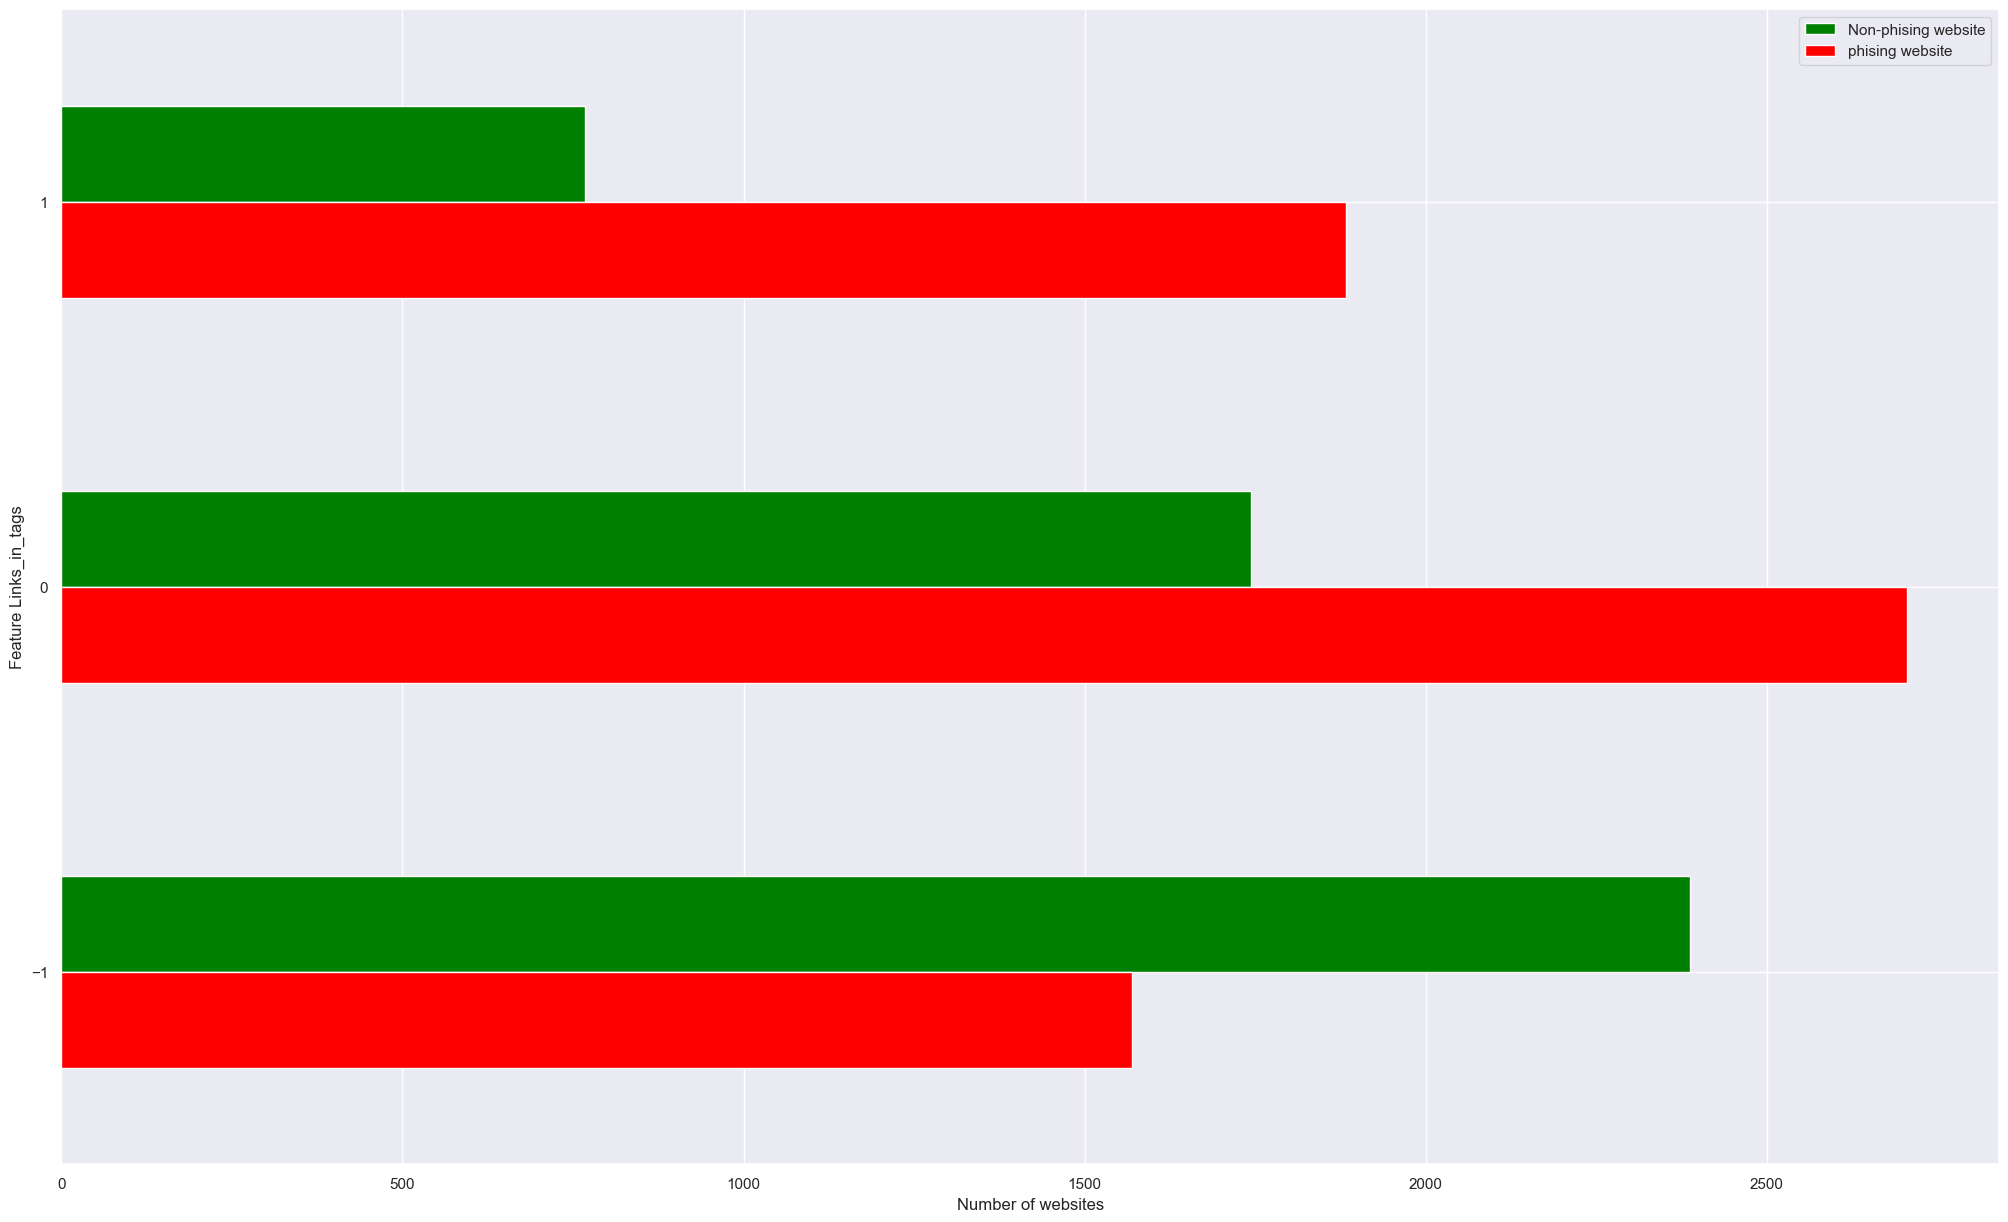

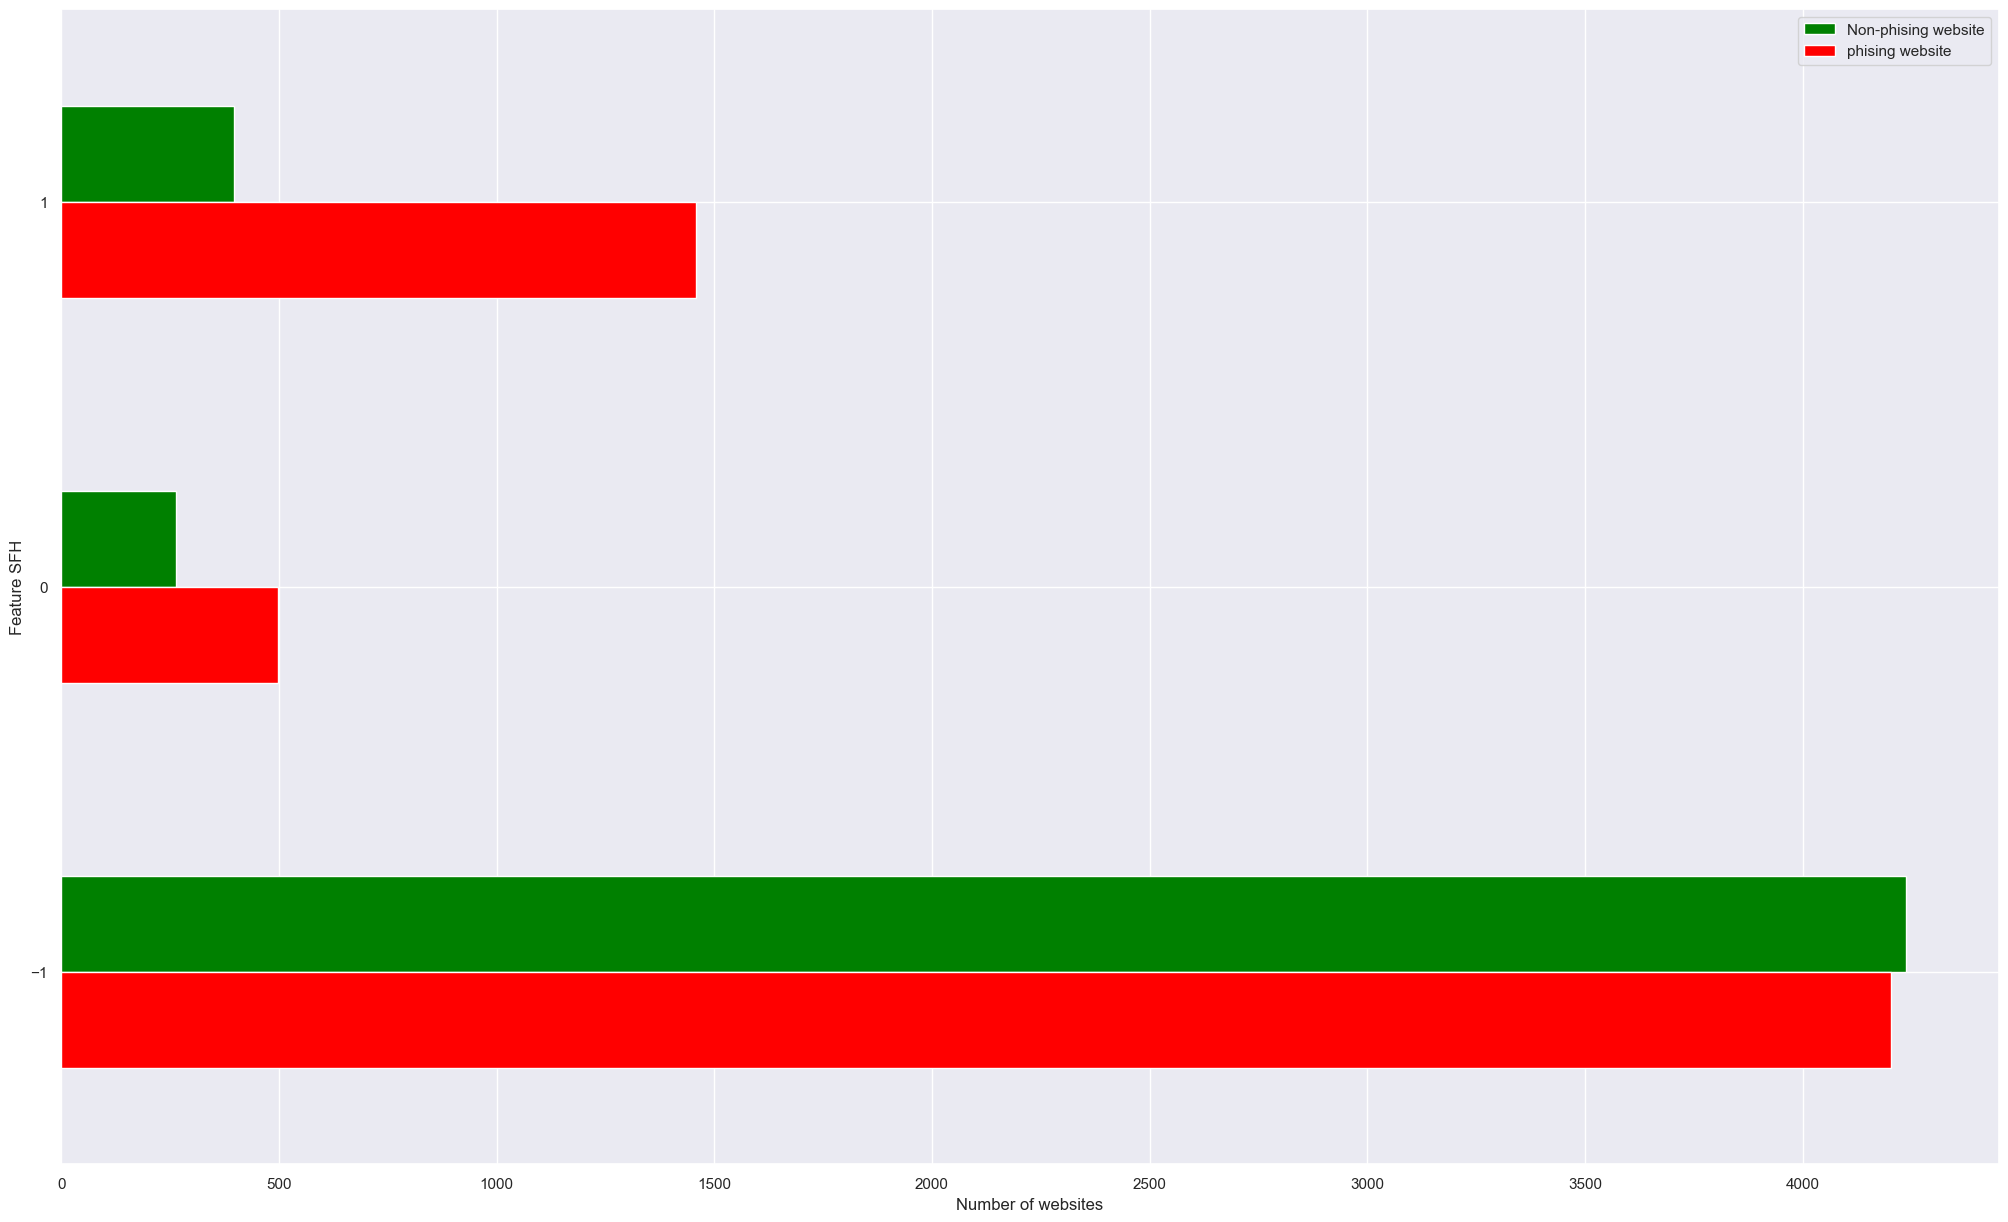

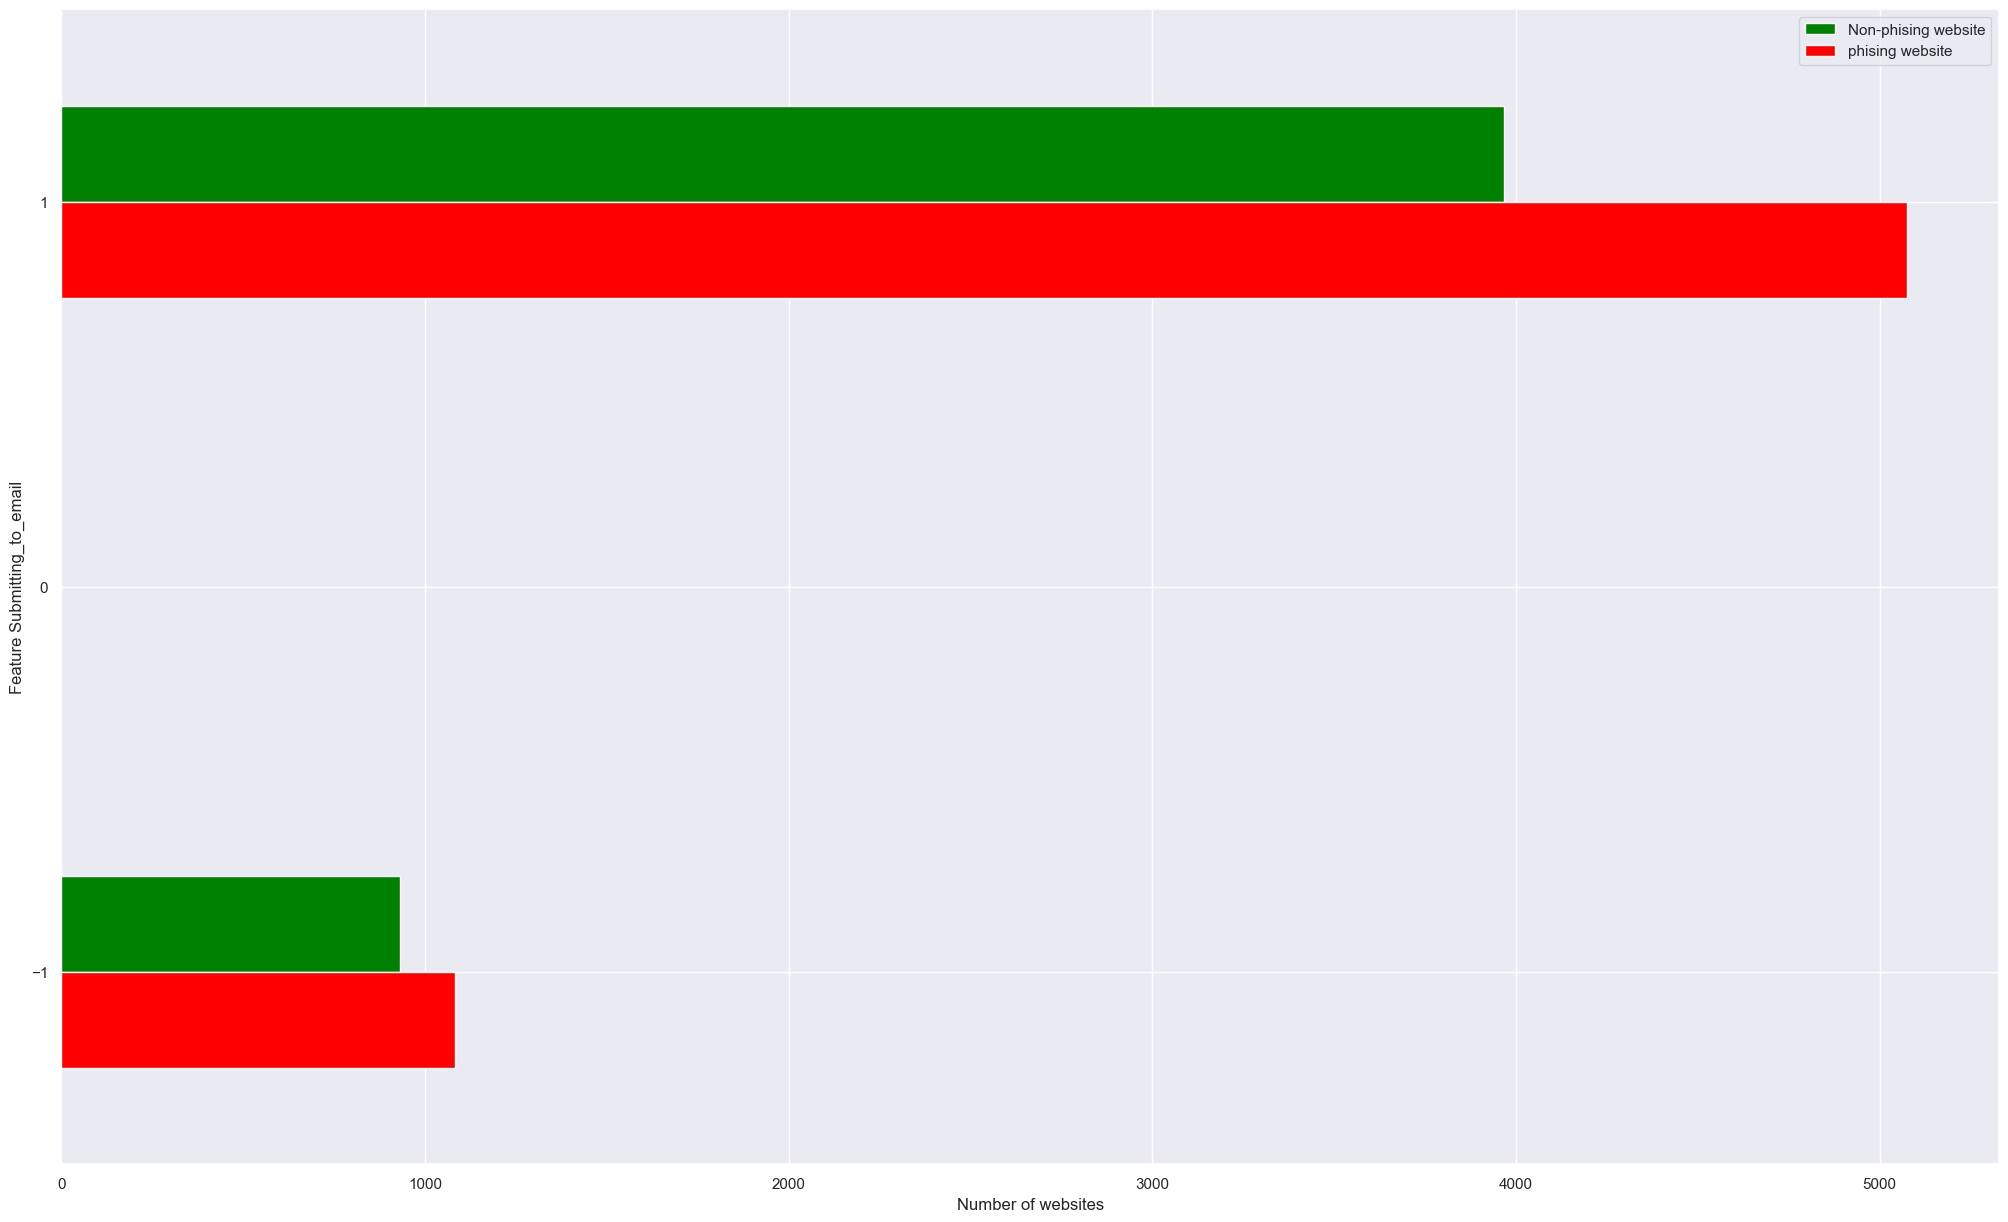

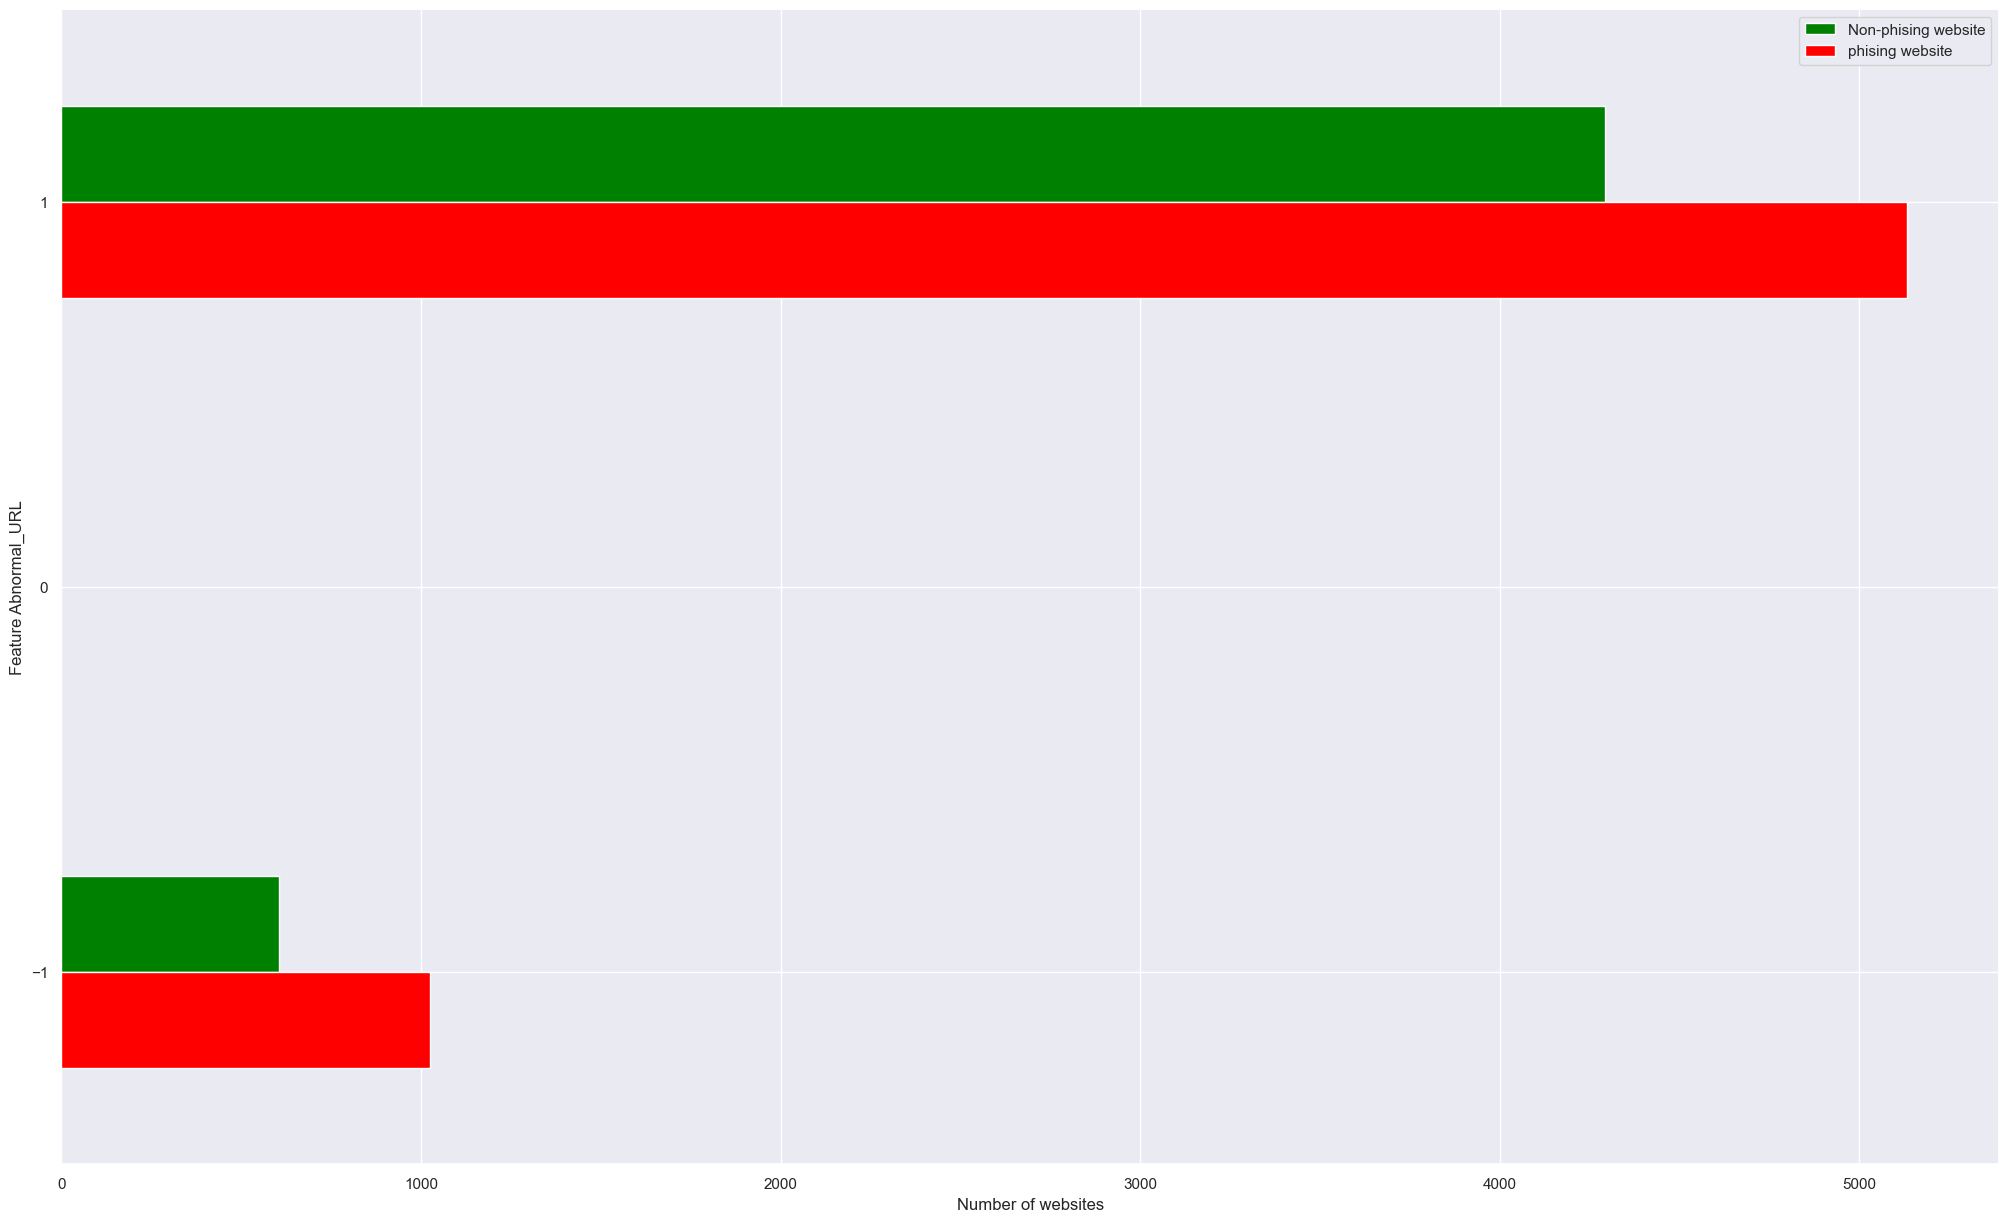

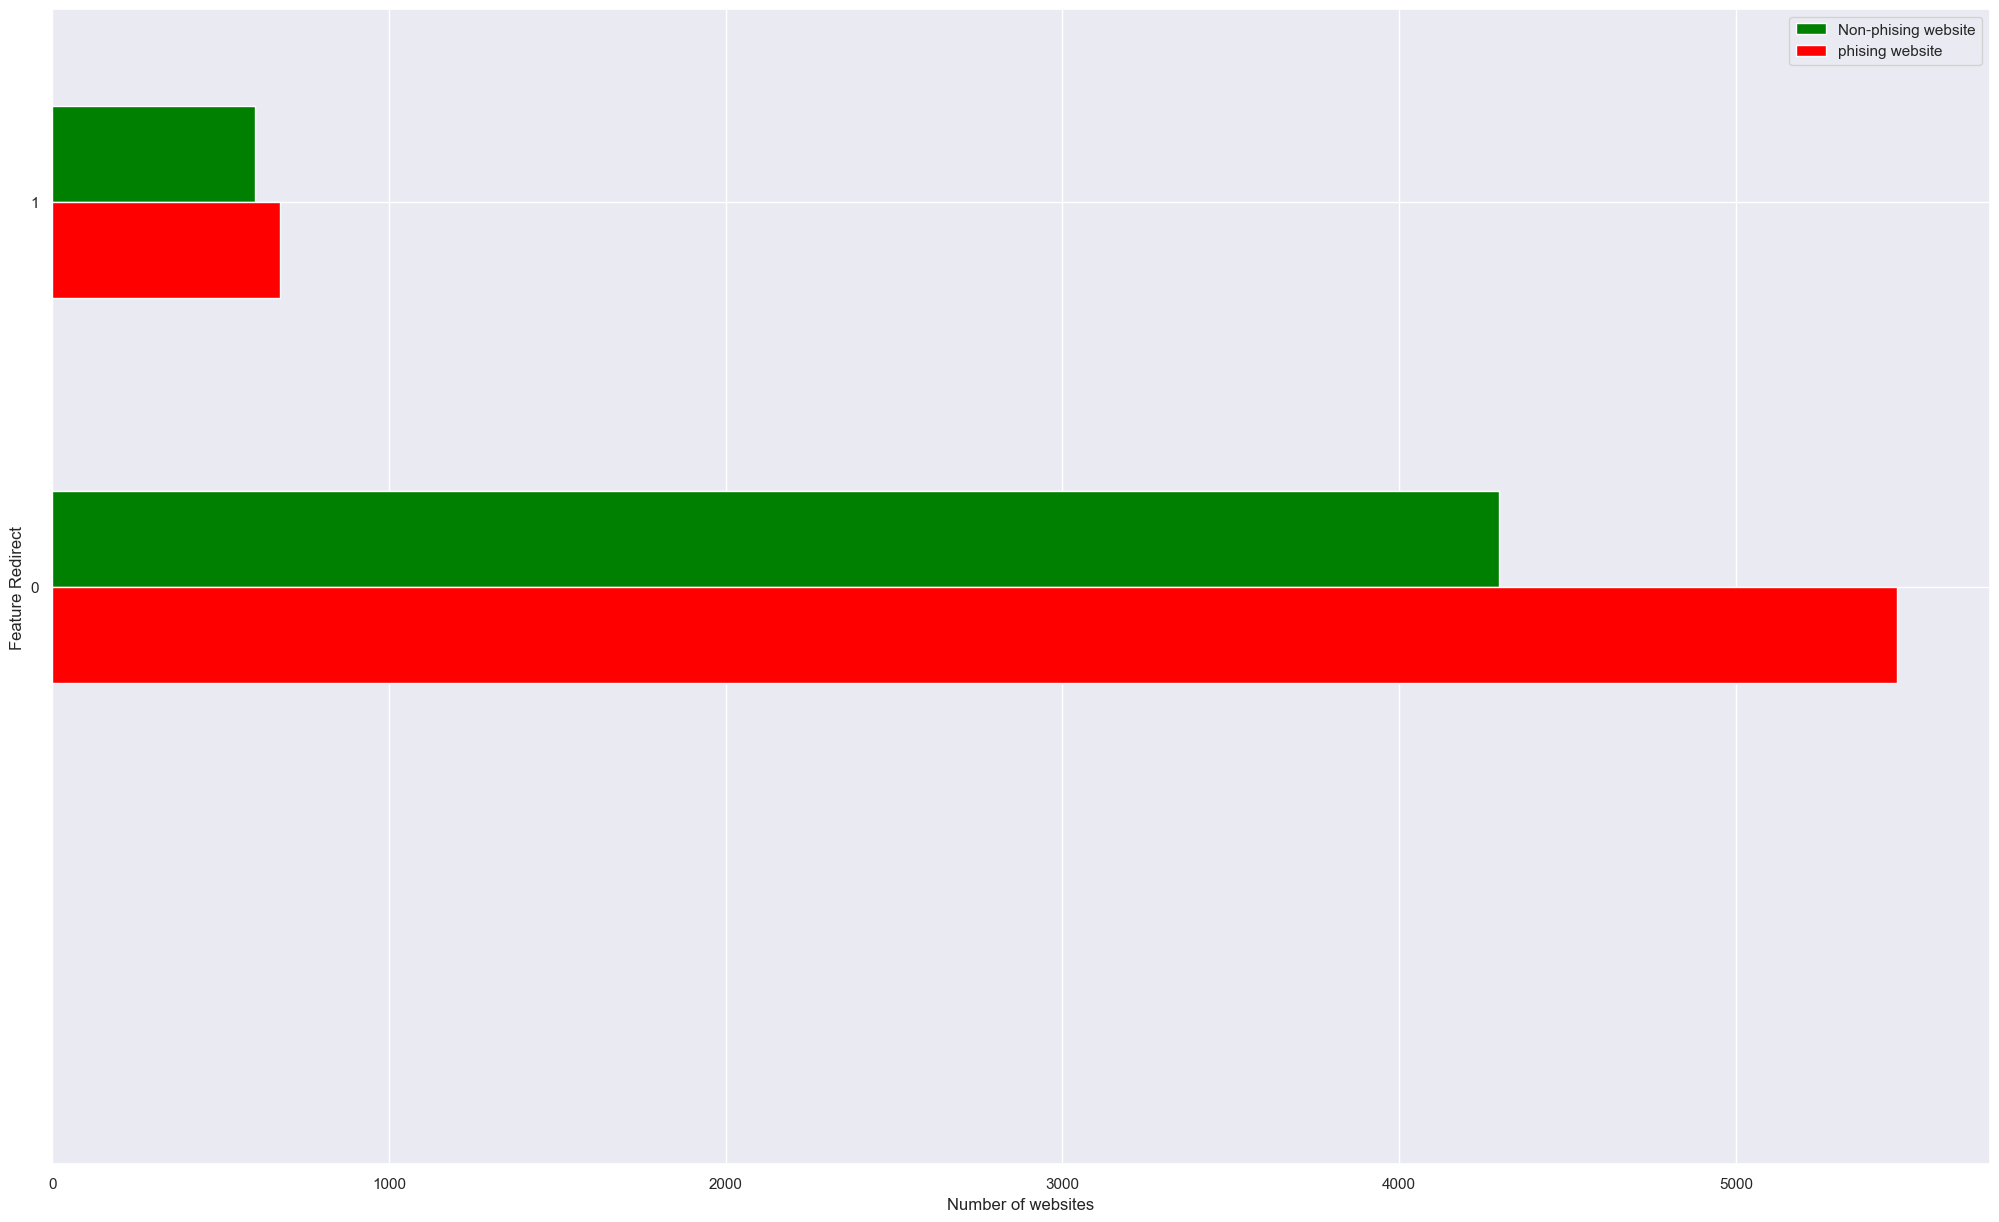

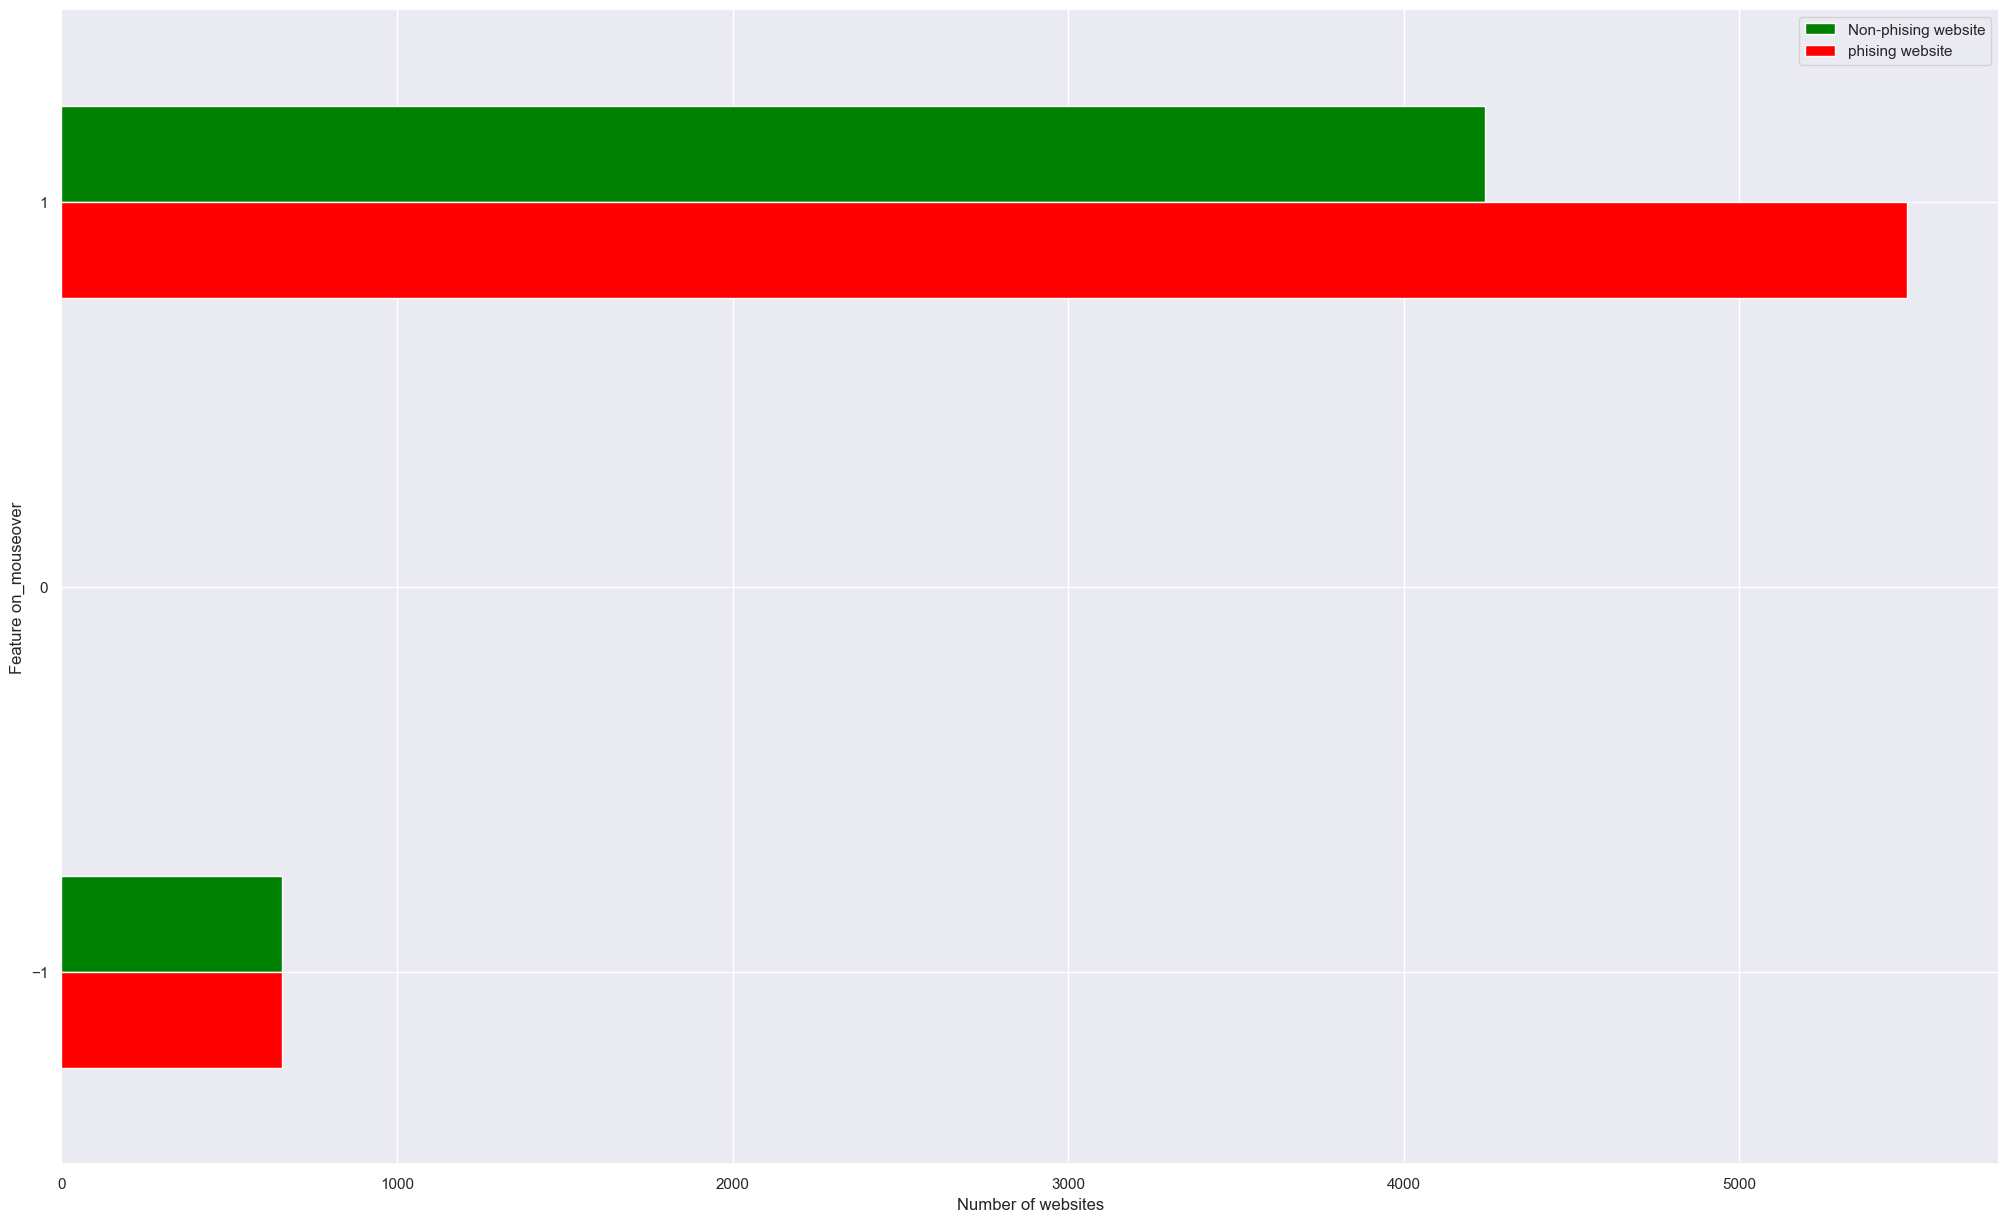

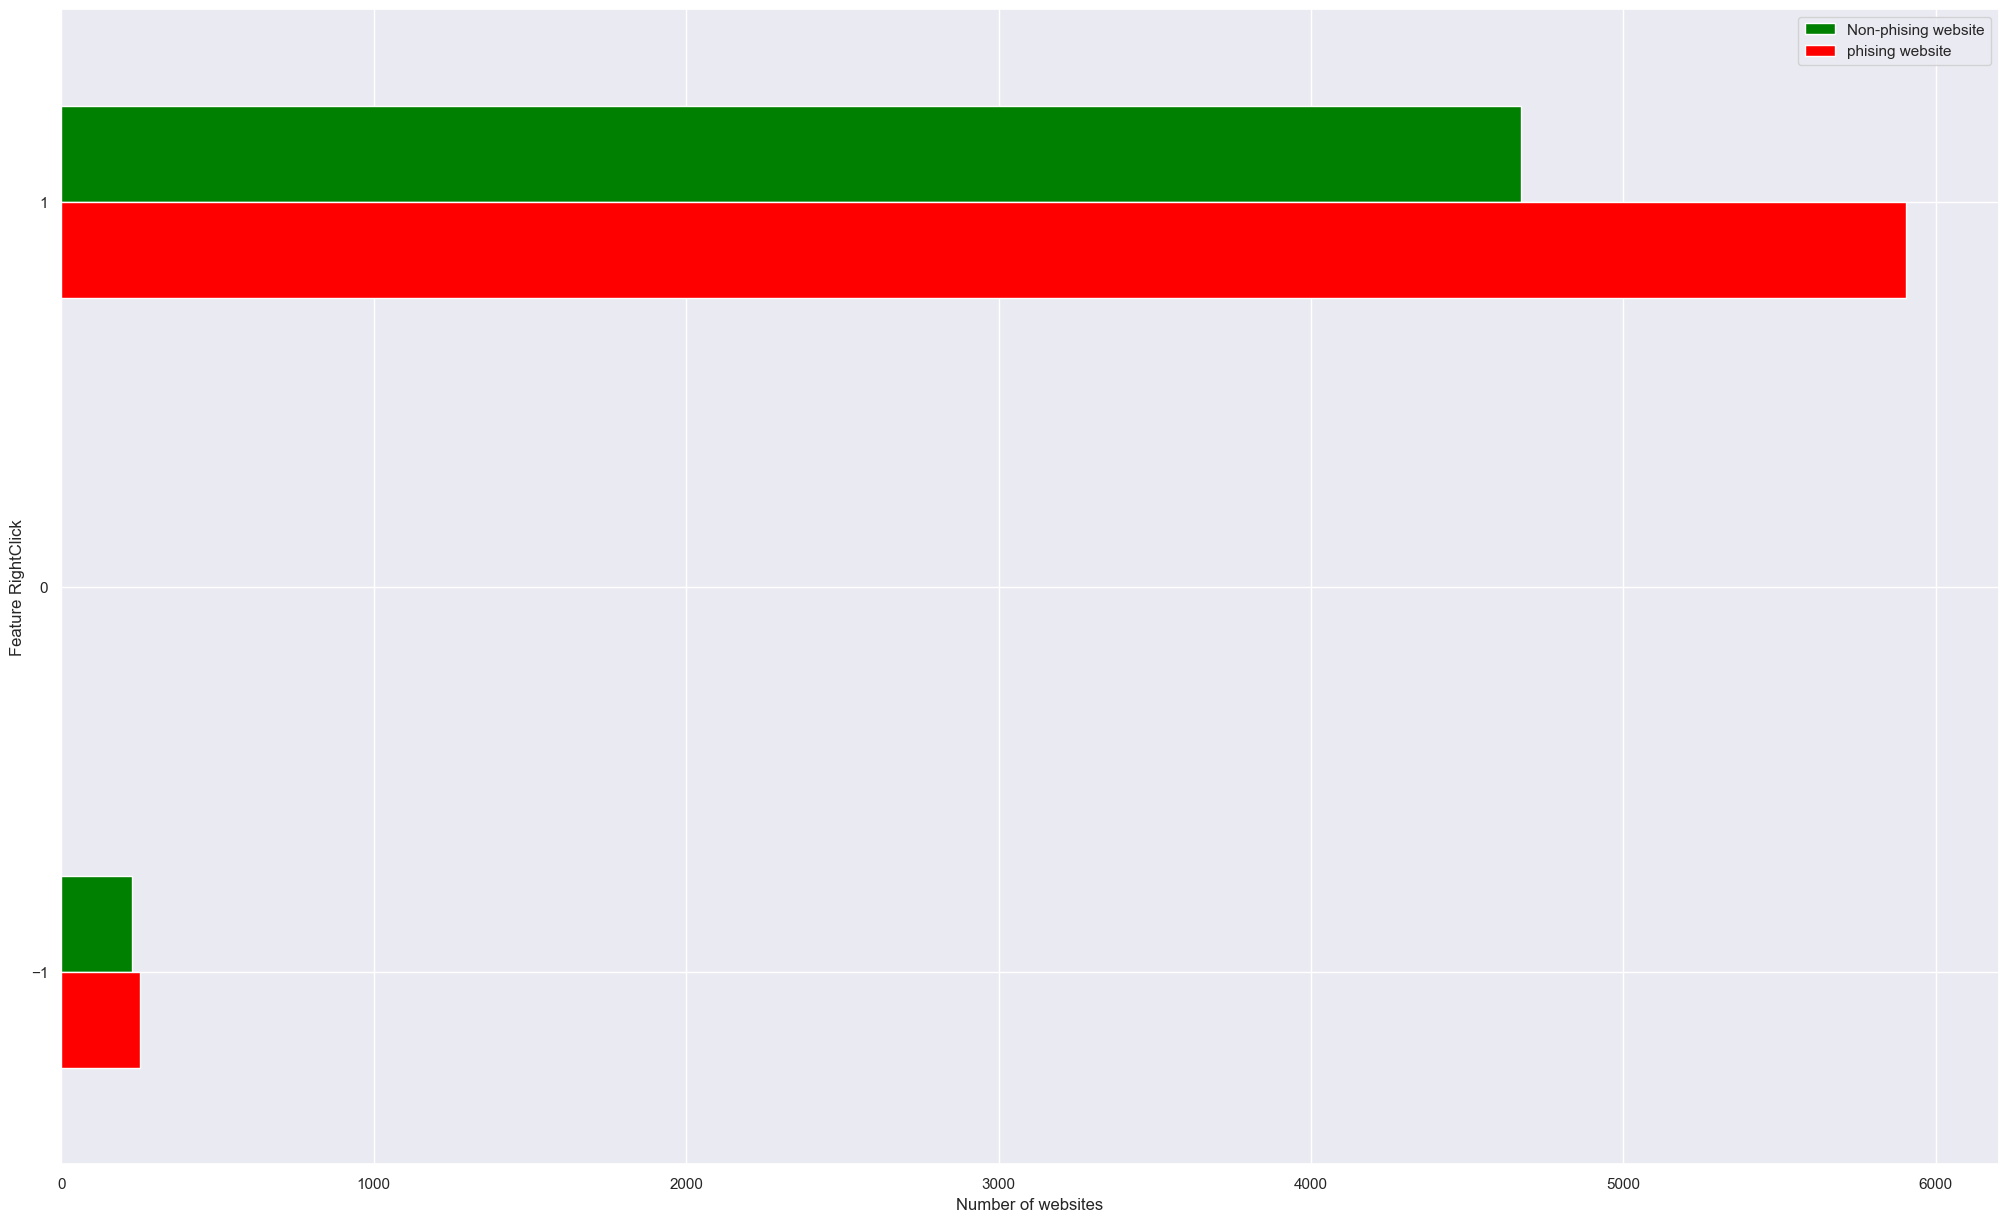

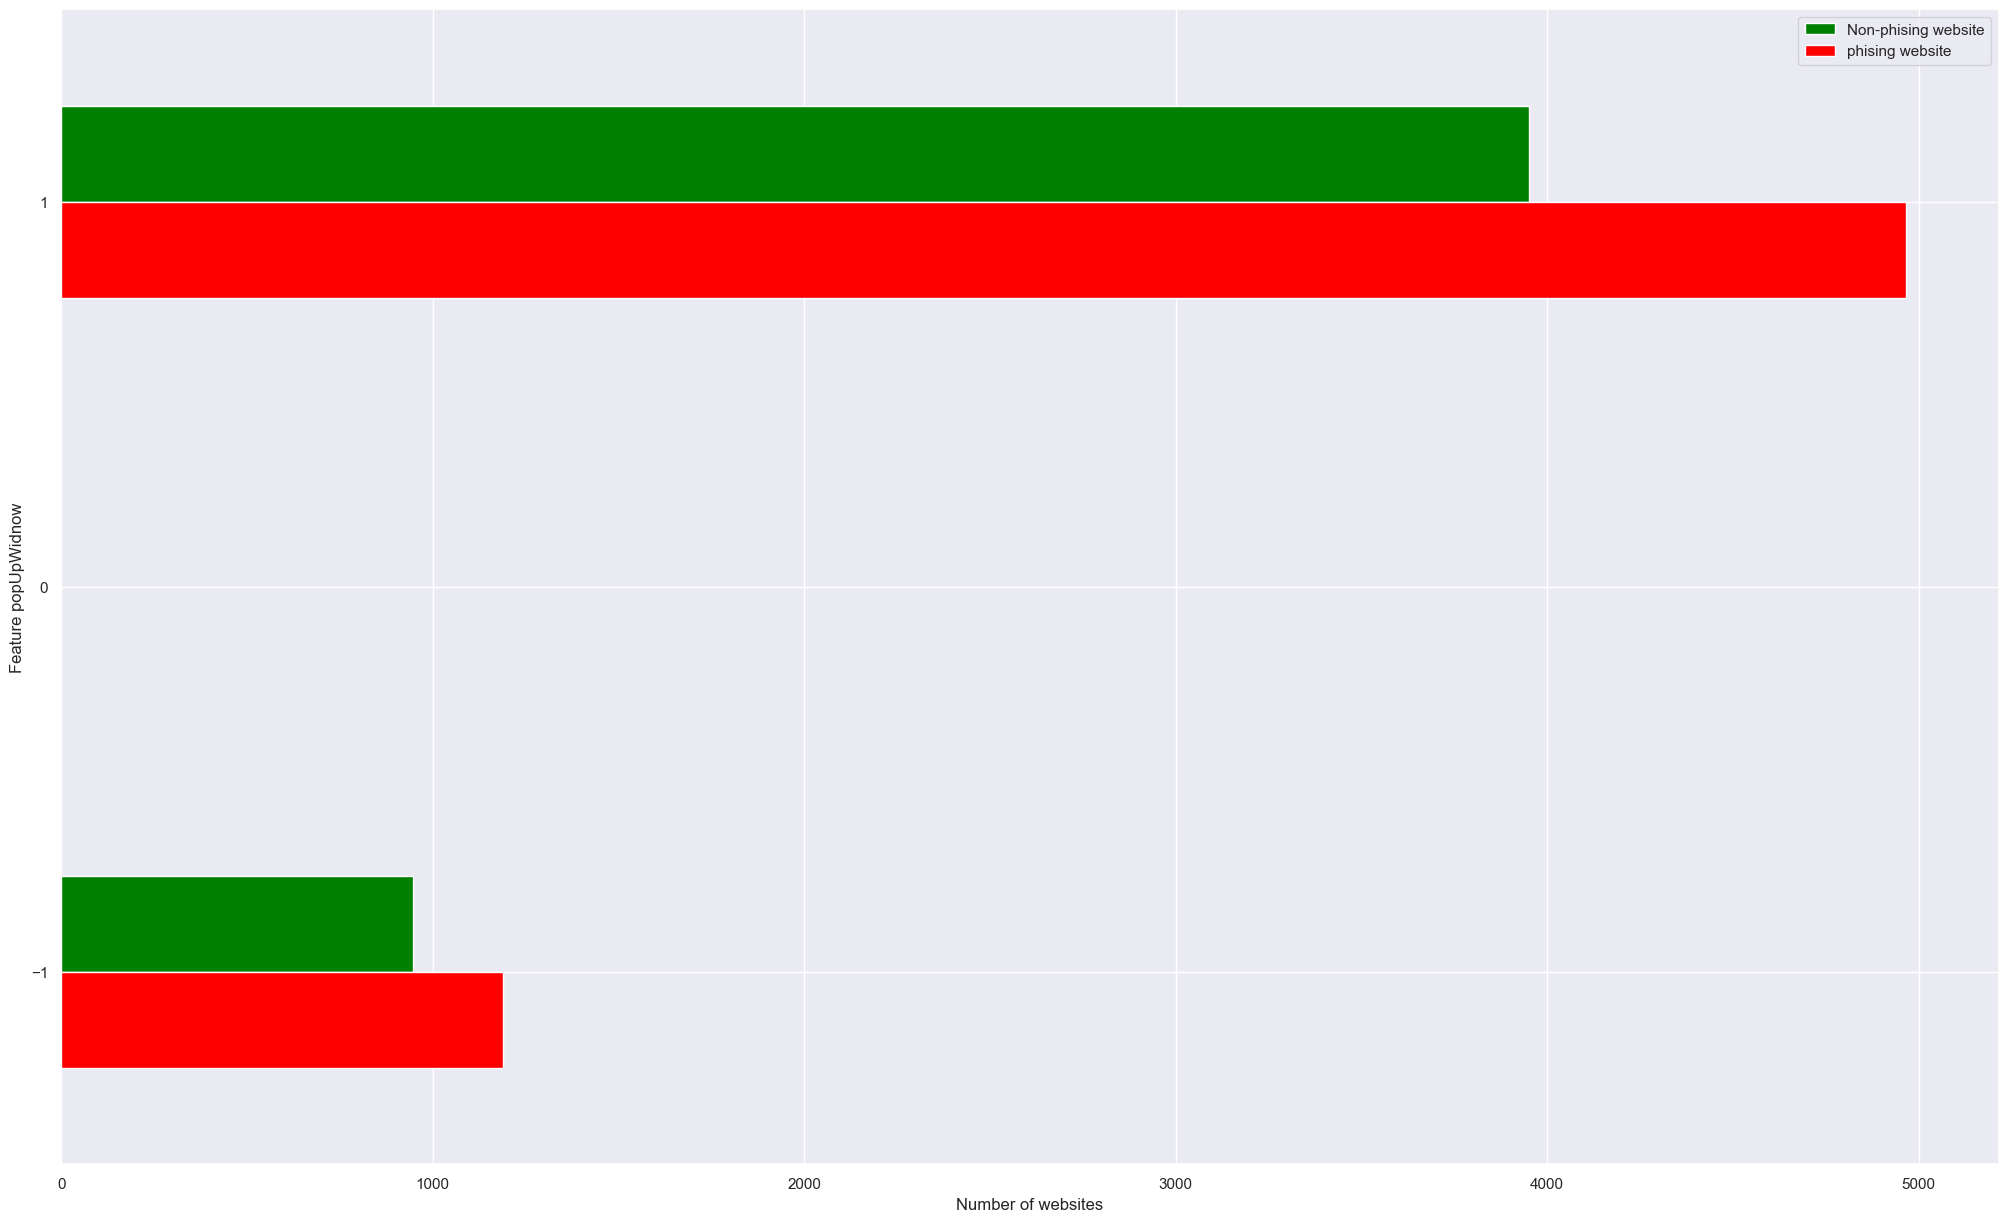

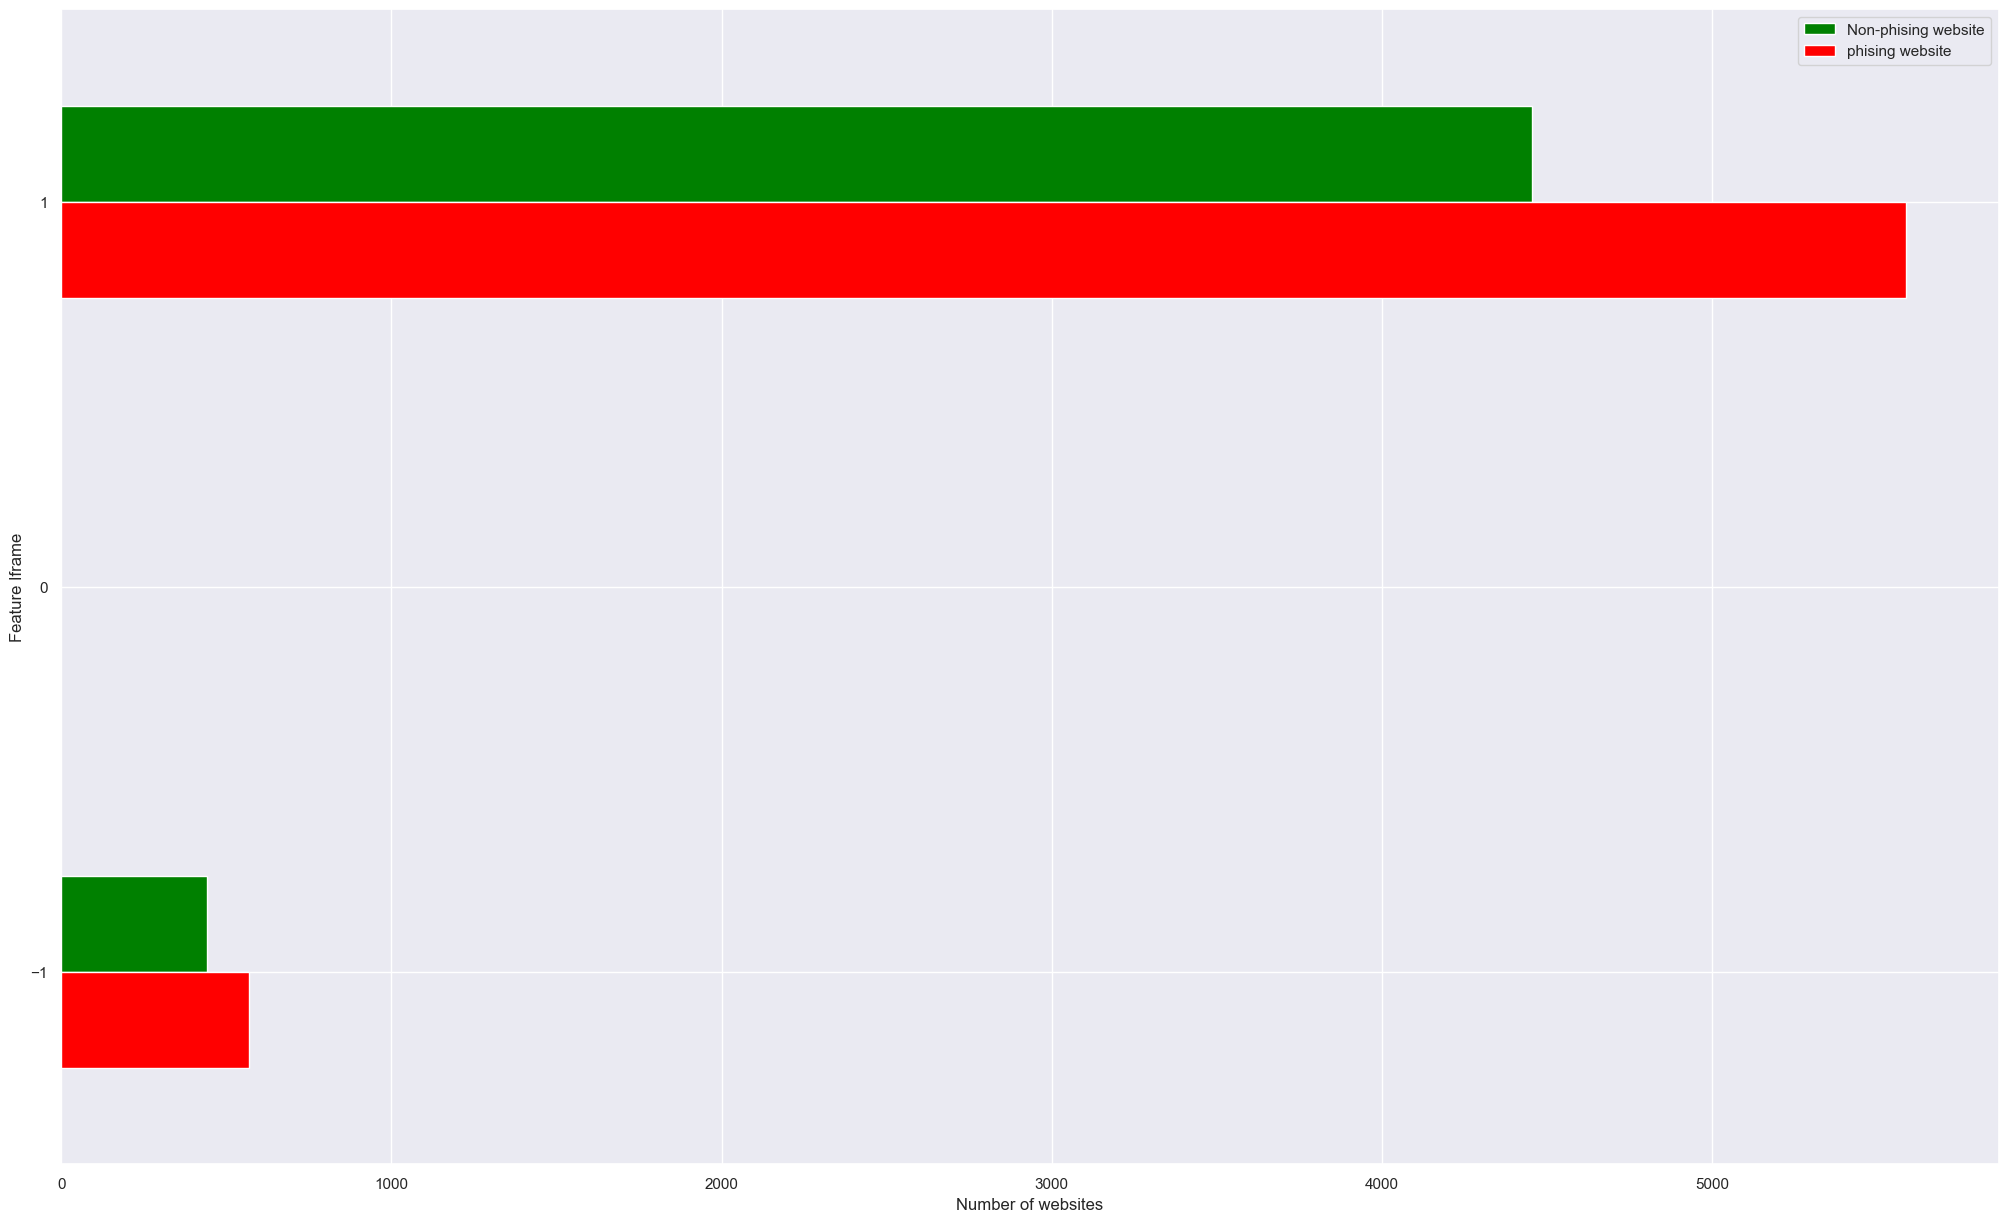

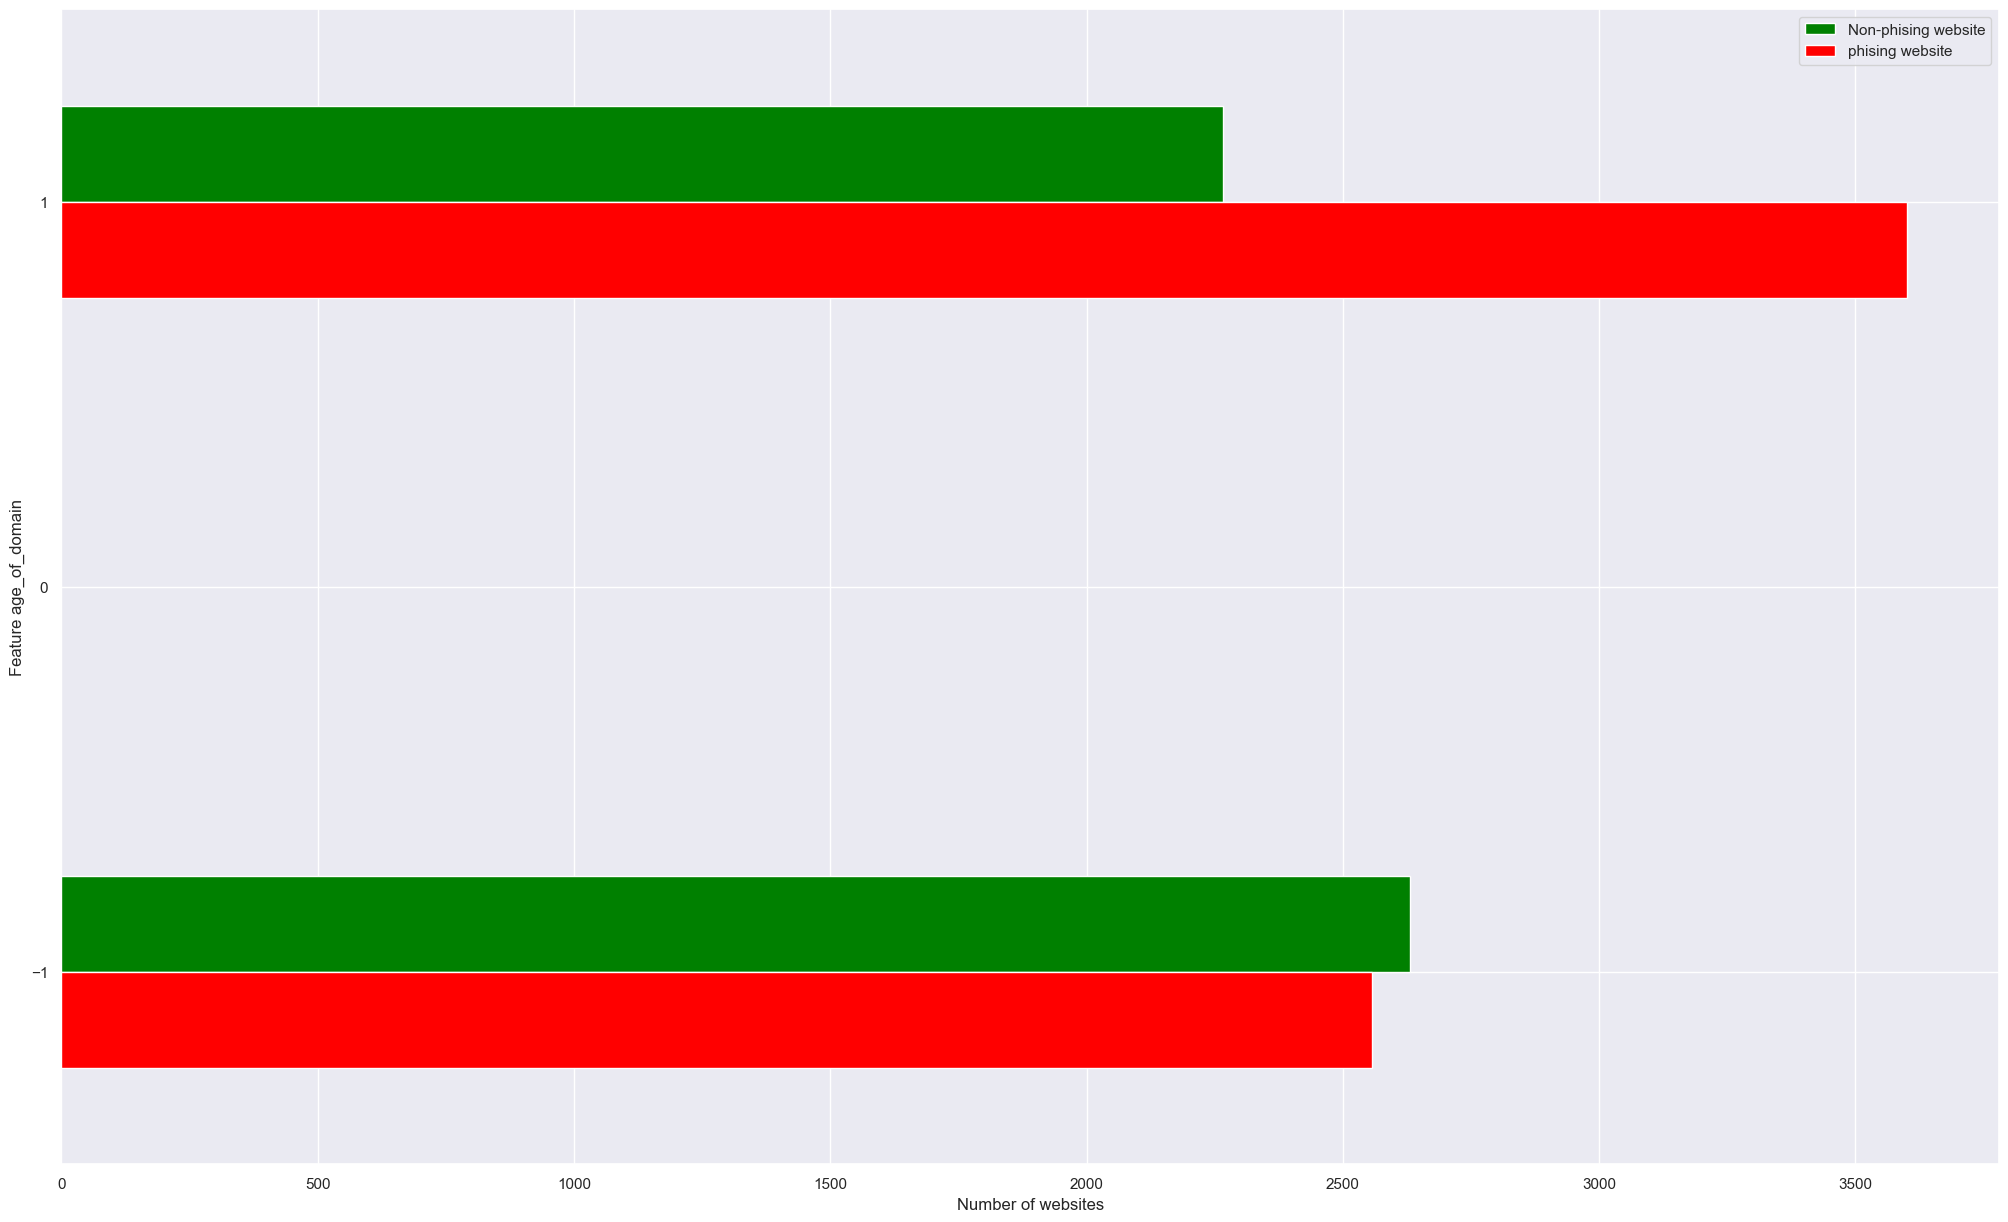

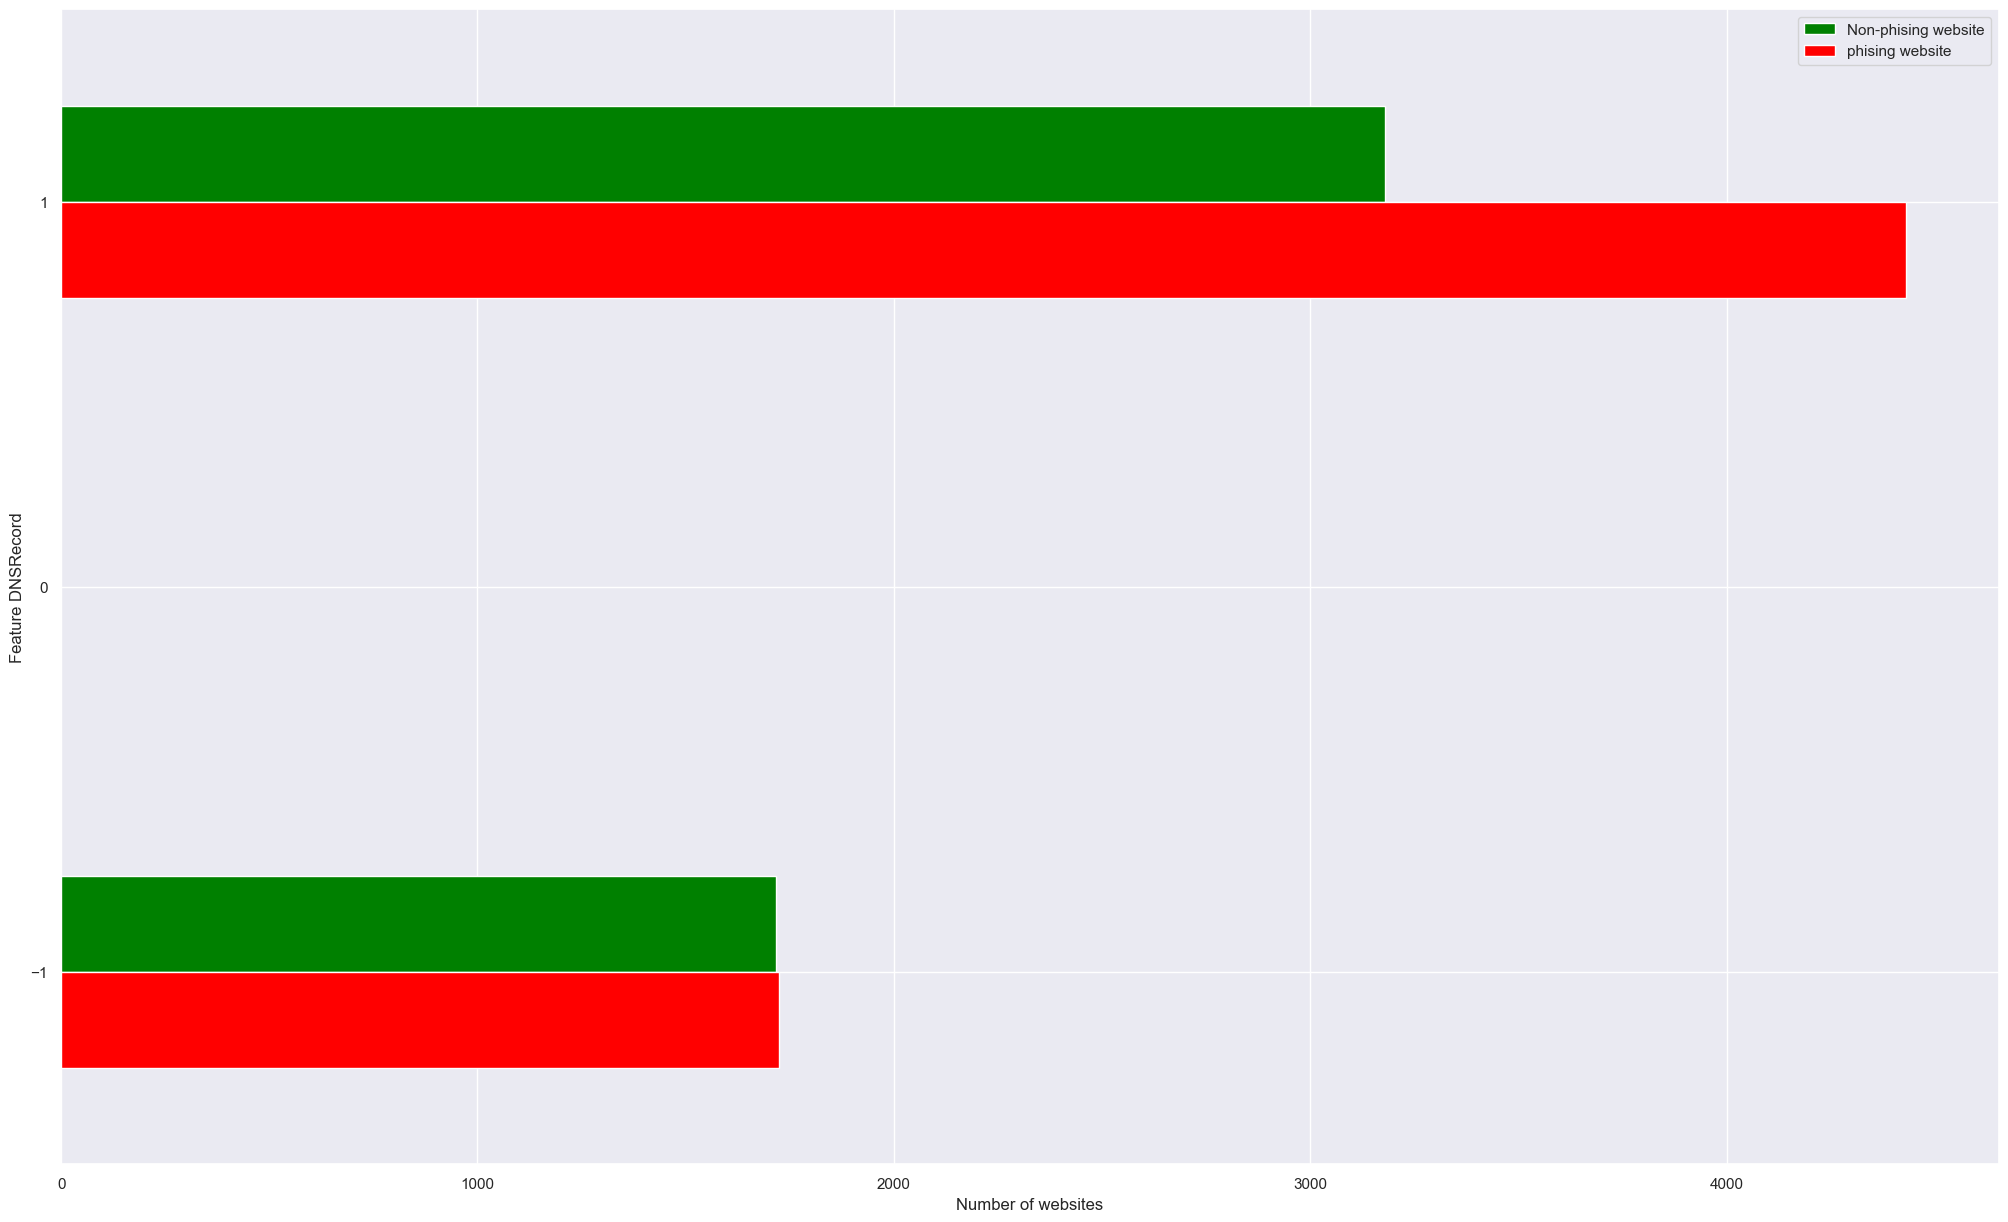

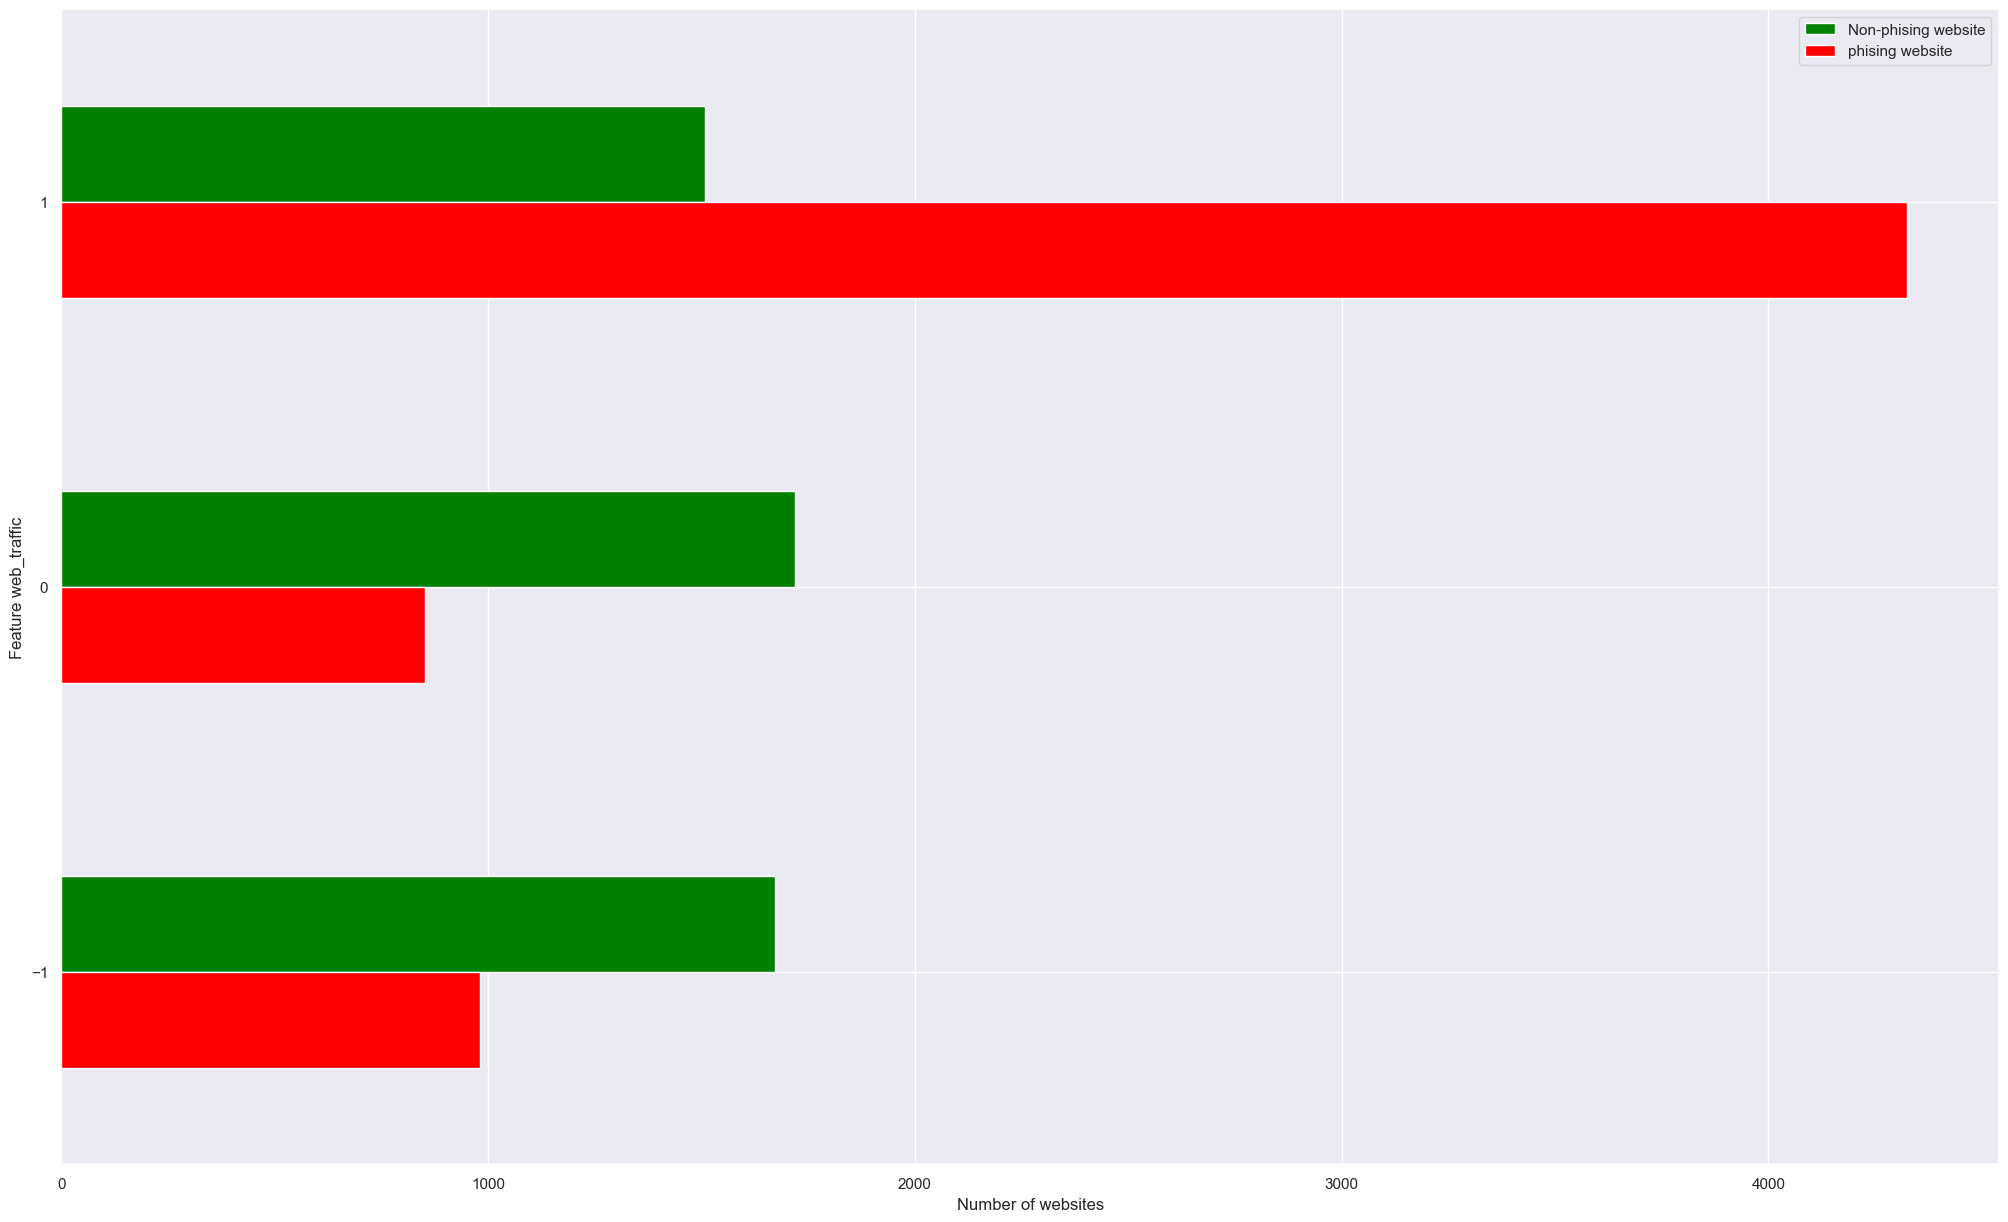

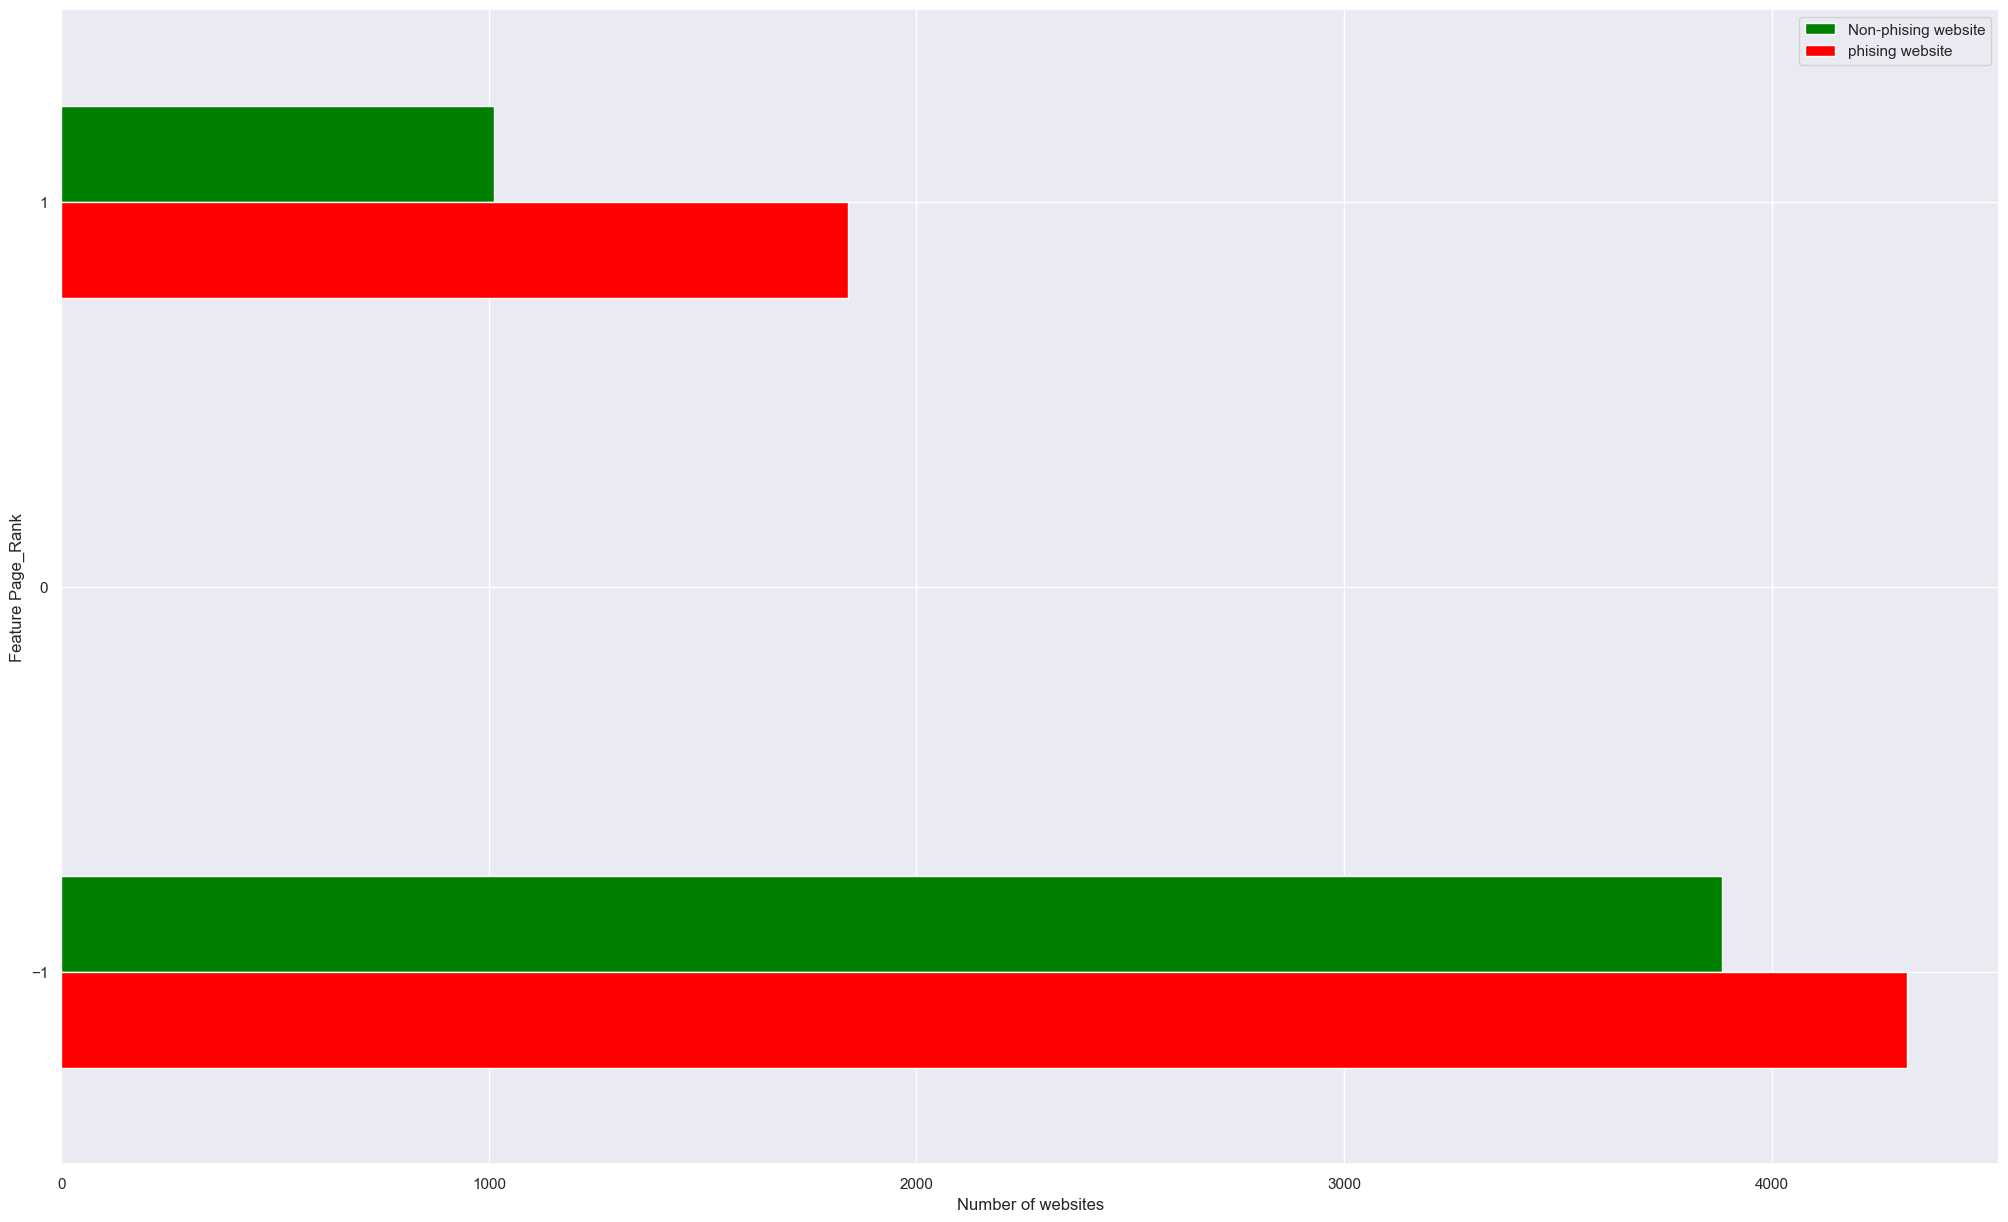

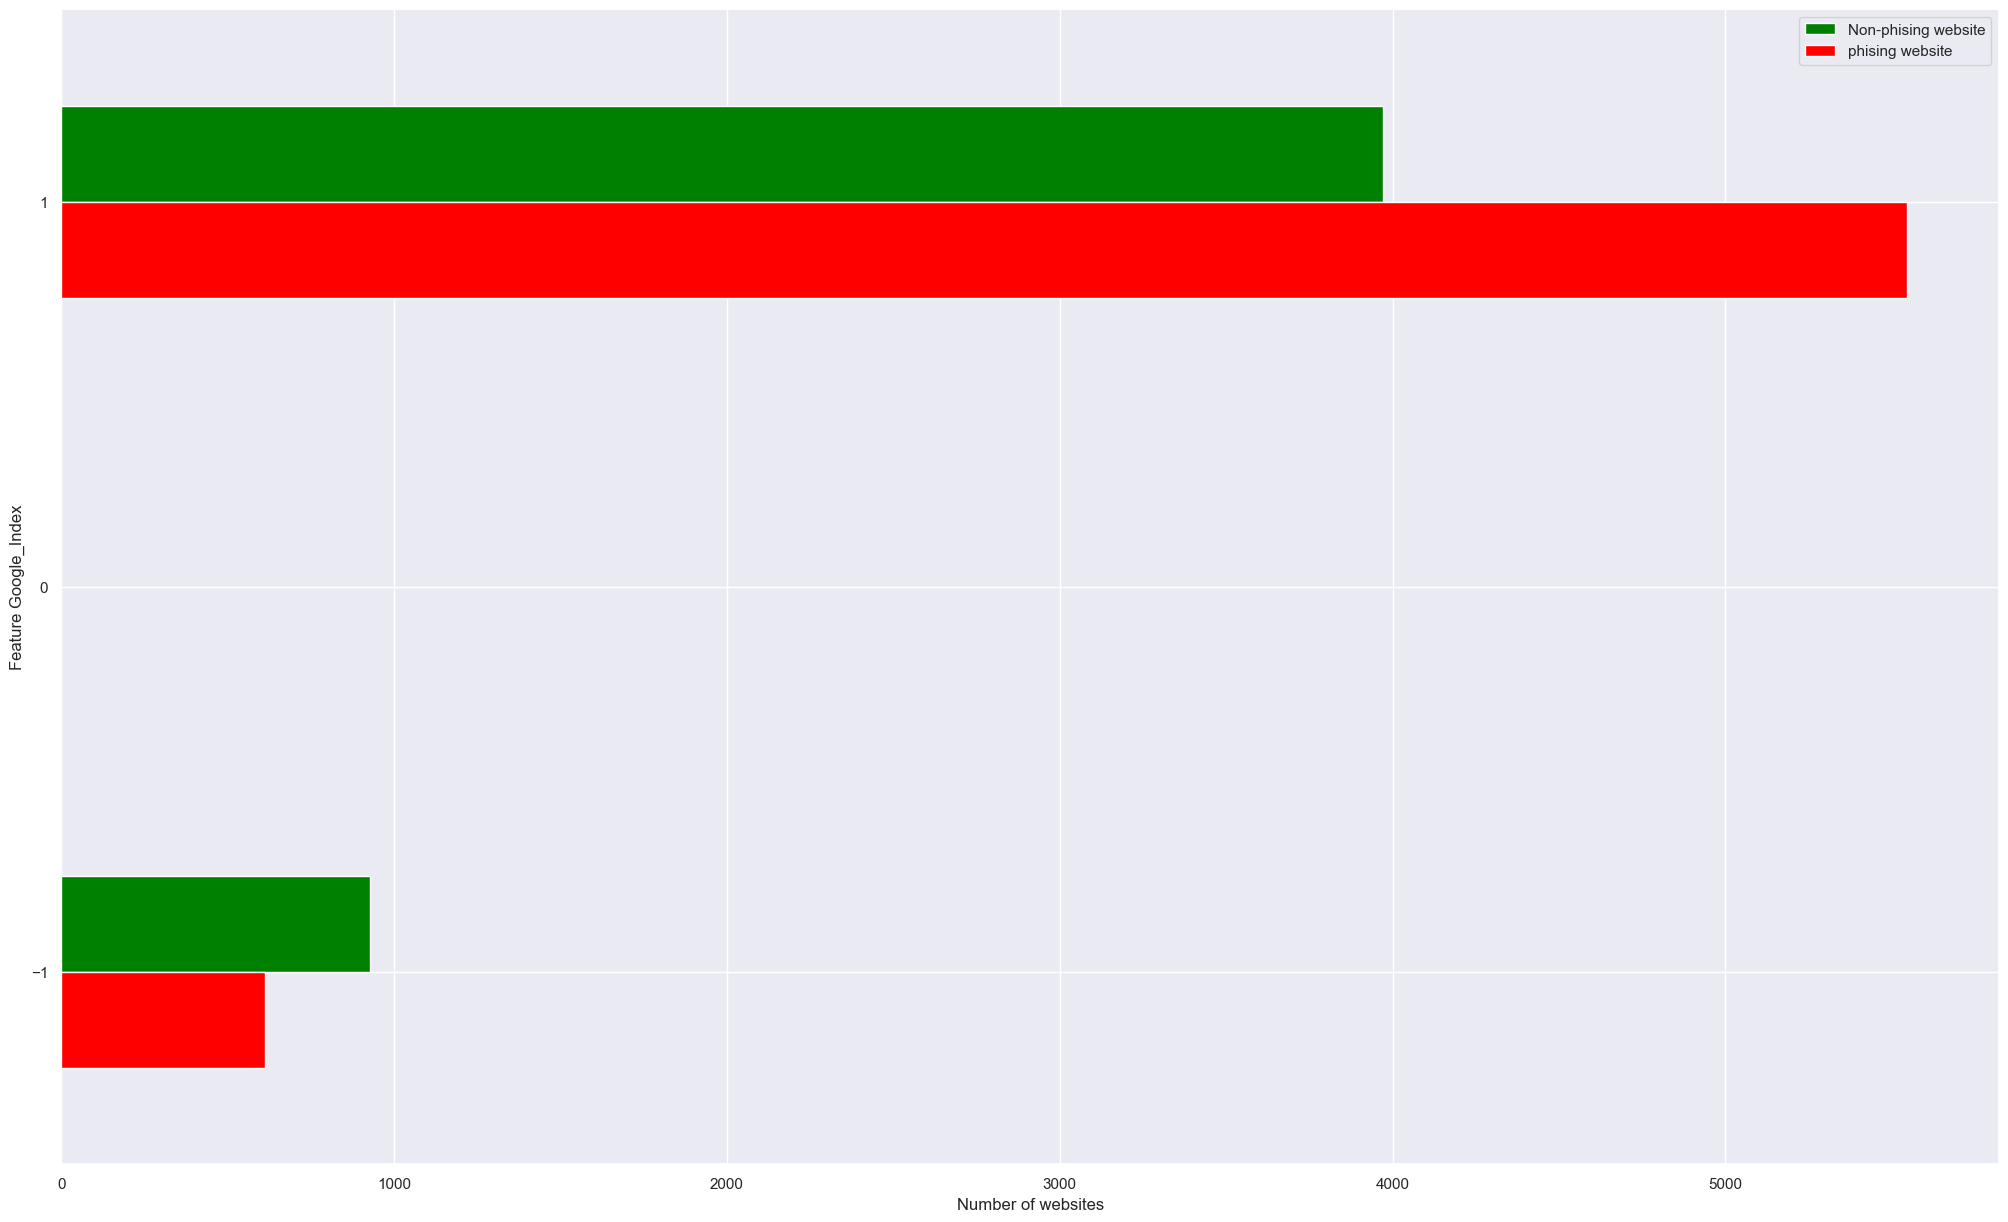

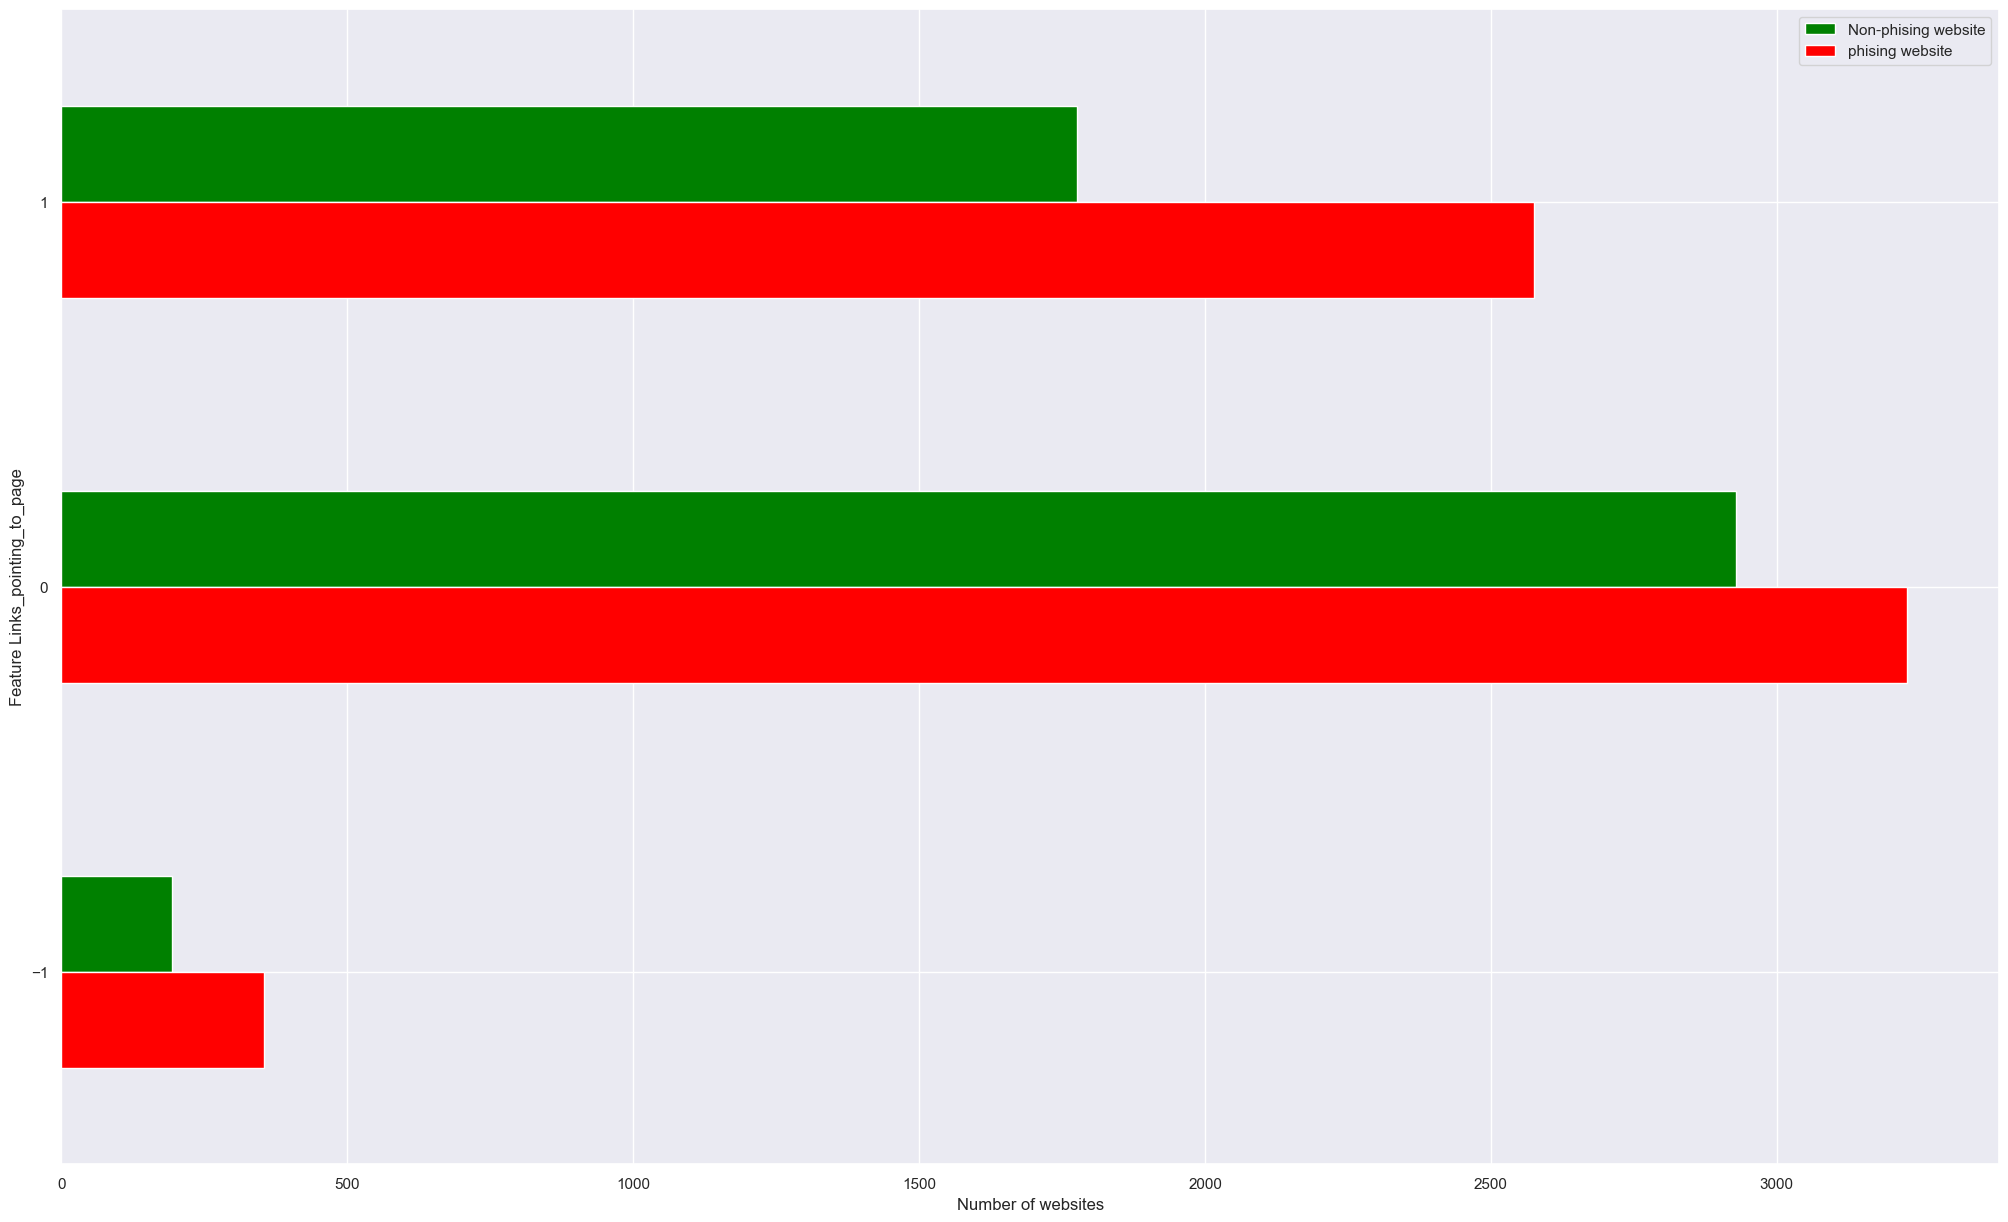

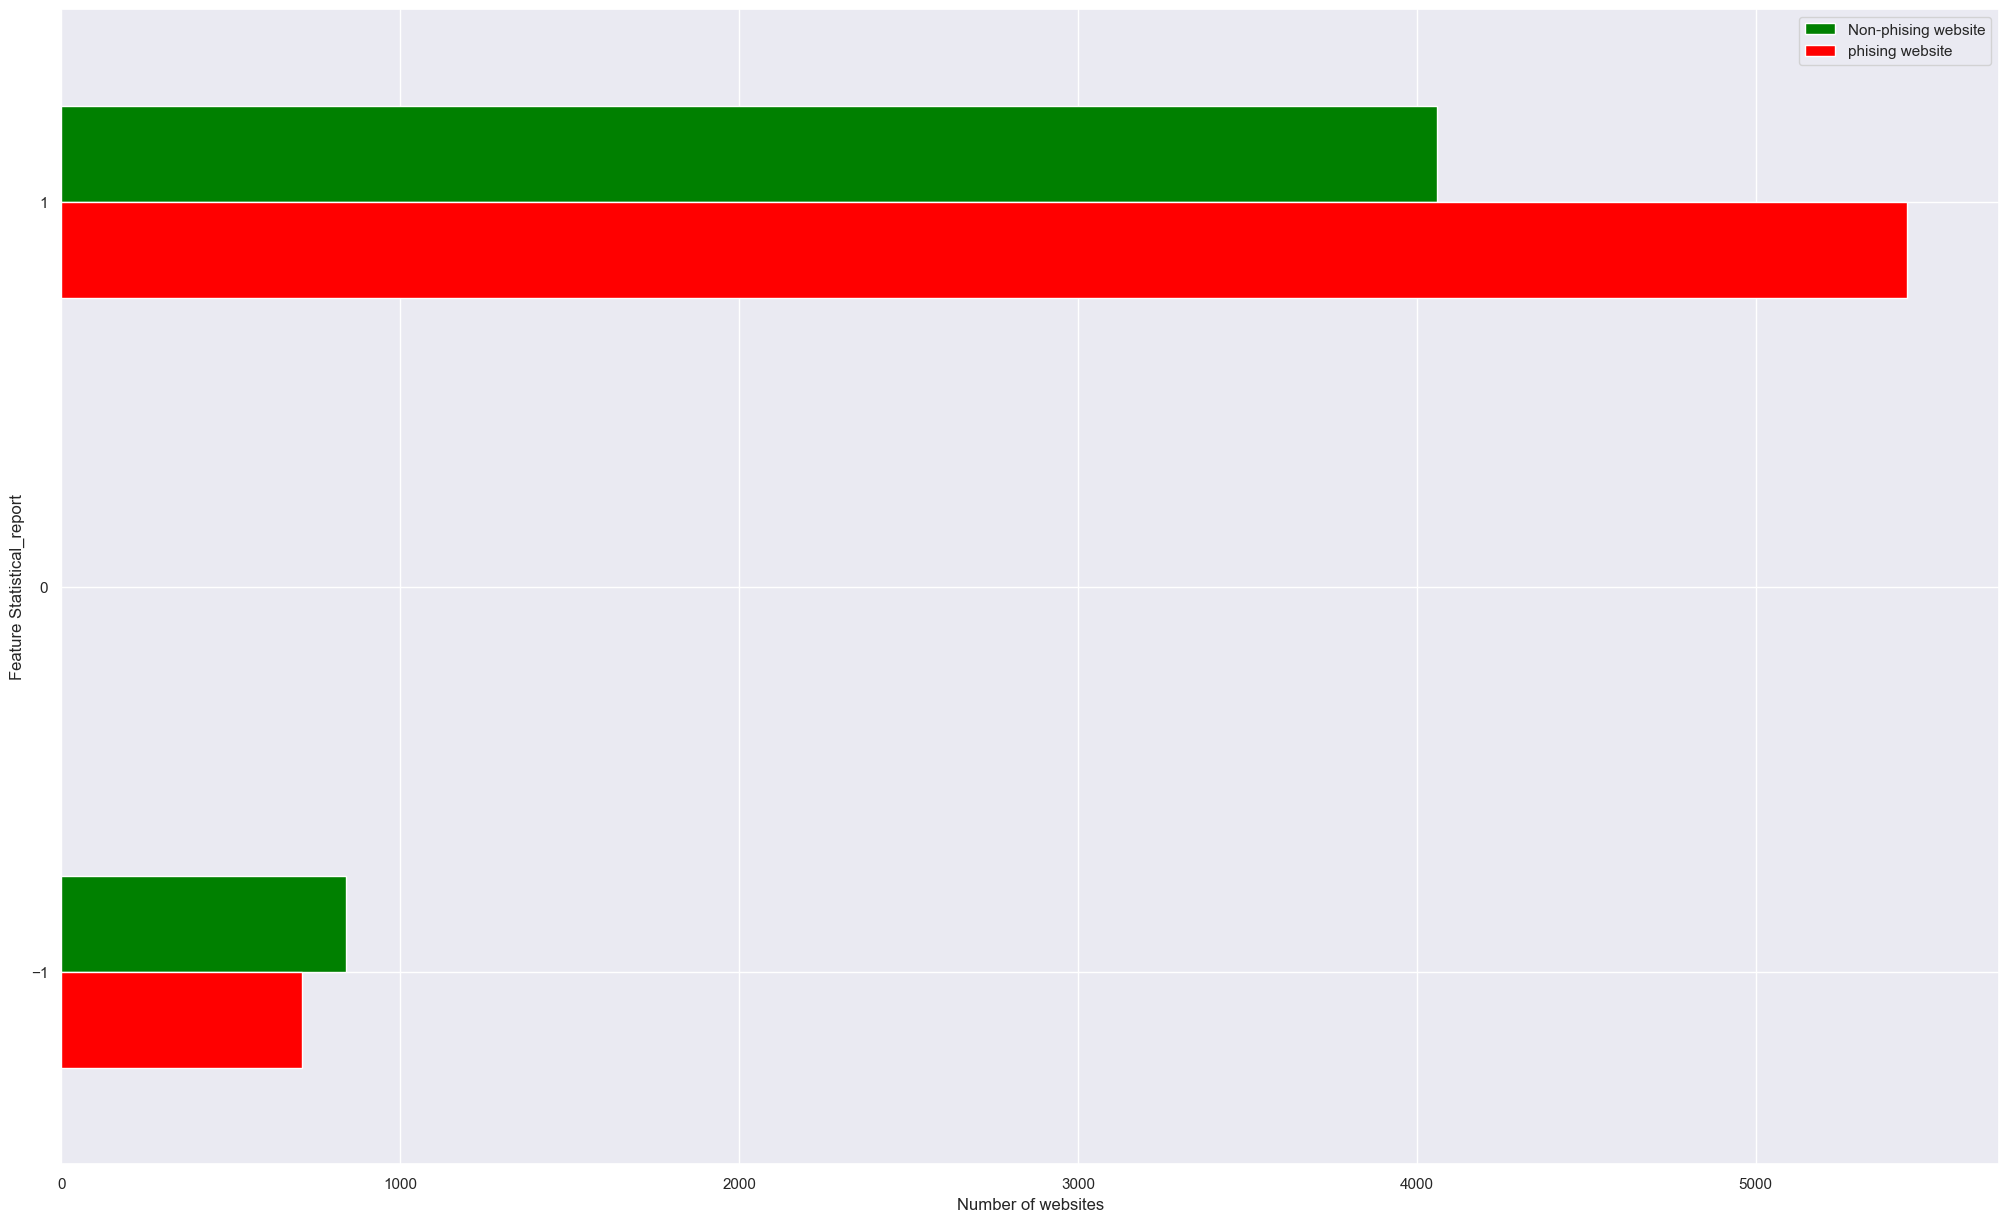

In [151]:


features = df.columns.values[:-1]
for idx, feature in enumerate(features):
    Result_1_for_feature = df.loc[df.Result == 1,:].groupby(feature).count().loc[:,'Result'].values
    Result_0_for_feature = df.loc[df.Result == -1,:].groupby(feature).count().loc[:,'Result'].values
    if len(Result_0_for_feature) == 1:
        Result_0_for_feature = np.append(Result_0_for_feature,np.array(0))

    y_title_name = df.groupby(feature).count().index.values

    for jdx,title_name in enumerate(y_title_name):
        if jdx == 0:
            plt.barh(title_name+0.25/2, Result_0_for_feature[jdx], color='green',height=0.25,label="Non-phising website")
            plt.barh(title_name-0.25/2, Result_1_for_feature[jdx], color='red',height=0.25,label="phising website")
        else:
            plt.barh(title_name+0.25/2, Result_0_for_feature[jdx], color='green',height=0.25)
            plt.barh(title_name-0.25/2, Result_1_for_feature[jdx], color='red',height=0.25)
    plt.legend(loc='best')
    plt.ylabel("Feature " + feature)
    plt.xlabel("Number of websites")
    plt.yticks(np.arange(min(y_title_name), max(y_title_name)+1, 1.0))
    plt.ylim(-1.5, 1.5)
    plt.show()